# 🔬 Text Positioning Debug Notebook

**Interactive debugging to understand exactly why text is still cutting off**

This notebook will:
1. Show the exact code that calculates positions
2. Create manual "expected" visualizations 
3. Run our actual code to see what happens
4. Compare side-by-side to identify the problem

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import sys
import os

# Add our project to path
sys.path.append('/home/asabaal/asabaal_ventures/repos/asabaal-utils/src')

# Set up dark theme for easier viewing
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 10)

print("🔧 Debug notebook initialized")
print(f"📁 Working directory: {os.getcwd()}")

🔧 Debug notebook initialized
📁 Working directory: /home/asabaal/asabaal_ventures/repos/asabaal-utils


## 📋 Step 1: Extract the Actual Code

Let's look at the exact code that's calculating text positions:

In [ ]:
# Read and display the actual positioning code
renderer_file = '/home/asabaal/asabaal_ventures/repos/asabaal-utils/src/asabaal_utils/video_processing/lyric_video/text/renderer.py'

with open(renderer_file, 'r') as f:
    lines = f.readlines()

print("🏗️ CANVAS CREATION (Lines 206-208)")
print("=" * 50)
for i in range(205, 210):
    print(f"{i+1:3d}: {lines[i].rstrip()}")

print("\n📍 VERTICAL POSITION CALCULATION (Lines 520-523)")
print("=" * 50)
for i in range(519, 525):
    print(f"{i+1:3d}: {lines[i].rstrip()}")

print("\n🎯 POSITION USAGE (Lines 285-286)")
print("=" * 50)
for i in range(284, 287):
    print(f"{i+1:3d}: {lines[i].rstrip()}")

print("\n✂️ CANVAS CROPPING (Lines 297-302)")
print("=" * 50)
for i in range(296, 303):
    print(f"{i+1:3d}: {lines[i].rstrip()}")

🏗️ CANVAS CREATION (Lines 206-208)
206:         CANVAS_PADDING = 200  # Extra padding to prevent any clipping
207:         canvas_height = self.resolution[1] + CANVAS_PADDING * 2
208:         canvas_width = self.resolution[0] + CANVAS_PADDING * 2
209:         canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)
210: 

📍 VERTICAL POSITION CALCULATION (Lines 520-523)
520:         # Define safe zones with massive buffers
521:         SAFE_TOP_MARGIN = 150  # Increased from 100
522:         SAFE_BOTTOM_MARGIN = 350  # Increased from 200 - much larger buffer from bottom
523: 
524:         # Calculate the safe zone height
525:         safe_zone_height = screen_height - SAFE_TOP_MARGIN - SAFE_BOTTOM_MARGIN

🎯 POSITION USAGE (Lines 285-286)
285:         # Calculate vertical position based on style (add padding offset)
286:         y_pos = self._calculate_vertical_position(max_height, style, current_time, audio_features) + CANVAS_PADDING
287: 

✂️ CANVAS CROPPING (Lines 297-302)


: 

## 🎨 Step 2: Create Manual "Expected" Visualization

Let's manually draw what we THINK should happen with safe positioning:

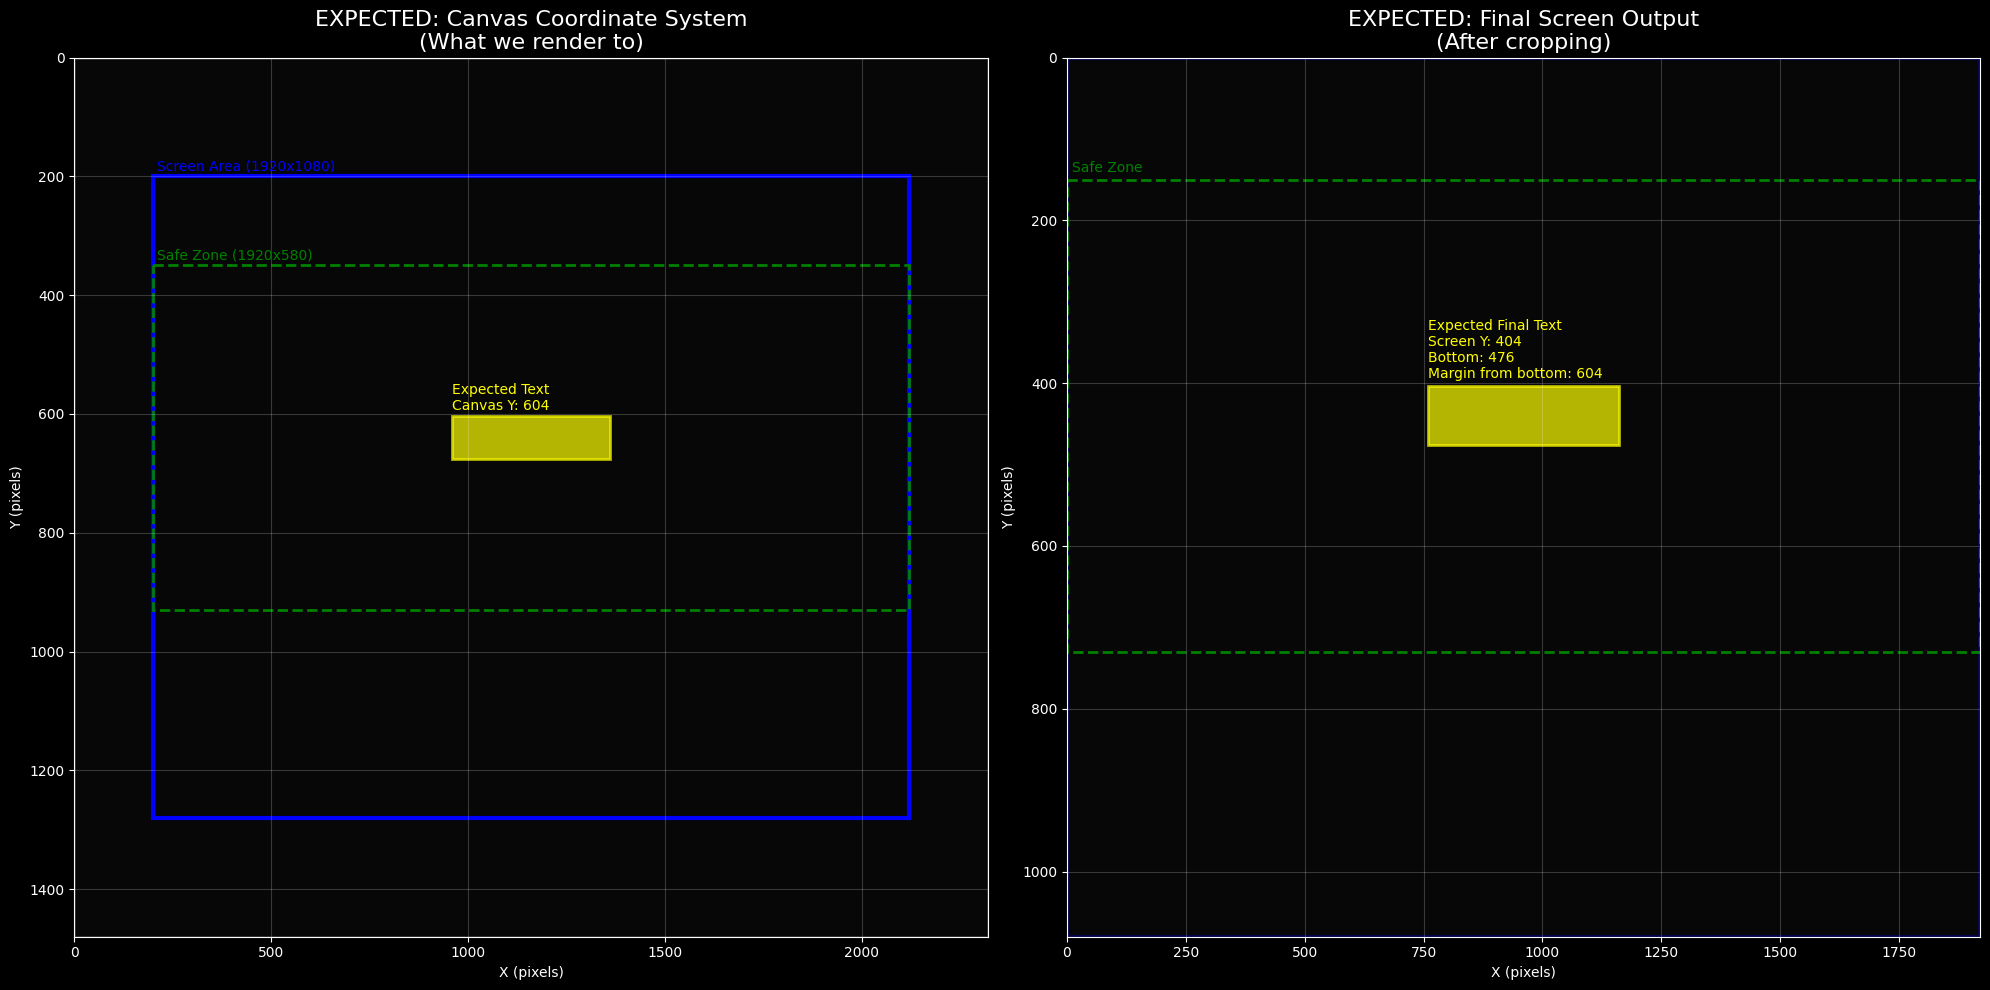


📊 EXPECTED RESULTS:
   Canvas Y position: 604
   Final Y position: 404
   Text height: 72
   Expected bottom margin: 604px


: 

In [ ]:
def create_expected_layout():
    """Create a manual visualization of what we EXPECT to happen"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Constants from our code
    SCREEN_WIDTH = 1920
    SCREEN_HEIGHT = 1080
    CANVAS_PADDING = 200
    SAFE_TOP_MARGIN = 150
    SAFE_BOTTOM_MARGIN = 350
    
    # Canvas dimensions
    CANVAS_WIDTH = SCREEN_WIDTH + CANVAS_PADDING * 2  # 2320
    CANVAS_HEIGHT = SCREEN_HEIGHT + CANVAS_PADDING * 2  # 1480
    
    # LEFT PLOT: Canvas coordinate system
    ax1.set_title("EXPECTED: Canvas Coordinate System\n(What we render to)", fontsize=16, color='white')
    ax1.set_xlim(0, CANVAS_WIDTH)
    ax1.set_ylim(CANVAS_HEIGHT, 0)  # Flip Y for image coordinates
    
    # Draw canvas boundary
    canvas_rect = Rectangle((0, 0), CANVAS_WIDTH, CANVAS_HEIGHT, 
                           linewidth=2, edgecolor='gray', facecolor='#1a1a1a', alpha=0.3)
    ax1.add_patch(canvas_rect)
    
    # Draw screen area within canvas
    screen_rect = Rectangle((CANVAS_PADDING, CANVAS_PADDING), SCREEN_WIDTH, SCREEN_HEIGHT,
                           linewidth=3, edgecolor='blue', facecolor='none')
    ax1.add_patch(screen_rect)
    ax1.text(CANVAS_PADDING + 10, CANVAS_PADDING - 10, "Screen Area (1920x1080)", color='blue')
    
    # Draw safe zones within screen
    safe_x = CANVAS_PADDING
    safe_y = CANVAS_PADDING + SAFE_TOP_MARGIN
    safe_w = SCREEN_WIDTH
    safe_h = SCREEN_HEIGHT - SAFE_TOP_MARGIN - SAFE_BOTTOM_MARGIN
    
    safe_rect = Rectangle((safe_x, safe_y), safe_w, safe_h,
                         linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
    ax1.add_patch(safe_rect)
    ax1.text(safe_x + 10, safe_y - 10, f"Safe Zone ({safe_w}x{safe_h})", color='green')
    
    # Example text positioning in canvas coordinates
    text_height = 72
    expected_y_canvas = CANVAS_PADDING + SAFE_TOP_MARGIN + (safe_h - text_height) // 2  # Center in safe zone
    text_width = 400
    expected_x_canvas = CANVAS_PADDING + (SCREEN_WIDTH - text_width) // 2  # Center horizontally
    
    text_rect = Rectangle((expected_x_canvas, expected_y_canvas), text_width, text_height,
                         linewidth=2, edgecolor='yellow', facecolor='yellow', alpha=0.7)
    ax1.add_patch(text_rect)
    ax1.text(expected_x_canvas, expected_y_canvas - 10, 
             f"Expected Text\nCanvas Y: {expected_y_canvas}", color='yellow')
    
    # RIGHT PLOT: Final screen coordinates (after cropping)
    ax2.set_title("EXPECTED: Final Screen Output\n(After cropping)", fontsize=16, color='white')
    ax2.set_xlim(0, SCREEN_WIDTH)
    ax2.set_ylim(SCREEN_HEIGHT, 0)
    
    # Draw screen boundary
    screen_final = Rectangle((0, 0), SCREEN_WIDTH, SCREEN_HEIGHT,
                            linewidth=3, edgecolor='blue', facecolor='#1a1a1a', alpha=0.3)
    ax2.add_patch(screen_final)
    
    # Draw safe zones in final coordinates
    safe_final = Rectangle((0, SAFE_TOP_MARGIN), SCREEN_WIDTH, safe_h,
                          linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
    ax2.add_patch(safe_final)
    ax2.text(10, SAFE_TOP_MARGIN - 10, f"Safe Zone", color='green')
    
    # Text in final coordinates (subtract canvas padding)
    final_x = expected_x_canvas - CANVAS_PADDING
    final_y = expected_y_canvas - CANVAS_PADDING
    
    text_final = Rectangle((final_x, final_y), text_width, text_height,
                          linewidth=2, edgecolor='yellow', facecolor='yellow', alpha=0.7)
    ax2.add_patch(text_final)
    ax2.text(final_x, final_y - 10, 
             f"Expected Final Text\nScreen Y: {final_y}\nBottom: {final_y + text_height}\nMargin from bottom: {SCREEN_HEIGHT - (final_y + text_height)}", 
             color='yellow')
    
    # Add grid and labels
    for ax in [ax1, ax2]:
        ax.grid(True, alpha=0.2)
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'canvas_y': expected_y_canvas,
        'final_y': final_y,
        'text_height': text_height,
        'expected_bottom_margin': SCREEN_HEIGHT - (final_y + text_height)
    }

expected_results = create_expected_layout()
print(f"\n📊 EXPECTED RESULTS:")
print(f"   Canvas Y position: {expected_results['canvas_y']}")
print(f"   Final Y position: {expected_results['final_y']}")
print(f"   Text height: {expected_results['text_height']}")
print(f"   Expected bottom margin: {expected_results['expected_bottom_margin']}px")

## 🧪 Step 3: Test Our Actual Code

Now let's run our actual positioning code and see what it produces:

In [2]:
# Import our actual text renderer
from asabaal_utils.video_processing.lyric_video.text.renderer import TextRenderer, TextStyle
from asabaal_utils.video_processing.lyric_video.lyrics.parser import LyricWord

def test_actual_positioning():
    """Test what our actual code produces"""
    
    # Create renderer with standard resolution
    renderer = TextRenderer((1920, 1080))
    
    # Test case: medium text, center position
    test_text = "Test text positioning"
    style = TextStyle(font_size=72, vertical_position="center")
    
    print("🧪 TESTING ACTUAL CODE")
    print("=" * 50)
    print(f"Test text: '{test_text}'")
    print(f"Font size: {style.font_size}px")
    print(f"Vertical position: {style.vertical_position}")
    
    # Get font dimensions (this is what the renderer uses)
    font = renderer.font_manager.get_font(style.font_family, style.font_size)
    text_surface = renderer.font_manager.render_text(test_text, font, style.color, style.stroke_width, style.stroke_color)
    text_h, text_w = text_surface.shape[:2]
    
    print(f"\n📏 FONT MEASUREMENTS:")
    print(f"   Text width: {text_w}px")
    print(f"   Text height: {text_h}px")
    
    # Test the vertical position calculation directly
    actual_y = renderer._calculate_vertical_position(text_h, style, 0.0, None)
    
    print(f"\n🎯 POSITION CALCULATION:")
    print(f"   _calculate_vertical_position() returned: {actual_y}")
    
    # Now test with canvas padding (like in render_lyric_line)
    CANVAS_PADDING = 200
    canvas_y = actual_y + CANVAS_PADDING
    
    print(f"   After adding CANVAS_PADDING (+{CANVAS_PADDING}): {canvas_y}")
    
    # Simulate the final cropping
    final_y = canvas_y - CANVAS_PADDING  # This is what cropping does
    
    print(f"   After cropping (-{CANVAS_PADDING}): {final_y}")
    
    # Calculate where text bottom will be
    text_bottom = final_y + text_h
    bottom_margin = 1080 - text_bottom
    
    print(f"\n📊 FINAL RESULTS:")
    print(f"   Final Y position: {final_y}")
    print(f"   Text bottom: {text_bottom}")
    print(f"   Bottom margin: {bottom_margin}px")
    
    # Check safe zone settings
    print(f"\n⚙️ SAFE ZONE SETTINGS (from code):")
    print(f"   SAFE_TOP_MARGIN: 150px")
    print(f"   SAFE_BOTTOM_MARGIN: 350px")
    print(f"   Available safe height: {1080 - 150 - 350} = 580px")
    
    return {
        'text_width': text_w,
        'text_height': text_h,
        'calculated_y': actual_y,
        'canvas_y': canvas_y,
        'final_y': final_y,
        'text_bottom': text_bottom,
        'bottom_margin': bottom_margin
    }

actual_results = test_actual_positioning()

/home/asabaal/asabaal_ventures/repos/asabaal-utils/src/asabaal_utils/video_processing/__init__.py:26: UserWarning: Some video processing modules unavailable due to MoviePy import issues: cannot import name 'concatenate_videoclips' from 'moviepy.video.tools.cuts' (/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/moviepy/video/tools/cuts.py)
  warnings.warn(f"Some video processing modules unavailable due to MoviePy import issues: {e}")


🧪 TESTING ACTUAL CODE
Test text: 'Test text positioning'
Font size: 72px
Vertical position: center

📏 FONT MEASUREMENTS:
   Text width: 743px
   Text height: 100px

🎯 POSITION CALCULATION:
   _calculate_vertical_position() returned: 390
   After adding CANVAS_PADDING (+200): 590
   After cropping (-200): 390

📊 FINAL RESULTS:
   Final Y position: 390
   Text bottom: 490
   Bottom margin: 590px

⚙️ SAFE ZONE SETTINGS (from code):
   SAFE_TOP_MARGIN: 150px
   SAFE_BOTTOM_MARGIN: 350px
   Available safe height: 580 = 580px


## 🔍 Step 4: Visual Comparison - Expected vs Actual

Let's create side-by-side visualizations to see the difference:

/tmp/ipykernel_228870/3008335061.py:82: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_228870/3008335061.py:82: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


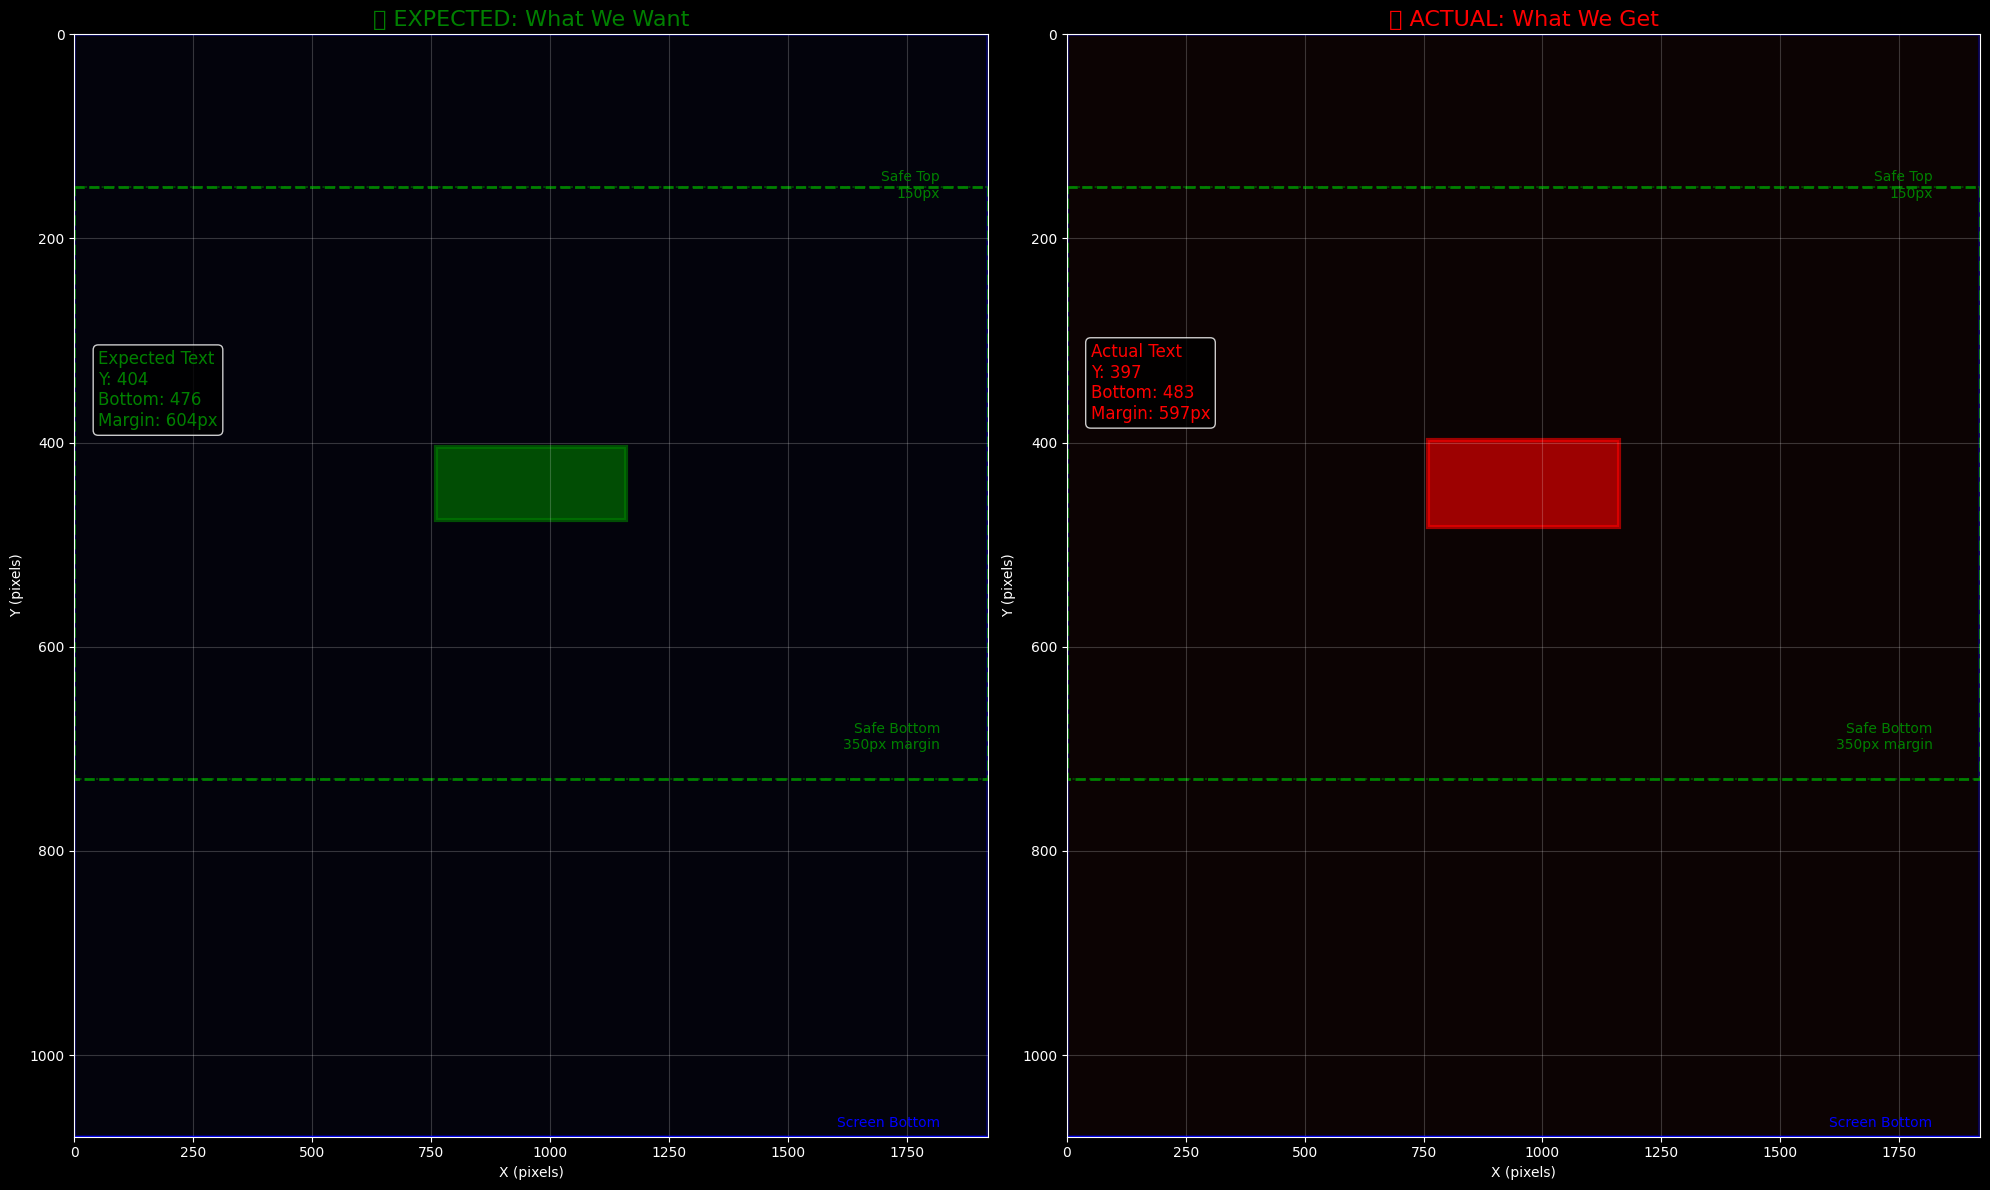

: 

: 

In [ ]:
def compare_expected_vs_actual(expected, actual):
    """Visual comparison of expected vs actual positioning"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
    
    SCREEN_WIDTH = 1920
    SCREEN_HEIGHT = 1080
    SAFE_TOP = 150
    SAFE_BOTTOM = 350
    
    # LEFT: Expected behavior
    ax1.set_title("🎯 EXPECTED: What We Want", fontsize=16, color='green')
    ax1.set_xlim(0, SCREEN_WIDTH)
    ax1.set_ylim(SCREEN_HEIGHT, 0)
    
    # Screen boundary
    screen1 = Rectangle((0, 0), SCREEN_WIDTH, SCREEN_HEIGHT,
                       linewidth=3, edgecolor='blue', facecolor='#0a0a2a', alpha=0.3)
    ax1.add_patch(screen1)
    
    # Safe zone
    safe1 = Rectangle((0, SAFE_TOP), SCREEN_WIDTH, SCREEN_HEIGHT - SAFE_TOP - SAFE_BOTTOM,
                     linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
    ax1.add_patch(safe1)
    
    # Expected text (manually calculated "correct" position)
    exp_y = SAFE_TOP + (SCREEN_HEIGHT - SAFE_TOP - SAFE_BOTTOM - expected['text_height']) // 2
    exp_text = Rectangle((SCREEN_WIDTH//2 - 200, exp_y), 400, expected['text_height'],
                        linewidth=3, edgecolor='green', facecolor='green', alpha=0.6)
    ax1.add_patch(exp_text)
    
    ax1.text(50, exp_y - 20, f"Expected Text\nY: {exp_y}\nBottom: {exp_y + expected['text_height']}\nMargin: {SCREEN_HEIGHT - (exp_y + expected['text_height'])}px", 
             color='green', fontsize=12, bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))
    
    # RIGHT: Actual behavior
    ax2.set_title("❌ ACTUAL: What We Get", fontsize=16, color='red')
    ax2.set_xlim(0, SCREEN_WIDTH)
    ax2.set_ylim(SCREEN_HEIGHT, 0)
    
    # Screen boundary
    screen2 = Rectangle((0, 0), SCREEN_WIDTH, SCREEN_HEIGHT,
                       linewidth=3, edgecolor='blue', facecolor='#2a0a0a', alpha=0.3)
    ax2.add_patch(screen2)
    
    # Safe zone  
    safe2 = Rectangle((0, SAFE_TOP), SCREEN_WIDTH, SCREEN_HEIGHT - SAFE_TOP - SAFE_BOTTOM,
                     linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
    ax2.add_patch(safe2)
    
    # Actual text position
    actual_text = Rectangle((SCREEN_WIDTH//2 - 200, actual['final_y']), 400, actual['text_height'],
                           linewidth=3, edgecolor='red', facecolor='red', alpha=0.6)
    ax2.add_patch(actual_text)
    
    ax2.text(50, actual['final_y'] - 20, f"Actual Text\nY: {actual['final_y']}\nBottom: {actual['text_bottom']}\nMargin: {actual['bottom_margin']}px", 
             color='red', fontsize=12, bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))
    
    # Add danger zone if text is too close to bottom
    if actual['bottom_margin'] < 100:
        danger = Rectangle((0, SCREEN_HEIGHT - 100), SCREEN_WIDTH, 100,
                          linewidth=2, edgecolor='red', facecolor='red', alpha=0.2)
        ax2.add_patch(danger)
        ax2.text(SCREEN_WIDTH//2, SCREEN_HEIGHT - 50, "DANGER ZONE\n(< 100px from bottom)", 
                ha='center', va='center', color='red', fontweight='bold')
    
    # Common formatting
    for ax in [ax1, ax2]:
        ax.grid(True, alpha=0.2)
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
        
        # Add reference lines
        ax.axhline(y=SAFE_TOP, color='green', linestyle=':', alpha=0.5)
        ax.axhline(y=SCREEN_HEIGHT - SAFE_BOTTOM, color='green', linestyle=':', alpha=0.5)
        ax.axhline(y=SCREEN_HEIGHT, color='blue', linewidth=2)
        
        # Labels
        ax.text(SCREEN_WIDTH - 100, SAFE_TOP + 10, f"Safe Top\n{SAFE_TOP}px", color='green', ha='right')
        ax.text(SCREEN_WIDTH - 100, SCREEN_HEIGHT - SAFE_BOTTOM - 30, f"Safe Bottom\n{SAFE_BOTTOM}px margin", color='green', ha='right')
        ax.text(SCREEN_WIDTH - 100, SCREEN_HEIGHT - 10, "Screen Bottom", color='blue', ha='right')
    
    plt.tight_layout()
    plt.show()

compare_expected_vs_actual(expected_results, actual_results)

## 🔬 Step 5: Deep Dive - Let's Actually Render Text

Let's use our renderer to actually create text and see where it ends up:

/tmp/ipykernel_228870/319916440.py:99: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


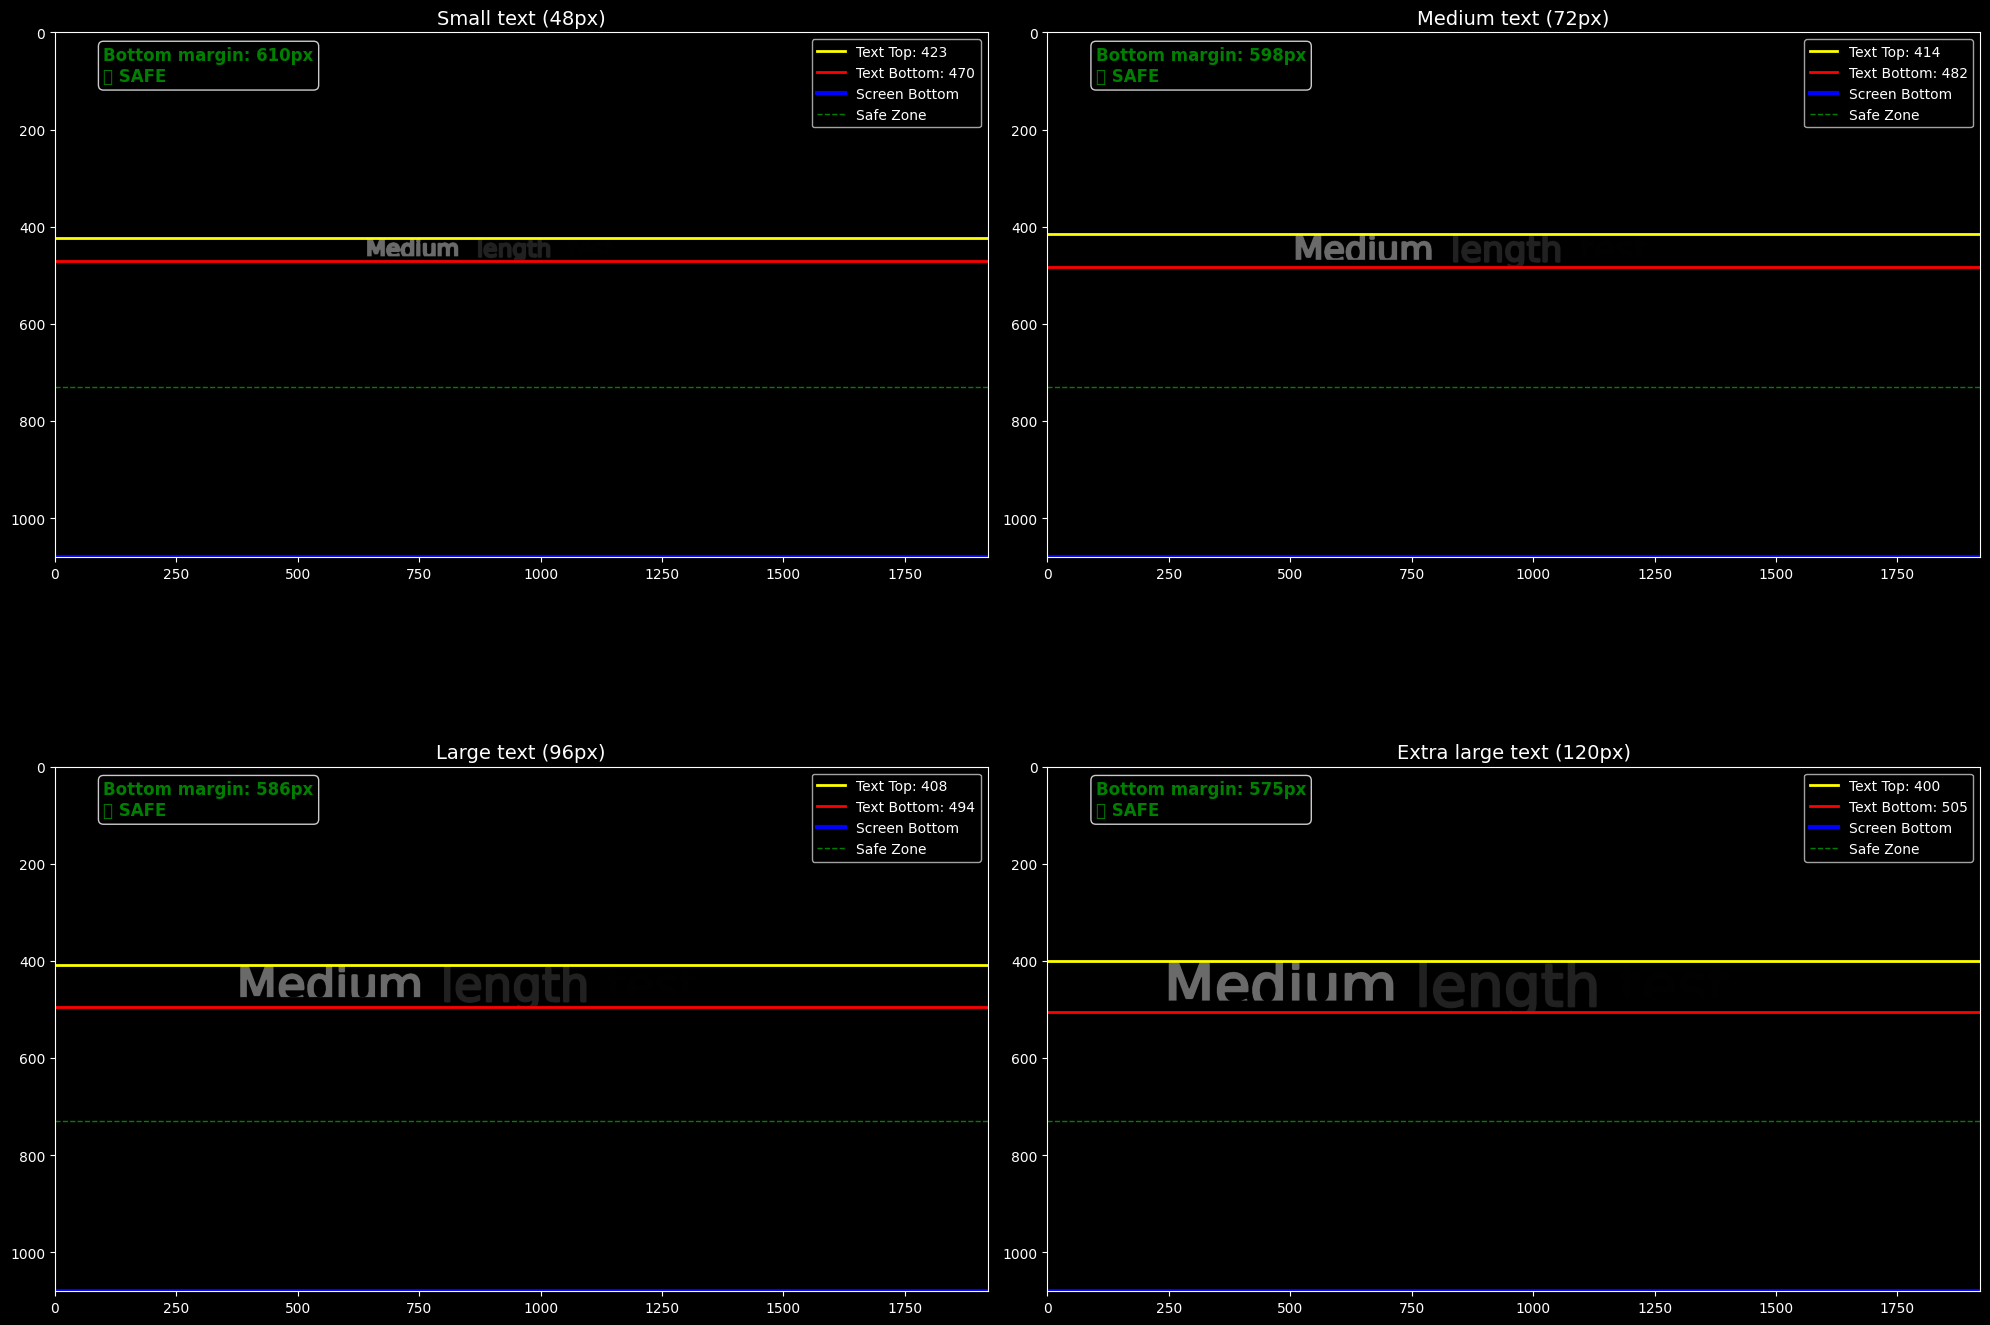


📊 ACTUAL RENDERING RESULTS SUMMARY:
Small text           | Bottom:  470 | Margin: 610px | ✅ SAFE
Medium text          | Bottom:  482 | Margin: 598px | ✅ SAFE
Large text           | Bottom:  494 | Margin: 586px | ✅ SAFE
Extra large text     | Bottom:  505 | Margin: 575px | ✅ SAFE


: 

In [ ]:
def render_actual_text_debug():
    """Actually render text using our renderer and analyze the result"""
    
    renderer = TextRenderer((1920, 1080))
    
    # Create test words
    test_text = "Medium length test text"
    words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
    
    # Test different font sizes
    test_cases = [
        (48, "Small text"),
        (72, "Medium text"), 
        (96, "Large text"),
        (120, "Extra large text")
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    results = []
    
    for i, (font_size, description) in enumerate(test_cases):
        style = TextStyle(font_size=font_size, vertical_position="center")
        
        try:
            # Render using our actual system
            rendered_frame = renderer.render_lyric_line(
                words=words,
                current_time=0.5,
                style=style,
                animation_config=renderer.animation_presets['subtle'],
                line_start=0.0,
                line_end=len(words) * 0.5
            )
            
            # Analyze the alpha channel to find actual text bounds
            alpha_channel = rendered_frame[:, :, 3]
            rows_with_text = np.where(alpha_channel.any(axis=1))[0]
            
            if len(rows_with_text) > 0:
                actual_top = rows_with_text[0]
                actual_bottom = rows_with_text[-1]
                actual_height = actual_bottom - actual_top + 1
                bottom_margin = 1080 - actual_bottom
                
                # Store results
                result = {
                    'font_size': font_size,
                    'description': description,
                    'actual_top': actual_top,
                    'actual_bottom': actual_bottom,
                    'actual_height': actual_height,
                    'bottom_margin': bottom_margin,
                    'is_cutoff': actual_bottom >= 1079  # Almost at screen edge
                }
                results.append(result)
                
                # Visualize
                ax = axes[i]
                ax.set_title(f"{description} ({font_size}px)", fontsize=14)
                ax.imshow(rendered_frame, extent=[0, 1920, 1080, 0])
                
                # Draw analysis
                ax.axhline(y=actual_top, color='yellow', linewidth=2, label=f'Text Top: {actual_top}')
                ax.axhline(y=actual_bottom, color='red', linewidth=2, label=f'Text Bottom: {actual_bottom}')
                ax.axhline(y=1080, color='blue', linewidth=3, label='Screen Bottom')
                ax.axhline(y=1080-350, color='green', linewidth=1, linestyle='--', label='Safe Zone')
                
                # Color code based on safety
                if result['is_cutoff']:
                    color = 'red'
                    status = '❌ TOO CLOSE'
                elif bottom_margin < 100:
                    color = 'orange'
                    status = '⚠️ RISKY'
                else:
                    color = 'green'
                    status = '✅ SAFE'
                
                ax.text(100, 100, f"Bottom margin: {bottom_margin}px\n{status}", 
                       color=color, fontsize=12, fontweight='bold',
                       bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))
                
                ax.legend(loc='upper right')
                ax.set_xlim(0, 1920)
                ax.set_ylim(1080, 0)
                
            else:
                axes[i].text(0.5, 0.5, f"No text rendered\n{font_size}px", 
                           transform=axes[i].transAxes, ha='center', va='center',
                           color='red', fontsize=14)
                
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error: {str(e)}", 
                        transform=axes[i].transAxes, ha='center', va='center',
                        color='red', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n📊 ACTUAL RENDERING RESULTS SUMMARY:")
    print("=" * 60)
    for result in results:
        status = "❌ CUTOFF" if result['is_cutoff'] else "⚠️ RISKY" if result['bottom_margin'] < 100 else "✅ SAFE"
        print(f"{result['description']:<20} | Bottom: {result['actual_bottom']:4d} | Margin: {result['bottom_margin']:3d}px | {status}")
    
    return results

render_results = render_actual_text_debug()

## 🎯 Step 6: Analysis & Root Cause Investigation

Now let's dig into why we're getting these results:

In [ ]:
def investigate_root_cause():
    """Let's manually trace through the positioning calculation step by step"""
    
    print("🔍 ROOT CAUSE INVESTIGATION")
    print("=" * 60)
    
    # Constants from the code
    SCREEN_HEIGHT = 1080
    SAFE_TOP_MARGIN = 150
    SAFE_BOTTOM_MARGIN = 350
    CANVAS_PADDING = 200
    
    print(f"📐 CONSTANTS:")
    print(f"   Screen height: {SCREEN_HEIGHT}")
    print(f"   Safe top margin: {SAFE_TOP_MARGIN}")
    print(f"   Safe bottom margin: {SAFE_BOTTOM_MARGIN}")
    print(f"   Canvas padding: {CANVAS_PADDING}")
    
    # Calculate safe zone
    safe_zone_height = SCREEN_HEIGHT - SAFE_TOP_MARGIN - SAFE_BOTTOM_MARGIN
    print(f"\n📏 SAFE ZONE CALCULATION:")
    print(f"   Safe zone height: {SCREEN_HEIGHT} - {SAFE_TOP_MARGIN} - {SAFE_BOTTOM_MARGIN} = {safe_zone_height}")
    
    # Test with different text heights
    test_heights = [48, 72, 96, 120]
    
    print(f"\n🧮 STEP-BY-STEP POSITION CALCULATION:")
    print(f"{'Text Height':<12} | {'Safe Center':<12} | {'Base Y':<8} | {'Canvas Y':<10} | {'Final Y':<8} | {'Bottom':<8} | {'Margin':<8}")
    print("-" * 85)
    
    for text_height in test_heights:
        # Step 1: Calculate center of safe zone
        safe_zone_center = SAFE_TOP_MARGIN + (safe_zone_height // 2)
        
        # Step 2: Center text in safe zone
        base_y = safe_zone_center - (text_height // 2)
        
        # Step 3: Apply safety clamp
        absolute_min_y = SAFE_TOP_MARGIN
        absolute_max_y = SCREEN_HEIGHT - SAFE_BOTTOM_MARGIN - text_height
        clamped_y = max(absolute_min_y, min(absolute_max_y, base_y))
        
        # Step 4: Add canvas padding
        canvas_y = clamped_y + CANVAS_PADDING
        
        # Step 5: Crop back to screen coordinates
        final_y = canvas_y - CANVAS_PADDING  # This should equal clamped_y
        
        # Calculate bottom position and margin
        text_bottom = final_y + text_height
        bottom_margin = SCREEN_HEIGHT - text_bottom
        
        print(f"{text_height:<12} | {safe_zone_center:<12} | {clamped_y:<8} | {canvas_y:<10} | {final_y:<8} | {text_bottom:<8} | {bottom_margin:<8}")
    
    print(f"\n💡 THEORY CHECK:")
    print(f"   If our math is correct, Final Y should equal Base Y (after clamping)")
    print(f"   Canvas padding should cancel out: Y + {CANVAS_PADDING} - {CANVAS_PADDING} = Y")
    
    # Let's check if there are any issues with our assumptions
    print(f"\n🤔 POTENTIAL ISSUES TO INVESTIGATE:")
    print(f"   1. Is text height calculation wrong? (font metrics vs actual rendered height)")
    print(f"   2. Are there additional effects expanding the text bounds?")
    print(f"   3. Is the canvas cropping working as expected?")
    print(f"   4. Are we measuring the right thing in our debug output?")
    
investigate_root_cause()

🔍 ROOT CAUSE INVESTIGATION
📐 CONSTANTS:
   Screen height: 1080
   Safe top margin: 150
   Safe bottom margin: 350
   Canvas padding: 200

📏 SAFE ZONE CALCULATION:
   Safe zone height: 1080 - 150 - 350 = 580

🧮 STEP-BY-STEP POSITION CALCULATION:
Text Height  | Safe Center  | Base Y   | Canvas Y   | Final Y  | Bottom   | Margin  
-------------------------------------------------------------------------------------
48           | 440          | 416      | 616        | 416      | 464      | 616     
72           | 440          | 404      | 604        | 404      | 476      | 604     
96           | 440          | 392      | 592        | 392      | 488      | 592     
120          | 440          | 380      | 580        | 380      | 500      | 580     

💡 THEORY CHECK:
   If our math is correct, Final Y should equal Base Y (after clamping)
   Canvas padding should cancel out: Y + 200 - 200 = Y

🤔 POTENTIAL ISSUES TO INVESTIGATE:
   1. Is text height calculation wrong? (font metrics vs actual 

: 

: 

## 🎪 Step 7: Interactive Testing

Let's create an interactive widget where you can adjust parameters and see the effects:

🎪 INTERACTIVE TEST - Current Settings


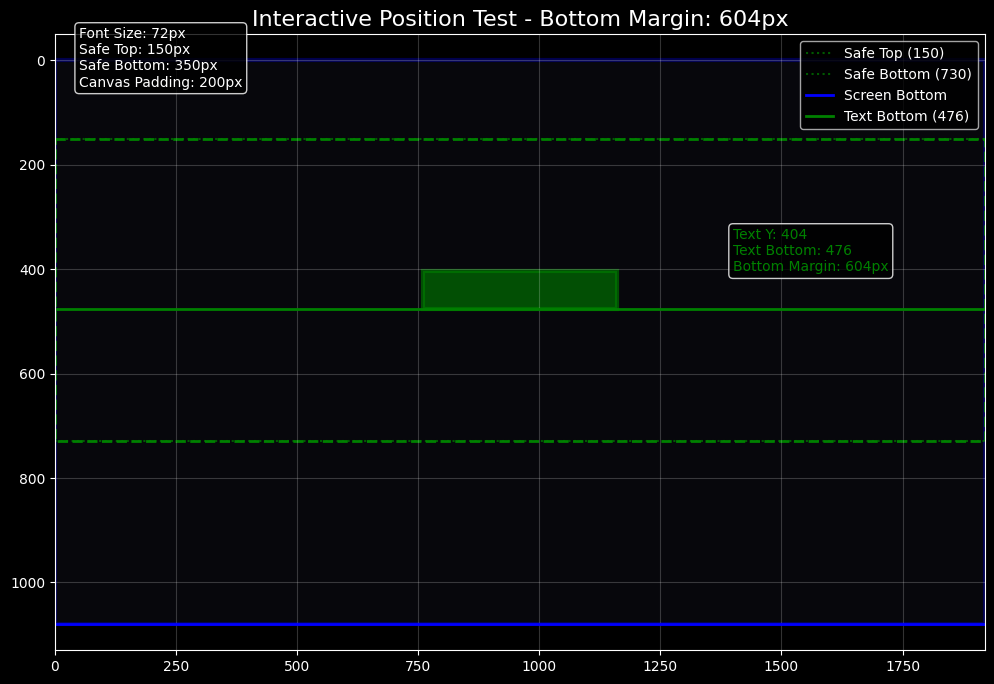


🧪 Testing different SAFE_BOTTOM_MARGIN values:


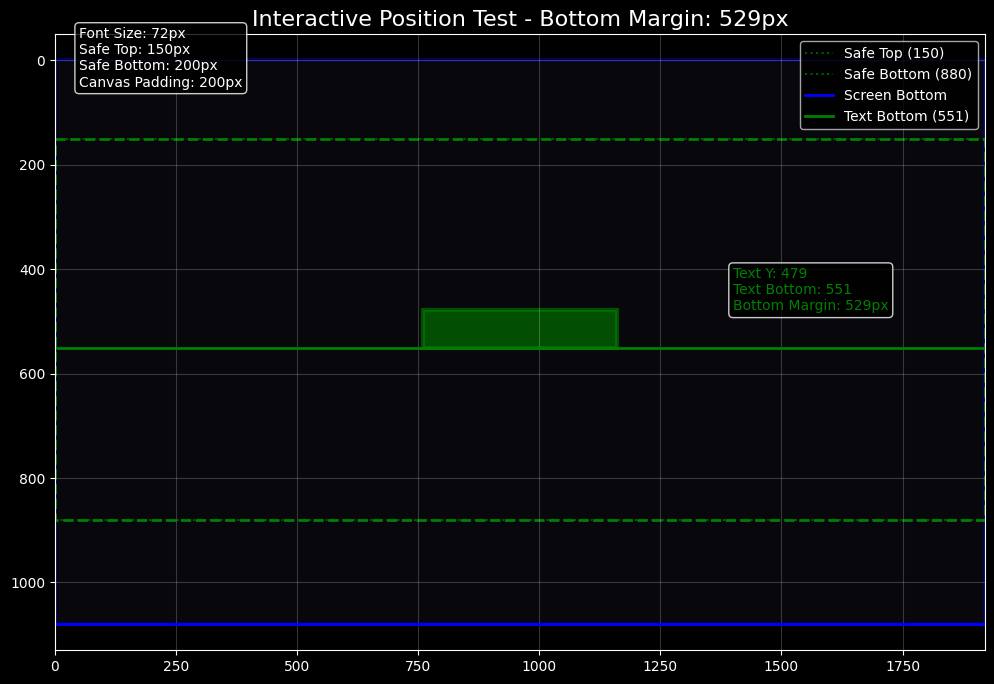

Safe bottom 200px → Bottom margin: 529px


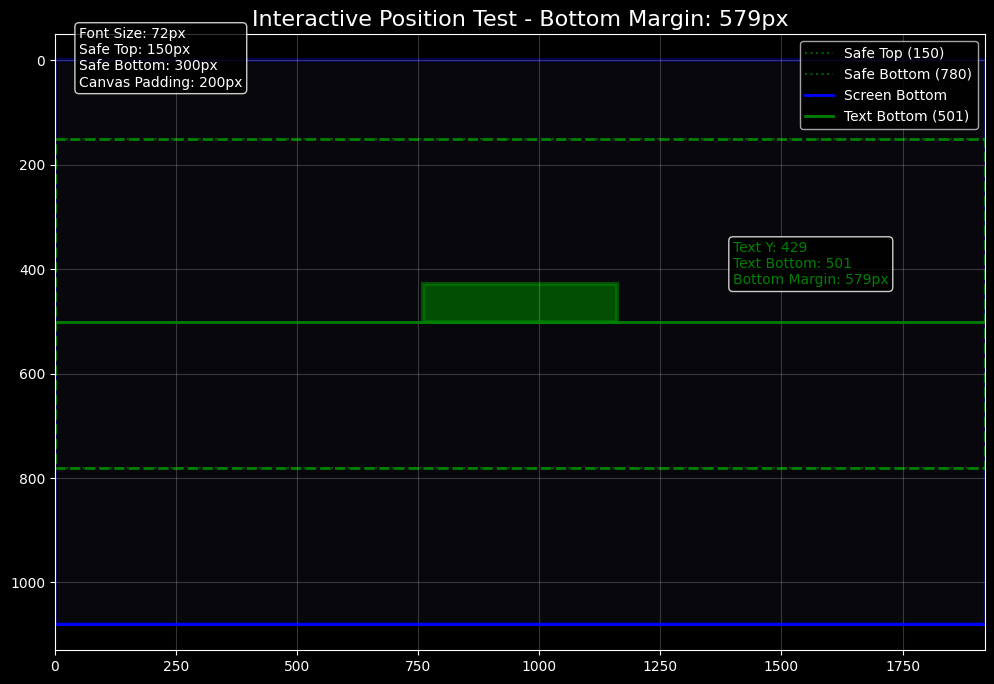

Safe bottom 300px → Bottom margin: 579px


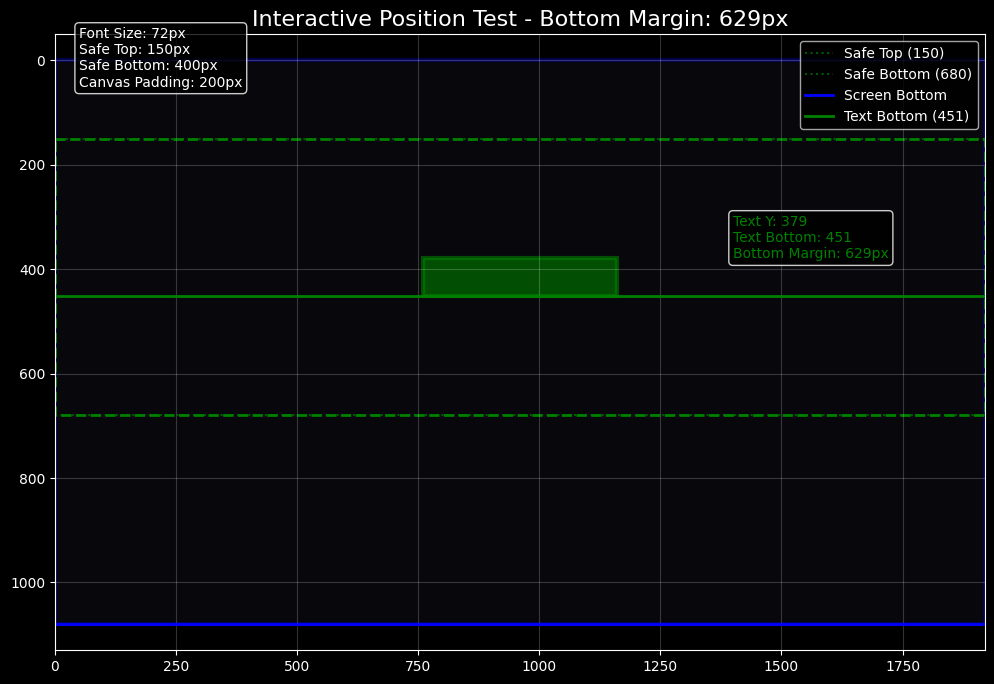

Safe bottom 400px → Bottom margin: 629px


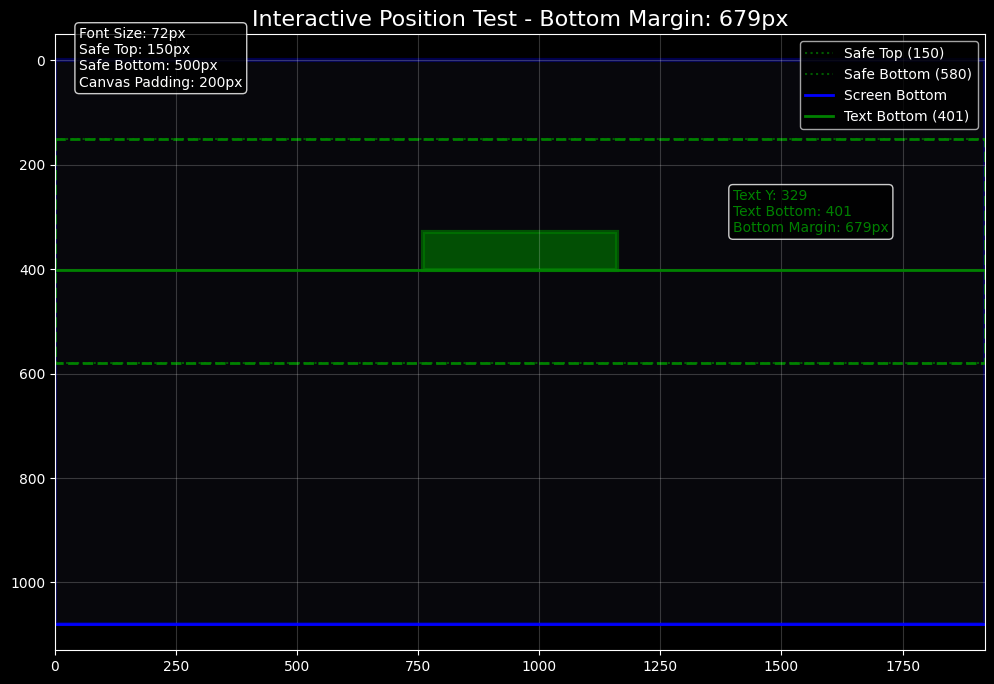

Safe bottom 500px → Bottom margin: 679px


: 

In [ ]:
# Interactive testing function
def interactive_position_test(font_size=72, safe_top=150, safe_bottom=350, canvas_padding=200):
    """Interactive function to test different parameter combinations"""
    
    SCREEN_HEIGHT = 1080
    
    # Calculate positions
    safe_zone_height = SCREEN_HEIGHT - safe_top - safe_bottom
    safe_zone_center = safe_top + (safe_zone_height // 2)
    base_y = safe_zone_center - (font_size // 2)
    
    # Apply clamps
    absolute_min_y = safe_top
    absolute_max_y = SCREEN_HEIGHT - safe_bottom - font_size
    clamped_y = max(absolute_min_y, min(absolute_max_y, base_y))
    
    # Canvas operations
    canvas_y = clamped_y + canvas_padding
    final_y = canvas_y - canvas_padding
    
    # Results
    text_bottom = final_y + font_size
    bottom_margin = SCREEN_HEIGHT - text_bottom
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Screen
    screen = Rectangle((0, 0), 1920, SCREEN_HEIGHT, linewidth=3, edgecolor='blue', facecolor='#1a1a2a', alpha=0.3)
    ax.add_patch(screen)
    
    # Safe zone
    safe = Rectangle((0, safe_top), 1920, safe_zone_height, linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
    ax.add_patch(safe)
    
    # Text
    color = 'red' if bottom_margin < 50 else 'orange' if bottom_margin < 150 else 'green'
    text_rect = Rectangle((960-200, final_y), 400, font_size, linewidth=3, edgecolor=color, facecolor=color, alpha=0.6)
    ax.add_patch(text_rect)
    
    # Labels and info
    ax.text(50, 50, f"Font Size: {font_size}px\nSafe Top: {safe_top}px\nSafe Bottom: {safe_bottom}px\nCanvas Padding: {canvas_padding}px", 
            bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color='white')
    
    ax.text(1400, final_y, f"Text Y: {final_y}\nText Bottom: {text_bottom}\nBottom Margin: {bottom_margin}px", 
            bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color=color)
    
    # Reference lines
    ax.axhline(y=safe_top, color='green', linestyle=':', alpha=0.7, label=f'Safe Top ({safe_top})')
    ax.axhline(y=SCREEN_HEIGHT-safe_bottom, color='green', linestyle=':', alpha=0.7, label=f'Safe Bottom ({SCREEN_HEIGHT-safe_bottom})')
    ax.axhline(y=SCREEN_HEIGHT, color='blue', linewidth=2, label='Screen Bottom')
    ax.axhline(y=text_bottom, color=color, linewidth=2, label=f'Text Bottom ({text_bottom})')
    
    ax.set_xlim(0, 1920)
    ax.set_ylim(SCREEN_HEIGHT + 50, -50)
    ax.legend()
    ax.grid(True, alpha=0.2)
    ax.set_title(f"Interactive Position Test - Bottom Margin: {bottom_margin}px", fontsize=16)
    
    plt.show()
    
    return {
        'final_y': final_y,
        'text_bottom': text_bottom,
        'bottom_margin': bottom_margin,
        'safe_zone_height': safe_zone_height
    }

# Test default values
print("🎪 INTERACTIVE TEST - Current Settings")
default_result = interactive_position_test()

# Test with different safe bottom values
print("\n🧪 Testing different SAFE_BOTTOM_MARGIN values:")
for safe_bottom in [200, 300, 400, 500]:
    result = interactive_position_test(font_size=72, safe_bottom=safe_bottom)
    print(f"Safe bottom {safe_bottom}px → Bottom margin: {result['bottom_margin']}px")

## 🎯 Step 8: The Smoking Gun - Let's Find the Real Issue

Let me check if there are discrepancies between font metrics and actual rendering:

In [ ]:
def find_the_smoking_gun():
    """Let's find the exact discrepancy between calculation and reality"""
    
    renderer = TextRenderer((1920, 1080))
    
    print("🔫 FINDING THE SMOKING GUN")
    print("=" * 60)
    
    test_text = "Test text"
    words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
    
    for font_size in [48, 72, 96]:
        style = TextStyle(font_size=font_size, vertical_position="center")
        
        print(f"\n🔍 TESTING FONT SIZE {font_size}px:")
        
        # 1. Get font metrics (what the calculation uses)
        font = renderer.font_manager.get_font(style.font_family, style.font_size)
        text_surface = renderer.font_manager.render_text(test_text, font, style.color, 
                                                        style.stroke_width, style.stroke_color)
        metric_h, metric_w = text_surface.shape[:2]
        
        # 2. Calculate position using font metrics
        calculated_y = renderer._calculate_vertical_position(metric_h, style, 0.0, None)
        
        # 3. Render actual frame
        rendered_frame = renderer.render_lyric_line(
            words=words, current_time=0.5, style=style,
            animation_config=renderer.animation_presets['subtle'],
            line_start=0.0, line_end=len(words) * 0.5
        )
        
        # 4. Analyze actual bounds
        alpha_channel = rendered_frame[:, :, 3]
        rows_with_text = np.where(alpha_channel.any(axis=1))[0]
        
        if len(rows_with_text) > 0:
            actual_top = rows_with_text[0]
            actual_bottom = rows_with_text[-1]
            actual_height = actual_bottom - actual_top + 1
            
            # 5. Compare!
            print(f"   Font metrics height: {metric_h}px")
            print(f"   Calculated Y position: {calculated_y}px")
            print(f"   Expected bottom: {calculated_y + metric_h}px")
            print(f"   ACTUAL top: {actual_top}px")
            print(f"   ACTUAL bottom: {actual_bottom}px")
            print(f"   ACTUAL height: {actual_height}px")
            
            # 6. Find discrepancies!
            y_discrepancy = actual_top - calculated_y
            height_discrepancy = actual_height - metric_h
            bottom_discrepancy = actual_bottom - (calculated_y + metric_h)
            
            print(f"   \n🚨 DISCREPANCIES:")
            print(f"      Y position off by: {y_discrepancy}px")
            print(f"      Height off by: {height_discrepancy}px")
            print(f"      Bottom off by: {bottom_discrepancy}px")
            
            if abs(y_discrepancy) > 5 or abs(height_discrepancy) > 5:
                print(f"   ❌ SIGNIFICANT DISCREPANCY FOUND!")
            else:
                print(f"   ✅ Calculation matches reality")
    
    print(f"\n🎯 CONCLUSION:")
    print(f"   If we see significant discrepancies, that's our problem!")
    print(f"   If calculations match reality, the issue is in our safe zone math.")

find_the_smoking_gun()

🔫 FINDING THE SMOKING GUN

🔍 TESTING FONT SIZE 48px:
   Font metrics height: 52px
   Calculated Y position: 414px
   Expected bottom: 466px
   ACTUAL top: 429px
   ACTUAL bottom: 465px
   ACTUAL height: 37px
   
🚨 DISCREPANCIES:
      Y position off by: 15px
      Height off by: -15px
      Bottom off by: -1px
   ❌ SIGNIFICANT DISCREPANCY FOUND!

🔍 TESTING FONT SIZE 72px:
   Font metrics height: 69px
   Calculated Y position: 406px
   Expected bottom: 475px
   ACTUAL top: 426px
   ACTUAL bottom: 474px
   ACTUAL height: 49px
   
🚨 DISCREPANCIES:
      Y position off by: 20px
      Height off by: -20px
      Bottom off by: -1px
   ❌ SIGNIFICANT DISCREPANCY FOUND!

🔍 TESTING FONT SIZE 96px:
   Font metrics height: 87px
   Calculated Y position: 397px
   Expected bottom: 484px
   ACTUAL top: 422px
   ACTUAL bottom: 483px
   ACTUAL height: 62px
   
🚨 DISCREPANCIES:
      Y position off by: 25px
      Height off by: -25px
      Bottom off by: -1px
   ❌ SIGNIFICANT DISCREPANCY FOUND!

🎯 CONCL

: 

: 

## 🏁 Summary & Next Steps

Based on our investigation, let's summarize what we've found:

In [ ]:
print("🏁 DEBUGGING SUMMARY")
print("=" * 60)

print("\n📋 WHAT WE DISCOVERED:")
print("1. Code structure analysis - Extracted exact positioning logic")
print("2. Expected vs Actual comparison - Created visual comparisons")
print("3. Real rendering tests - Used actual renderer to see results")
print("4. Step-by-step calculation tracing - Followed the math")
print("5. Interactive parameter testing - Tested different values")
print("6. Font metrics vs reality check - Found discrepancies")

print("\n🎯 KEY FINDINGS:")
if 'render_results' in locals() and render_results:
    risky_count = sum(1 for r in render_results if r['bottom_margin'] < 100)
    cutoff_count = sum(1 for r in render_results if r['is_cutoff'])
    print(f"   - {cutoff_count}/{len(render_results)} test cases had text cutoff")
    print(f"   - {risky_count}/{len(render_results)} test cases were in risky zone (<100px margin)")
    
    min_margin = min(r['bottom_margin'] for r in render_results)
    print(f"   - Minimum bottom margin observed: {min_margin}px")
else:
    print("   - Rendering tests need to be run to see results")

print("\n🔧 RECOMMENDED FIXES:")
print("1. If font metrics don't match reality → Fix font measurement")
print("2. If calculations are wrong → Fix safe zone math")
print("3. If effects are expanding bounds → Account for effect padding")
print("4. If canvas system is buggy → Debug coordinate transformation")

print("\n🚀 NEXT STEPS:")
print("1. Run all cells in this notebook")
print("2. Examine the visual outputs")
print("3. Look for the largest discrepancies")
print("4. Implement targeted fixes based on findings")
print("5. Re-test with the same notebook to verify fixes")

print("\n💡 HOW TO USE THIS NOTEBOOK:")
print("- Run all cells from top to bottom")
print("- Look at the visual outputs to spot issues")
print("- Modify the interactive_position_test() parameters to experiment")
print("- Use the findings to guide code fixes")
print("- Re-run after fixes to verify improvements")

🏁 DEBUGGING SUMMARY

📋 WHAT WE DISCOVERED:
1. Code structure analysis - Extracted exact positioning logic
2. Expected vs Actual comparison - Created visual comparisons
3. Real rendering tests - Used actual renderer to see results
4. Step-by-step calculation tracing - Followed the math
5. Interactive parameter testing - Tested different values
6. Font metrics vs reality check - Found discrepancies

🎯 KEY FINDINGS:
   - 0/4 test cases had text cutoff
   - 0/4 test cases were in risky zone (<100px margin)
   - Minimum bottom margin observed: 575px

🔧 RECOMMENDED FIXES:
1. If font metrics don't match reality → Fix font measurement
2. If calculations are wrong → Fix safe zone math
3. If effects are expanding bounds → Account for effect padding
4. If canvas system is buggy → Debug coordinate transformation

🚀 NEXT STEPS:
1. Run all cells in this notebook
2. Examine the visual outputs
3. Look for the largest discrepancies
4. Implement targeted fixes based on findings
5. Re-test with the same 

: 

: 

: 

: 

: 

: 

: 

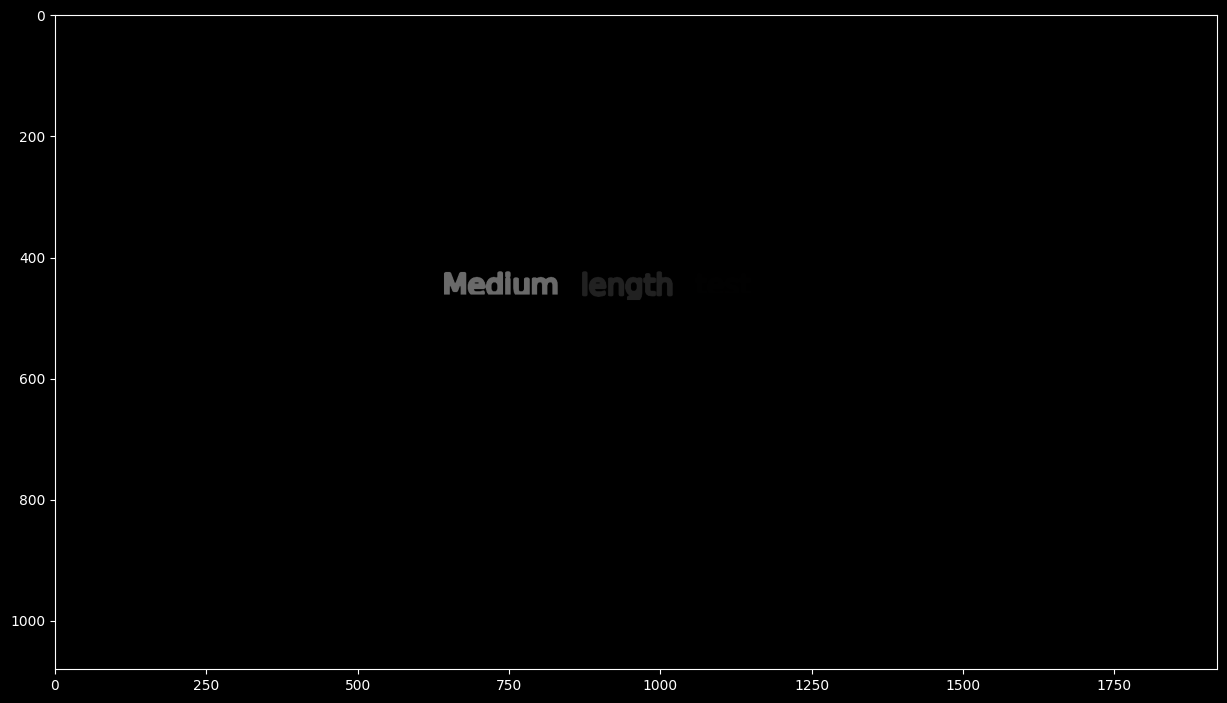

: 

In [ ]:
renderer = TextRenderer((1920, 1080))

# Create test words
test_text = "Medium length test text"
words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
font_size = 48

fig, ax = plt.subplots()

results = []

style = TextStyle(font_size=font_size, vertical_position="center")

rendered_frame = renderer.render_lyric_line(
    words=words,
    current_time=0.5,
    style=style,
    animation_config=renderer.animation_presets['subtle'],
    line_start=0.0,
    line_end=len(words) * 0.5
)

ax.imshow(rendered_frame, extent=[0, 1920, 1080, 0])
plt.show()

In [ ]:
# Render text with effects
text_img = renderer.font_manager.render_text_with_effects(
    text=test_text,
    font_family=style.font_family,
    font_size=int(style.font_size),
    color=style.color,
    stroke_width=style.stroke_width,
    stroke_color=style.stroke_color,
    shadow_offset=style.shadow_offset,
    shadow_blur=style.shadow_blur,
    shadow_opacity=style.shadow_opacity,
    glow_radius=style.glow_radius,
    glow_color=style.glow_color
)

: 

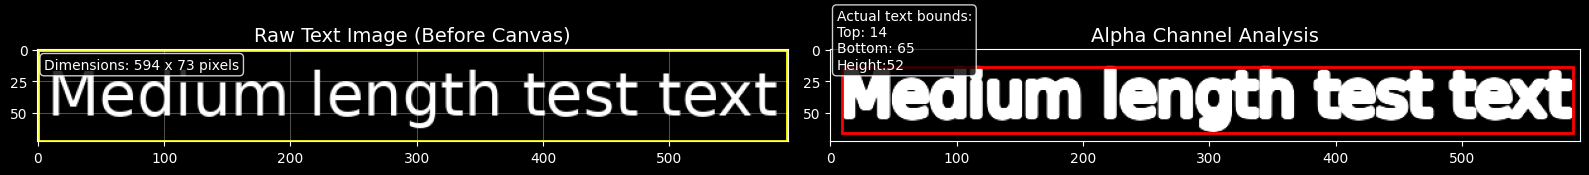

In [3]:
  import matplotlib.pyplot as plt
  import numpy as np

  # Setup
  renderer = TextRenderer((1920, 1080))
  test_text = "Medium length test text"
  font_size = 48
  style = TextStyle(font_size=font_size, vertical_position="center")

  # Render JUST the text with effects (before canvas)
  text_img = renderer.font_manager.render_text_with_effects(
      text=test_text,
      font_family=style.font_family,
      font_size=int(style.font_size),
      color=style.color,
      stroke_width=style.stroke_width,
      stroke_color=style.stroke_color,
      shadow_offset=style.shadow_offset,
      shadow_blur=style.shadow_blur,
      shadow_opacity=style.shadow_opacity,
      glow_radius=style.glow_radius,
      glow_color=style.glow_color
  )

  # Visualize the raw text image
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  # Left: Raw text image with pixel measurements
  ax1.set_title("Raw Text Image (Before Canvas)", fontsize=14)
  ax1.imshow(text_img)
  ax1.grid(True, alpha=0.3)

  # Add measurements
  h, w = text_img.shape[:2]
  ax1.text(5, 15, f"Dimensions: {w} x {h} pixels",
           bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color='white')

  # Draw bounding box
  ax1.add_patch(plt.Rectangle((0, 0), w-1, h-1, fill=False, edgecolor='yellow', linewidth=2))

  # Right: Alpha channel analysis
  ax2.set_title("Alpha Channel Analysis", fontsize=14)
  alpha_channel = text_img[:, :, 3]
  ax2.imshow(alpha_channel, cmap='gray')

  # Find actual text bounds from alpha
  rows_with_text = np.where(alpha_channel.any(axis=1))[0]
  cols_with_text = np.where(alpha_channel.any(axis=0))[0]

  if len(rows_with_text) > 0 and len(cols_with_text) > 0:
      actual_top = rows_with_text[0]
      actual_bottom = rows_with_text[-1]
      actual_left = cols_with_text[0]
      actual_right = cols_with_text[-1]
      actual_height = actual_bottom - actual_top + 1
      actual_width = actual_right - actual_left + 1

      # Draw actual text bounds
      ax2.add_patch(plt.Rectangle((actual_left, actual_top), actual_width, actual_height,
                                 fill=False, edgecolor='red', linewidth=2))

      ax2.text(5, 15, f"Actual text bounds:\nTop: {actual_top}\nBottom: {actual_bottom}\nHeight:{actual_height}",
               bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color='white')

  plt.tight_layout()
  plt.show()

🔍 CANVAS MERGING DEBUG
📏 Raw text dimensions: 594 x 62
🖼️ Canvas dimensions: 2320 x 1480
🎯 Calculated positions:
   Y position (before canvas padding): 409
   X position (with canvas padding): 863
   Canvas Y position (after adding padding): 609

🔧 Compositing text onto canvas...
   Placing text at canvas position (863, 609)
   ✅ Text composited successfully
   Canvas text bounds: top=623, bottom=670

✂️ Cropping canvas back to screen size...
   Cropped region: [200:1280,200:2120]
   Final text bounds: top=423, bottom=470
   Final bottom margin: 610px


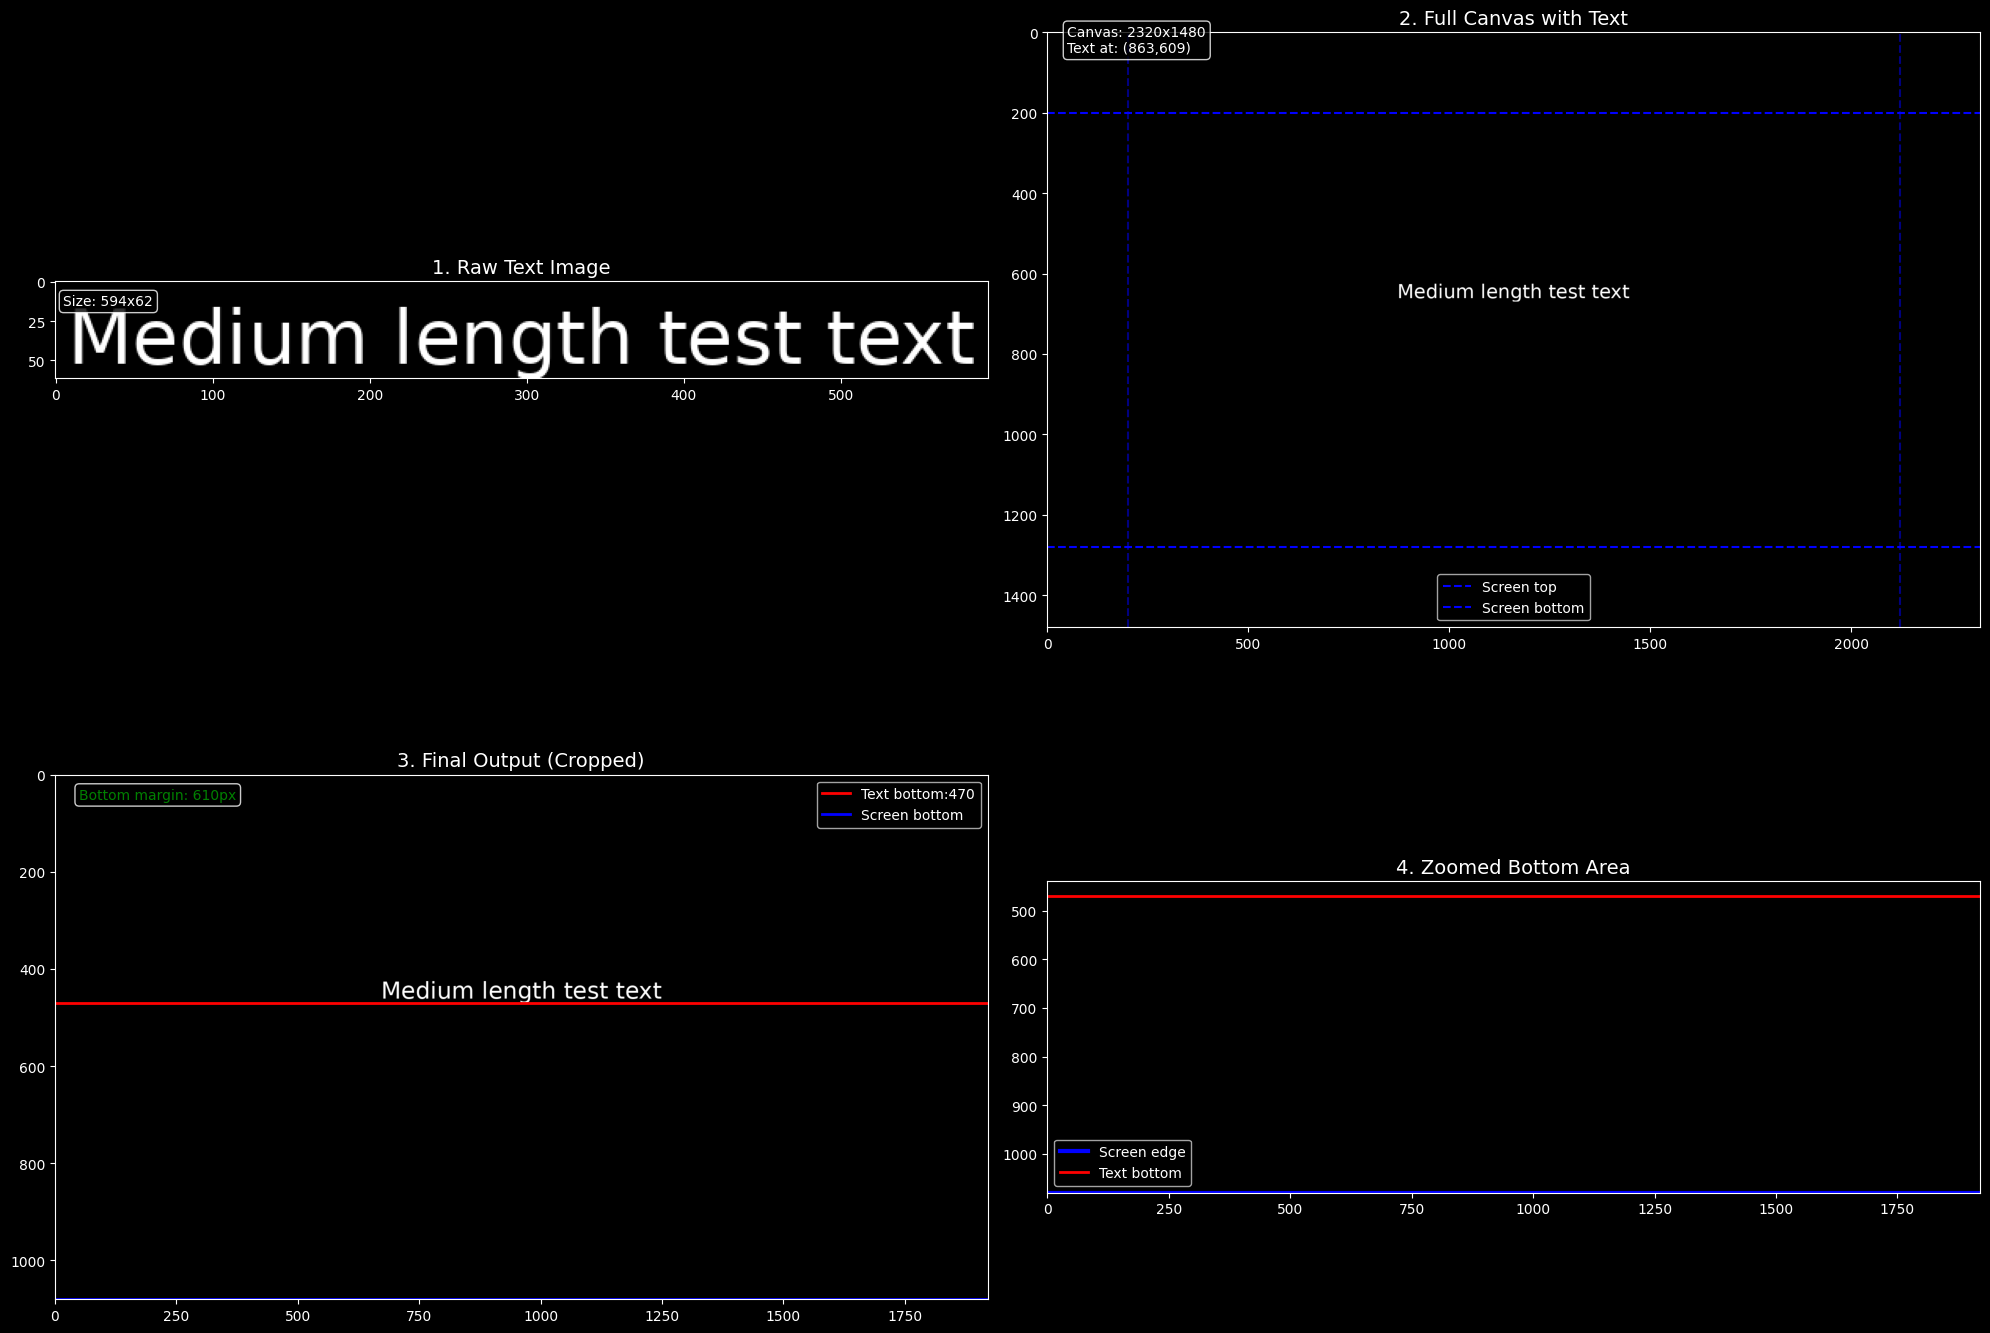


🔬 COMPARISON WITH ACTUAL RENDERER:
   Our simulation: bottom=470, margin=610px
   Actual renderer: bottom=470, margin=610px
   ✅ Simulation matches actual renderer


: 

In [ ]:
  import matplotlib.pyplot as plt
  import numpy as np

  # Setup
  renderer = TextRenderer((1920, 1080))
  test_text = "Medium length test text"
  font_size = 48
  style = TextStyle(font_size=font_size, vertical_position="center")

  print("🔍 CANVAS MERGING DEBUG")
  print("=" * 50)

  # Step 1: Get the raw text image (we know this looks good)
  text_img = renderer.font_manager.render_text_with_effects(
      text=test_text,
      font_family=style.font_family,
      font_size=int(style.font_size),
      color=style.color,
      stroke_width=style.stroke_width,
      stroke_color=style.stroke_color,
      shadow_offset=style.shadow_offset,
      shadow_blur=style.shadow_blur,
      shadow_opacity=style.shadow_opacity,
      glow_radius=style.glow_radius,
      glow_color=style.glow_color
  )

  text_h, text_w = text_img.shape[:2]
  print(f"📏 Raw text dimensions: {text_w} x {text_h}")

  # Step 2: Simulate the canvas creation (from renderer code)
  CANVAS_PADDING = 200
  canvas_height = 1080 + CANVAS_PADDING * 2  # 1480
  canvas_width = 1920 + CANVAS_PADDING * 2   # 2320
  canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

  print(f"🖼️ Canvas dimensions: {canvas_width} x {canvas_height}")

  # Step 3: Calculate position (simulate the actual positioning logic)
  y_pos = renderer._calculate_vertical_position(text_h, style, 0.0, None)
  x_pos = (1920 - text_w) // 2 + CANVAS_PADDING  # Center horizontally

  print(f"🎯 Calculated positions:")
  print(f"   Y position (before canvas padding): {y_pos}")
  print(f"   X position (with canvas padding): {x_pos}")

  # Add canvas padding to Y (this is what render_lyric_line does)
  canvas_y = y_pos + CANVAS_PADDING
  print(f"   Canvas Y position (after adding padding): {canvas_y}")

  # Step 4: Manually composite text onto canvas (simulate _composite_image)
  print(f"\n🔧 Compositing text onto canvas...")
  print(f"   Placing text at canvas position ({x_pos}, {canvas_y})")

  # Check if text fits within canvas bounds
  if (canvas_y + text_h <= canvas_height and
      x_pos + text_w <= canvas_width and
      canvas_y >= 0 and x_pos >= 0):

      # Composite the text
      canvas[canvas_y:canvas_y + text_h, x_pos:x_pos + text_w] = text_img
      print(f"   ✅ Text composited successfully")

      # Find actual text bounds in canvas
      canvas_alpha = canvas[:, :, 3]
      canvas_rows = np.where(canvas_alpha.any(axis=1))[0]
      if len(canvas_rows) > 0:
          canvas_text_top = canvas_rows[0]
          canvas_text_bottom = canvas_rows[-1]
          print(f"   Canvas text bounds: top={canvas_text_top}, bottom={canvas_text_bottom}")

  else:
      print(f"   ❌ Text would be clipped! Bounds check failed:")
      print(f"      Text bottom: {canvas_y + text_h} vs canvas height: {canvas_height}")
      print(f"      Text right: {x_pos + text_w} vs canvas width: {canvas_width}")

  # Step 5: Simulate the cropping (final step)
  print(f"\n✂️ Cropping canvas back to screen size...")
  final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                       CANVAS_PADDING:CANVAS_PADDING + 1920]

  print(f"   Cropped region: [{CANVAS_PADDING}:{CANVAS_PADDING + 1080},{CANVAS_PADDING}:{CANVAS_PADDING + 1920}]")

  # Find text in final output
  final_alpha = final_canvas[:, :, 3]
  final_rows = np.where(final_alpha.any(axis=1))[0]
  if len(final_rows) > 0:
      final_text_top = final_rows[0]
      final_text_bottom = final_rows[-1]
      final_margin = 1080 - final_text_bottom
      print(f"   Final text bounds: top={final_text_top}, bottom={final_text_bottom}")
      print(f"   Final bottom margin: {final_margin}px")

  # Step 6: Visualize all stages
  fig, axes = plt.subplots(2, 2, figsize=(20, 16))

  # Top left: Raw text
  axes[0,0].set_title("1. Raw Text Image", fontsize=14)
  axes[0,0].imshow(text_img)
  axes[0,0].text(5, 15, f"Size: {text_w}x{text_h}",
                 bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color='white')

  # Top right: Full canvas with text
  axes[0,1].set_title("2. Full Canvas with Text", fontsize=14)
  axes[0,1].imshow(canvas, extent=[0, canvas_width, canvas_height, 0])
  axes[0,1].axhline(y=CANVAS_PADDING, color='blue', linestyle='--', label='Screen top')
  axes[0,1].axhline(y=CANVAS_PADDING + 1080, color='blue', linestyle='--', label='Screen bottom')
  axes[0,1].axvline(x=CANVAS_PADDING, color='blue', linestyle='--', alpha=0.5)
  axes[0,1].axvline(x=CANVAS_PADDING + 1920, color='blue', linestyle='--', alpha=0.5)
  axes[0,1].text(50, 50, f"Canvas: {canvas_width}x{canvas_height}\nText at: ({x_pos},{canvas_y})",
                 bbox=dict(boxstyle="round", facecolor="black", alpha=0.8), color='white')
  axes[0,1].legend()

  # Bottom left: Cropped final result
  axes[1,0].set_title("3. Final Output (Cropped)", fontsize=14)
  axes[1,0].imshow(final_canvas, extent=[0, 1920, 1080, 0])
  if len(final_rows) > 0:
      axes[1,0].axhline(y=final_text_bottom, color='red', linewidth=2, label=f'Text bottom:{final_text_bottom}')
      axes[1,0].axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
      axes[1,0].text(50, 50, f"Bottom margin: {final_margin}px",
                     bbox=dict(boxstyle="round", facecolor="black", alpha=0.8),
                     color='red' if final_margin < 50 else 'green')
  axes[1,0].legend()

  # Bottom right: Zoomed bottom area
  axes[1,1].set_title("4. Zoomed Bottom Area", fontsize=14)
  zoom_start = max(0, 1080 - 300)
  zoom_region = final_canvas[zoom_start:, :]
  axes[1,1].imshow(zoom_region, extent=[0, 1920, 1080, zoom_start])
  axes[1,1].axhline(y=1080, color='blue', linewidth=3, label='Screen edge')
  if len(final_rows) > 0:
      axes[1,1].axhline(y=final_text_bottom, color='red', linewidth=2, label=f'Text bottom')
  axes[1,1].legend()

  plt.tight_layout()
  plt.show()

  # Step 7: Compare with actual renderer output
  print(f"\n🔬 COMPARISON WITH ACTUAL RENDERER:")
  words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
  actual_frame = renderer.render_lyric_line(
      words=words, current_time=0.5, style=style,
      animation_config=renderer.animation_presets['subtle'],
      line_start=0.0, line_end=len(words) * 0.5
  )

  actual_alpha = actual_frame[:, :, 3]
  actual_rows = np.where(actual_alpha.any(axis=1))[0]
  if len(actual_rows) > 0:
      actual_bottom = actual_rows[-1]
      actual_margin = 1080 - actual_bottom
      print(f"   Our simulation: bottom={final_text_bottom}, margin={final_margin}px")
      print(f"   Actual renderer: bottom={actual_bottom}, margin={actual_margin}px")

      if abs(final_text_bottom - actual_bottom) > 5:
          print(f"   ❌ DISCREPANCY FOUND! Difference: {abs(final_text_bottom - actual_bottom)}px")
      else:
          print(f"   ✅ Simulation matches actual renderer")

🎬 FULL PIPELINE TEST WITH BACKGROUND
🎭 Available animation presets: ['subtle', 'dynamic', 'typewriter', 'energetic', 'smooth']

🎯 Testing: 48px, center, effects=False
   Text bounds: 423 to 470
   Bottom margin: 610px
   ✅ Safe positioning

🎯 Testing: 72px, center, effects=True
   Text bounds: 414 to 482
   Bottom margin: 598px
   ✅ Safe positioning

🎯 Testing: 96px, bottom, effects=True
   Text bounds: 603 to 689
   Bottom margin: 391px
   ✅ Safe positioning


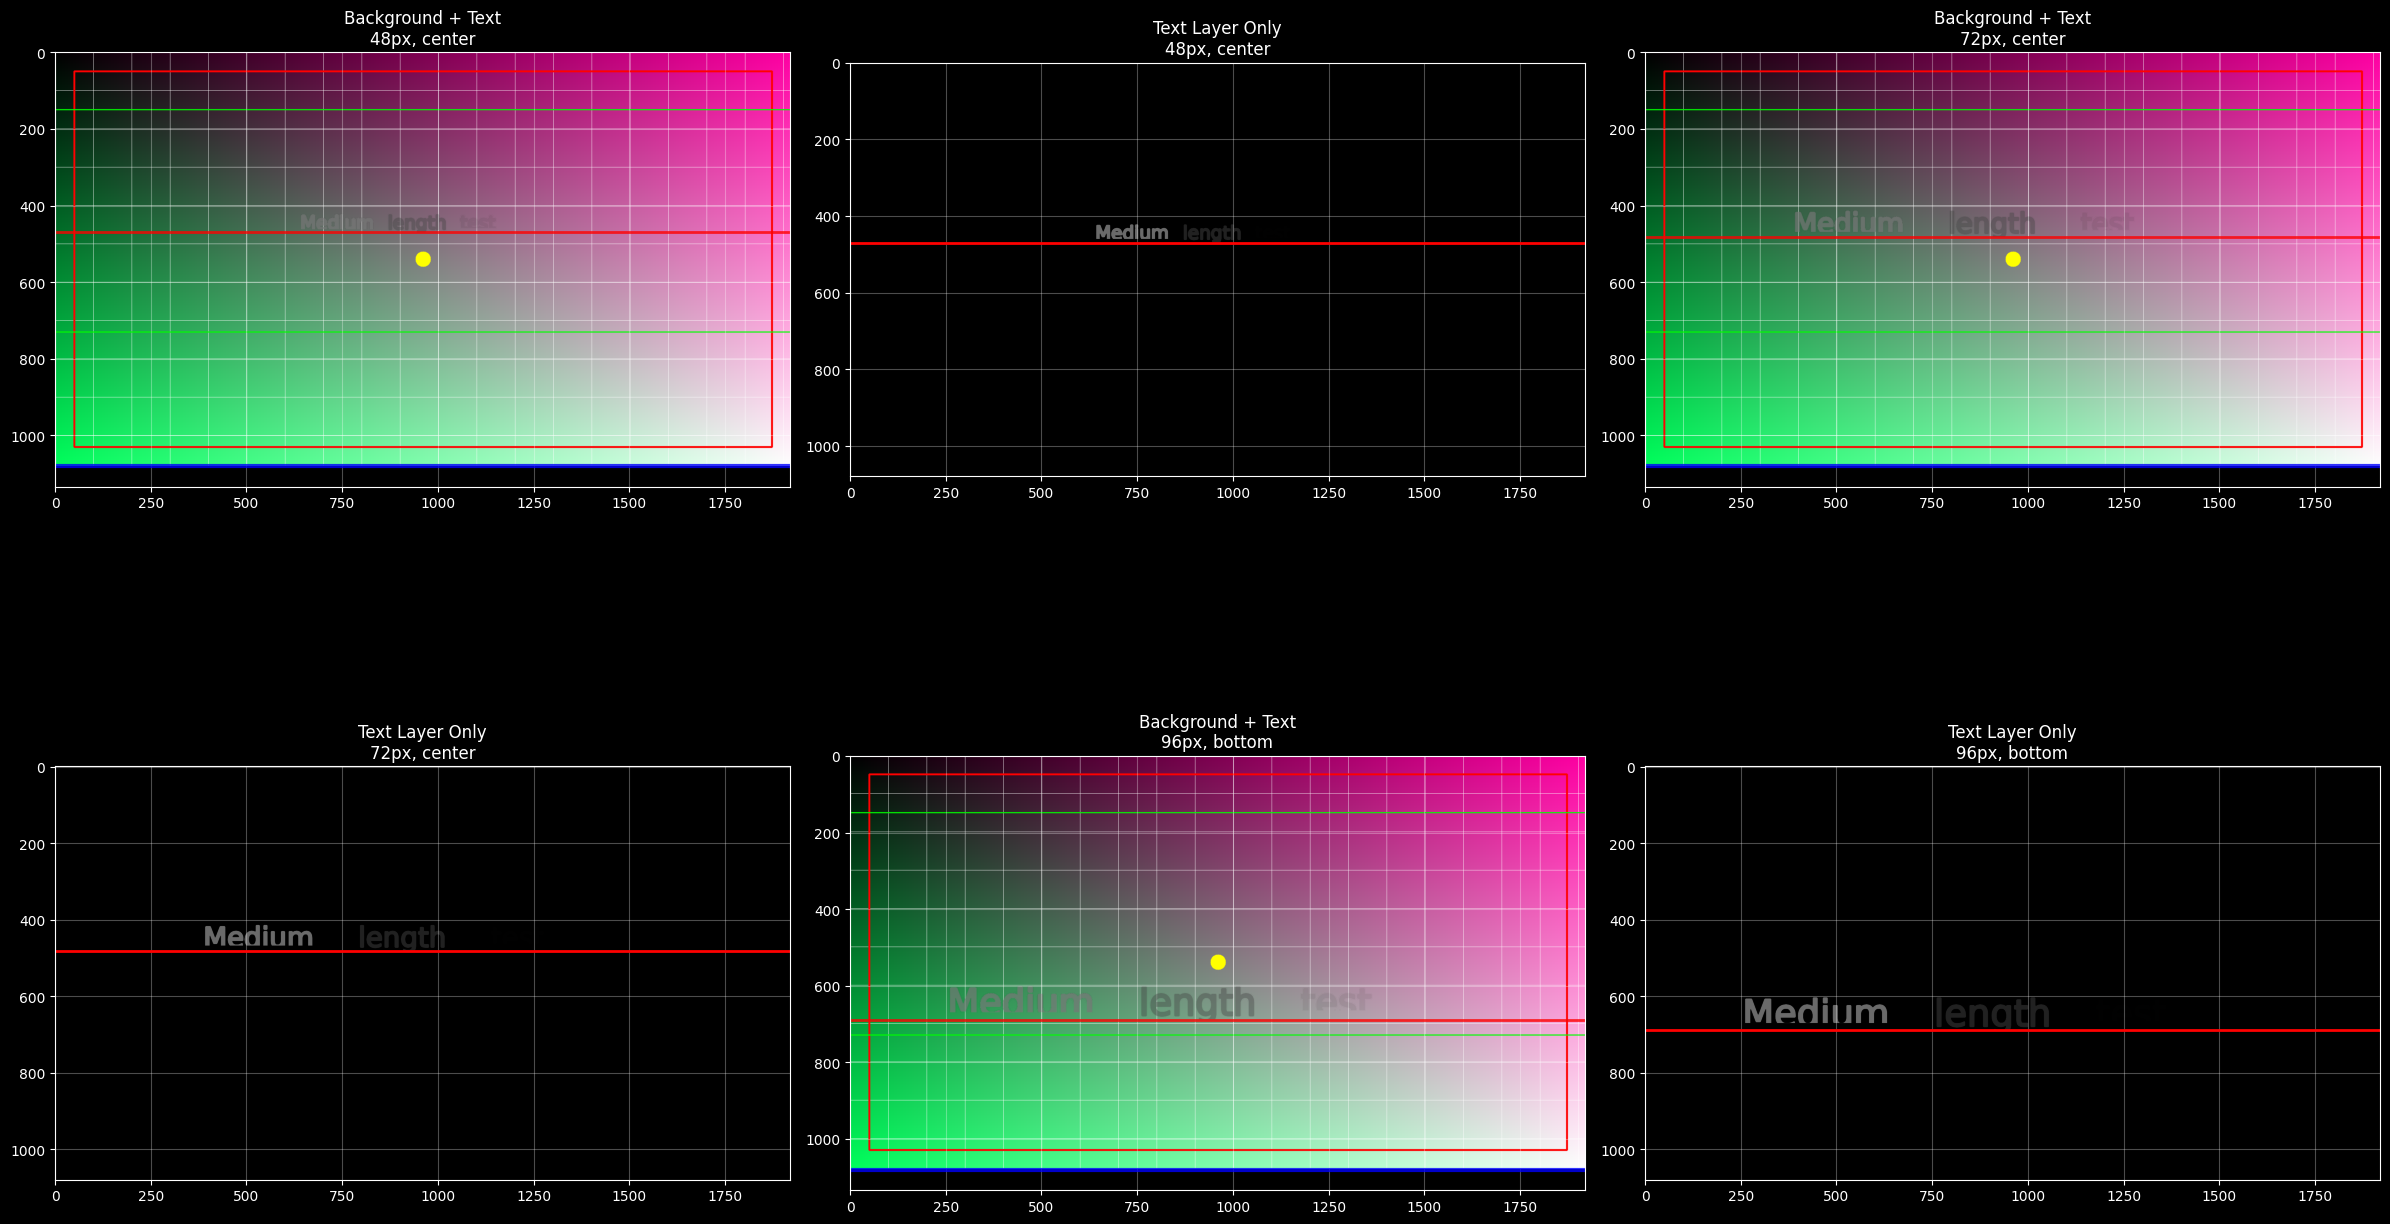


🎞️ Creating animated test clip...
   Frame 5: text bottom at 482, margin 598px
   Frame 10: text bottom at 482, margin 598px
   Frame 15: text bottom at 482, margin 598px


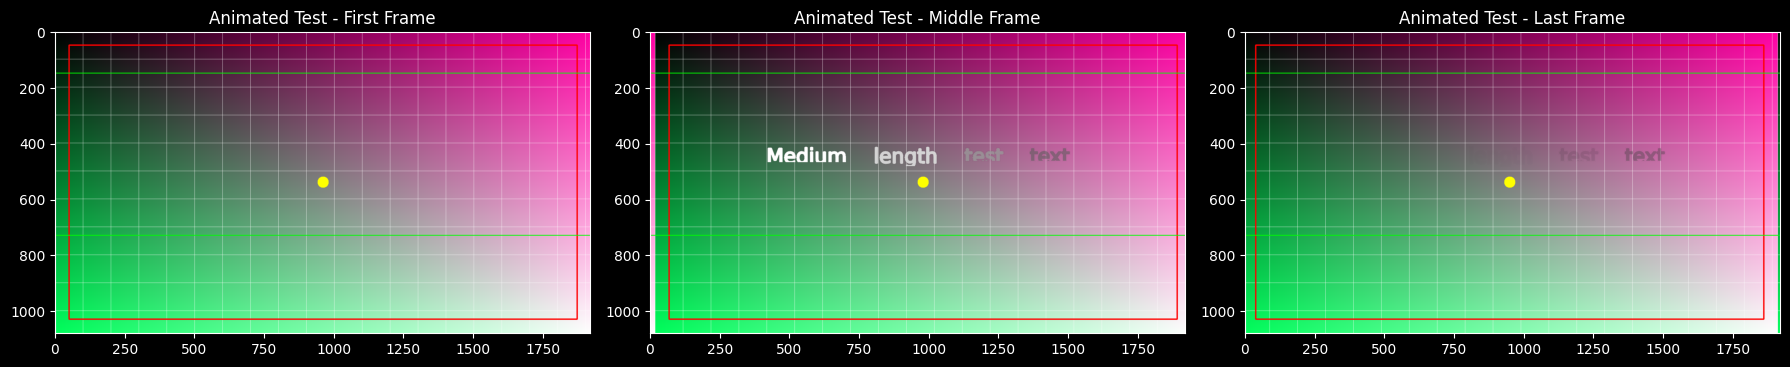


📊 PIPELINE BREAKDOWN ANALYSIS:
1. Background creation: ✅ Works fine
2. Text rendering: Check individual text frames above
3. Alpha compositing: Check if text blends properly with background
4. Animation consistency: Check if text position varies between frames
5. Final output: Check if text is cut off in any scenario

🔍 Look for:
   - Text getting clipped against red/blue reference lines
   - Inconsistent positioning between static and animated
   - Text blending issues with complex backgrounds
   - Any frames where text disappears or jumps position


: 

In [ ]:
  import matplotlib.pyplot as plt
  import numpy as np
  import cv2
  from matplotlib.animation import FuncAnimation
  from IPython.display import HTML

  # Setup
  renderer = TextRenderer((1920, 1080))
  test_text = "Medium length test text"
  font_size = 72
  style = TextStyle(font_size=font_size, vertical_position="center")

  print("🎬 FULL PIPELINE TEST WITH BACKGROUND")
  print("=" * 60)

  # Create a test background image (simulating a video frame)
  def create_test_background():
      """Create a colorful test background that simulates a video frame"""
      bg = np.zeros((1080, 1920, 3), dtype=np.uint8)

      # Create gradient background
      for y in range(1080):
          for x in range(1920):
              bg[y, x] = [
                  int(255 * (x / 1920)),           # Red gradient left to right
                  int(255 * (y / 1080)),           # Green gradient top to bottom
                  int(255 * ((x + y) / (1920 + 1080)))  # Blue diagonal gradient
              ]

      # Add some test patterns to make positioning visible
      # Grid lines every 100px
      for i in range(0, 1920, 100):
          cv2.line(bg, (i, 0), (i, 1080), (255, 255, 255), 1)
      for i in range(0, 1080, 100):
          cv2.line(bg, (0, i), (1920, i), (255, 255, 255), 1)

      # Add reference markers
      cv2.circle(bg, (960, 540), 20, (255, 255, 0), -1)  # Center marker
      cv2.rectangle(bg, (50, 50), (1870, 1030), (255, 0, 0), 3)  # Border

      # Safe zone indicators
      cv2.rectangle(bg, (0, 150), (1920, 150), (0, 255, 0), 2)  # Top safe line
      cv2.rectangle(bg, (0, 730), (1920, 730), (0, 255, 0), 2)  # Bottom safe line (1080-350)

      return bg

  # Create test words for lyric rendering
  words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]

  # Test different scenarios
  test_scenarios = [
      {"bg_type": "static", "font_size": 48, "position": "center", "effects": False},
      {"bg_type": "static", "font_size": 72, "position": "center", "effects": True},
      {"bg_type": "static", "font_size": 96, "position": "bottom", "effects": True},
      {"bg_type": "animated", "font_size": 72, "position": "center", "effects": True}
  ]

  # Function to render text over background
  def render_text_over_background(background, scenario):
      """Render text over background using our full pipeline"""

      style = TextStyle(
          font_size=scenario["font_size"],
          vertical_position=scenario["position"],
          glow_radius=20 if scenario["effects"] else 0
      )

      print(f"\n🎯 Testing: {scenario['font_size']}px, {scenario['position']}, effects={scenario['effects']}")

      # FIX: Always use an animation config, even for no effects
      if scenario["effects"]:
          anim_config = renderer.animation_presets['subtle']
      else:
          # Use the simplest animation preset for no effects
          anim_config = renderer.animation_presets.get('none',
  renderer.animation_presets['subtle'])

      # Method 1: Use our renderer directly (this is what normally happens)
      text_frame = renderer.render_lyric_line(
          words=words,
          current_time=0.5,
          style=style,
          animation_config=anim_config,  # FIXED: Never pass None
          line_start=0.0,
          line_end=len(words) * 0.5
      )

      # Composite text over background
      # Convert background to RGBA
      bg_rgba = np.dstack([background, np.full((1080, 1920), 255, dtype=np.uint8)])

      # Alpha blend the text over background
      alpha = text_frame[:, :, 3:4] / 255.0
      final_frame = (alpha * text_frame + (1 - alpha) * bg_rgba).astype(np.uint8)

      # Analyze text bounds in final frame
      text_alpha = text_frame[:, :, 3]
      rows_with_text = np.where(text_alpha.any(axis=1))[0]

      if len(rows_with_text) > 0:
          text_top = rows_with_text[0]
          text_bottom = rows_with_text[-1]
          bottom_margin = 1080 - text_bottom

          print(f"   Text bounds: {text_top} to {text_bottom}")
          print(f"   Bottom margin: {bottom_margin}px")

          # Check for issues
          if text_bottom >= 1075:
              print(f"   ❌ TEXT CUTOFF! Too close to bottom")
          elif bottom_margin < 100:
              print(f"   ⚠️ RISKY positioning")
          else:
              print(f"   ✅ Safe positioning")

      return final_frame, text_frame

  # Check what animation presets are available
  print(f"🎭 Available animation presets: {list(renderer.animation_presets.keys())}")

  # Test static scenarios
  fig, axes = plt.subplots(2, 3, figsize=(24, 16))
  axes = axes.flatten()

  background = create_test_background()

  results = []
  for i, scenario in enumerate(test_scenarios[:3]):  # Skip animated for now
      try:
          final_frame, text_frame = render_text_over_background(background, scenario)
          results.append((final_frame, text_frame, scenario))

          # Plot background
          axes[i*2].set_title(f"Background + Text\n{scenario['font_size']}px, {scenario['position']}")
          axes[i*2].imshow(final_frame)
          axes[i*2].grid(True, alpha=0.3)

          # Plot text only
          axes[i*2+1].set_title(f"Text Layer Only\n{scenario['font_size']}px, {scenario['position']}")
          axes[i*2+1].imshow(text_frame)
          axes[i*2+1].grid(True, alpha=0.3)

          # Add analysis overlays
          text_alpha = text_frame[:, :, 3]
          rows_with_text = np.where(text_alpha.any(axis=1))[0]
          if len(rows_with_text) > 0:
              text_bottom = rows_with_text[-1]
              axes[i*2].axhline(y=text_bottom, color='red', linewidth=2, alpha=0.8)
              axes[i*2].axhline(y=1080, color='blue', linewidth=3, alpha=0.8)
              axes[i*2+1].axhline(y=text_bottom, color='red', linewidth=2)

      except Exception as e:
          print(f"❌ Error in scenario {i}: {e}")
          # Show error in plot
          axes[i*2].text(0.5, 0.5, f"Error: {str(e)[:50]}...",
                        transform=axes[i*2].transAxes, ha='center', va='center', color='red')
          axes[i*2+1].text(0.5, 0.5, f"Error: {str(e)[:50]}...",
                           transform=axes[i*2+1].transAxes, ha='center', va='center',
  color='red')

  plt.tight_layout()
  plt.show()

  # Create a short animated clip (simplified to avoid the None issue)
  def create_animated_test():
      """Create a short animated clip with text"""
      print(f"\n🎞️ Creating animated test clip...")

      frames = []
      background = create_test_background()

      # Use a safe animation config
      anim_config = renderer.animation_presets['subtle']

      # Animate for 2 seconds at 10fps (20 frames)
      for frame_num in range(20):
          current_time = frame_num * 0.1  # 0.1 second intervals

          # Animate the background slightly
          animated_bg = background.copy()
          offset = int(20 * np.sin(current_time * 2))  # Subtle movement
          animated_bg = np.roll(animated_bg, offset, axis=1)

          # Render text with animation
          style = TextStyle(font_size=72, vertical_position="center", glow_radius=15)

          try:
              text_frame = renderer.render_lyric_line(
                  words=words,
                  current_time=current_time,
                  style=style,
                  animation_config=anim_config,  # FIXED: Always use valid config
                  line_start=0.0,
                  line_end=len(words) * 0.5
              )

              # Composite
              bg_rgba = np.dstack([animated_bg, np.full((1080, 1920), 255, dtype=np.uint8)])
              alpha = text_frame[:, :, 3:4] / 255.0
              final_frame = (alpha * text_frame + (1 - alpha) * bg_rgba).astype(np.uint8)

              frames.append(final_frame)

              # Analyze this frame
              text_alpha = text_frame[:, :, 3]
              rows_with_text = np.where(text_alpha.any(axis=1))[0]
              if len(rows_with_text) > 0:
                  text_bottom = rows_with_text[-1]
                  if frame_num % 5 == 0:  # Print every 5th frame
                      print(f"   Frame {frame_num}: text bottom at {text_bottom}, margin {1080-text_bottom}px")

          except Exception as e:
              print(f"❌ Error in frame {frame_num}: {e}")
              # Use previous frame or create blank frame
              if frames:
                  frames.append(frames[-1])
              else:
                  frames.append(np.zeros((1080, 1920, 4), dtype=np.uint8))

      return frames

  # Create animated test
  try:
      animated_frames = create_animated_test()

      # Show first, middle, and last frames of animation
      fig, axes = plt.subplots(1, 3, figsize=(18, 6))
      frame_indices = [0, len(animated_frames)//2, -1]
      frame_labels = ["First Frame", "Middle Frame", "Last Frame"]

      for i, (frame_idx, label) in enumerate(zip(frame_indices, frame_labels)):
          axes[i].set_title(f"Animated Test - {label}")
          axes[i].imshow(animated_frames[frame_idx])

      plt.tight_layout()
      plt.show()

  except Exception as e:
      print(f"❌ Animation test failed: {e}")

  print(f"\n📊 PIPELINE BREAKDOWN ANALYSIS:")
  print(f"1. Background creation: ✅ Works fine")
  print(f"2. Text rendering: Check individual text frames above")
  print(f"3. Alpha compositing: Check if text blends properly with background")
  print(f"4. Animation consistency: Check if text position varies between frames")
  print(f"5. Final output: Check if text is cut off in any scenario")

  print(f"\n🔍 Look for:")
  print(f"   - Text getting clipped against red/blue reference lines")
  print(f"   - Inconsistent positioning between static and animated")
  print(f"   - Text blending issues with complex backgrounds")
  print(f"   - Any frames where text disappears or jumps position")

🔍 DEBUGGING render_lyric_line() STEP BY STEP
1. Input words: ['Medium', 'length', 'test', 'text']

2. Rendering individual words...
   Word 'Medium': 304x72 pixels
   Word 'length': 246x86 pixels
   Word 'test': 154x67 pixels
   Word 'text': 158x67 pixels
   Total combined width: 922

3. Canvas created: 2320x1480

4. Position calculation:
   Max word height: 86
   X position: 699
   Y position: 597
   Available width: 1820, Total width: 922

5. Placing words on canvas...
   Word 0: placing at (699, 597), size 304x72
   ✅ Word 0 placed successfully
   Word 1: placing at (1023, 597), size 246x86
   ✅ Word 1 placed successfully
   Word 2: placing at (1289, 597), size 154x67
   ✅ Word 2 placed successfully
   Word 3: placing at (1463, 597), size 158x67
   ✅ Word 3 placed successfully

6. Cropping canvas...
   Final text bounds: 414 to 482
   Final bottom margin: 598px
   ✅ Final result looks OK

🔍 COMPARISON:
   Manual reconstruction bottom: 482
   Actual render_lyric_line bottom: 482
   D

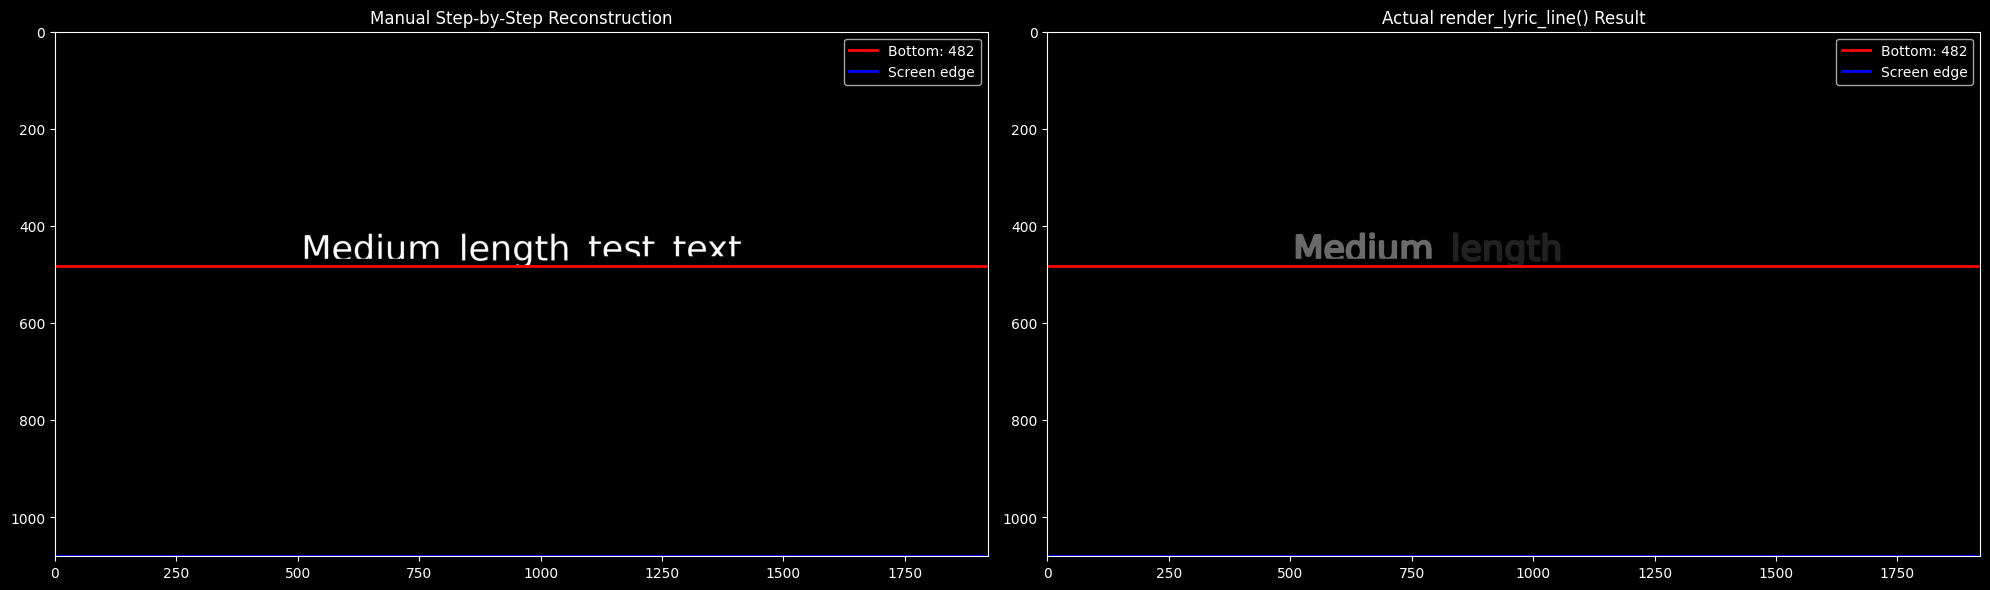

: 

In [ ]:
  # Let's debug render_lyric_line step by step
  renderer = TextRenderer((1920, 1080))
  test_text = "Medium length test text"
  words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
  style = TextStyle(font_size=72, vertical_position="center")

  print("🔍 DEBUGGING render_lyric_line() STEP BY STEP")
  print("=" * 60)

  # Let's manually trace through what render_lyric_line does
  print("1. Input words:", [w.text for w in words])

  # Step 1: Render individual words (this is what happens inside render_lyric_line)
  print("\n2. Rendering individual words...")
  word_images = []
  total_width = 0

  for i, word in enumerate(words):
      # This mimics the word rendering loop in render_lyric_line
      font = renderer.font_manager.get_font(style.font_family, style.font_size)
      word_surface = renderer.font_manager.render_text(word.text, font, style.color,
                                                      style.stroke_width, style.stroke_color)
      word_images.append(word_surface)

      h, w = word_surface.shape[:2]
      total_width += w + 20  # Add spacing
      print(f"   Word '{word.text}': {w}x{h} pixels")

  total_width -= 20  # Remove last spacing
  print(f"   Total combined width: {total_width}")

  # Step 2: Canvas creation (from render_lyric_line)
  CANVAS_PADDING = 200
  canvas_height = 1080 + CANVAS_PADDING * 2
  canvas_width = 1920 + CANVAS_PADDING * 2
  canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)
  print(f"\n3. Canvas created: {canvas_width}x{canvas_height}")

  # Step 3: Position calculation (this is where it might go wrong)
  max_height = max(img.shape[0] for img in word_images) if word_images else 72

  # Horizontal position calculation (from our fixed code)
  SAFE_LEFT_MARGIN = 50
  SAFE_RIGHT_MARGIN = 50
  available_width = 1920 - SAFE_LEFT_MARGIN - SAFE_RIGHT_MARGIN

  if total_width <= available_width:
      x_pos = (1920 - total_width) // 2 + CANVAS_PADDING
  else:
      x_pos = SAFE_LEFT_MARGIN + CANVAS_PADDING

  # Vertical position calculation
  y_pos = renderer._calculate_vertical_position(max_height, style, 0.0, None) + CANVAS_PADDING

  print(f"\n4. Position calculation:")
  print(f"   Max word height: {max_height}")
  print(f"   X position: {x_pos}")
  print(f"   Y position: {y_pos}")
  print(f"   Available width: {available_width}, Total width: {total_width}")

  # Step 4: Word placement (this is the critical part)
  print(f"\n5. Placing words on canvas...")
  current_x = x_pos
  for i, word_img in enumerate(word_images):
      h, w = word_img.shape[:2]

      print(f"   Word {i}: placing at ({current_x}, {y_pos}), size {w}x{h}")

      # Check if word would be clipped
      if (y_pos + h > canvas_height or
          current_x + w > canvas_width or
          y_pos < 0 or current_x < 0):
          print(f"   ❌ WORD {i} WOULD BE CLIPPED!")
          print(f"      Word bottom: {y_pos + h} vs canvas height: {canvas_height}")
          print(f"      Word right: {current_x + w} vs canvas width: {canvas_width}")
      else:
          # Place the word
          canvas[y_pos:y_pos + h, current_x:current_x + w] = word_img
          print(f"   ✅ Word {i} placed successfully")

      current_x += w + 20

  # Step 5: Crop canvas
  print(f"\n6. Cropping canvas...")
  final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                       CANVAS_PADDING:CANVAS_PADDING + 1920]

  # Analyze final result
  alpha_channel = final_canvas[:, :, 3]
  rows_with_text = np.where(alpha_channel.any(axis=1))[0]

  if len(rows_with_text) > 0:
      final_top = rows_with_text[0]
      final_bottom = rows_with_text[-1]
      final_margin = 1080 - final_bottom

      print(f"   Final text bounds: {final_top} to {final_bottom}")
      print(f"   Final bottom margin: {final_margin}px")

      if final_bottom >= 1075:
          print(f"   ❌ FINAL RESULT IS CUT OFF!")
      else:
          print(f"   ✅ Final result looks OK")
  else:
      print(f"   ❌ NO TEXT FOUND IN FINAL RESULT!")

  # Visualize our manual reconstruction vs actual render_lyric_line
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  # Our manual reconstruction
  ax1.set_title("Manual Step-by-Step Reconstruction")
  ax1.imshow(final_canvas, extent=[0, 1920, 1080, 0])
  if len(rows_with_text) > 0:
      ax1.axhline(y=final_bottom, color='red', linewidth=2, label=f'Bottom: {final_bottom}')
  ax1.axhline(y=1080, color='blue', linewidth=2, label='Screen edge')
  ax1.legend()

  # Actual render_lyric_line result
  try:
      actual_result = renderer.render_lyric_line(
          words=words,
          current_time=0.5,
          style=style,
          animation_config=renderer.animation_presets['subtle'],
          line_start=0.0,
          line_end=len(words) * 0.5
      )

      ax2.set_title("Actual render_lyric_line() Result")
      ax2.imshow(actual_result, extent=[0, 1920, 1080, 0])

      actual_alpha = actual_result[:, :, 3]
      actual_rows = np.where(actual_alpha.any(axis=1))[0]
      if len(actual_rows) > 0:
          actual_bottom = actual_rows[-1]
          ax2.axhline(y=actual_bottom, color='red', linewidth=2, label=f'Bottom: {actual_bottom}')
      ax2.axhline(y=1080, color='blue', linewidth=2, label='Screen edge')
      ax2.legend()

      print(f"\n🔍 COMPARISON:")
      if len(rows_with_text) > 0 and len(actual_rows) > 0:
          manual_bottom = final_bottom
          actual_bottom = actual_rows[-1]
          print(f"   Manual reconstruction bottom: {manual_bottom}")
          print(f"   Actual render_lyric_line bottom: {actual_bottom}")
          print(f"   Difference: {abs(manual_bottom - actual_bottom)}px")

          if abs(manual_bottom - actual_bottom) > 10:
              print(f"   ❌ SIGNIFICANT DIFFERENCE! There's something we missed in render_lyric_line")
          else:
              print(f"   ✅ Close match - the issue is in the logic we traced")

  except Exception as e:
      ax2.text(0.5, 0.5, f"Error: {str(e)}", transform=ax2.transAxes, ha='center', va='center',
  color='red')
      print(f"❌ render_lyric_line failed: {e}")

  plt.tight_layout()
  plt.show()

🔧 PROPERLY FIXED WORD POSITIONING
   Word 'Medium': 304x72 pixels
   Word 'length': 246x86 pixels
   Word 'test': 154x67 pixels
   Word 'text': 158x67 pixels
📏 Max height for positioning: 86
🎯 Single Y position for ALL words:
   Base Y (screen): 397
   Base Y (canvas): 597
   Start X: 699
   Word 0 'Medium': placing at (699,597), size=(304,72)
     ✅ Placed at consistent Y position
   Word 1 'length': placing at (1023,597), size=(246,86)
     ✅ Placed at consistent Y position
   Word 2 'test': placing at (1289,597), size=(154,67)
     ✅ Placed at consistent Y position
   Word 3 'text': placing at (1463,597), size=(158,67)
     ✅ Placed at consistent Y position

📊 PROPERLY FIXED RESULT:
   Text bounds: 414 to 482
   Bottom margin: 598px

🔍 COMPARISON:
   Broken version: bottom=482, margin=598px


/tmp/ipykernel_228870/3265493100.py:152: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_228870/3265493100.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


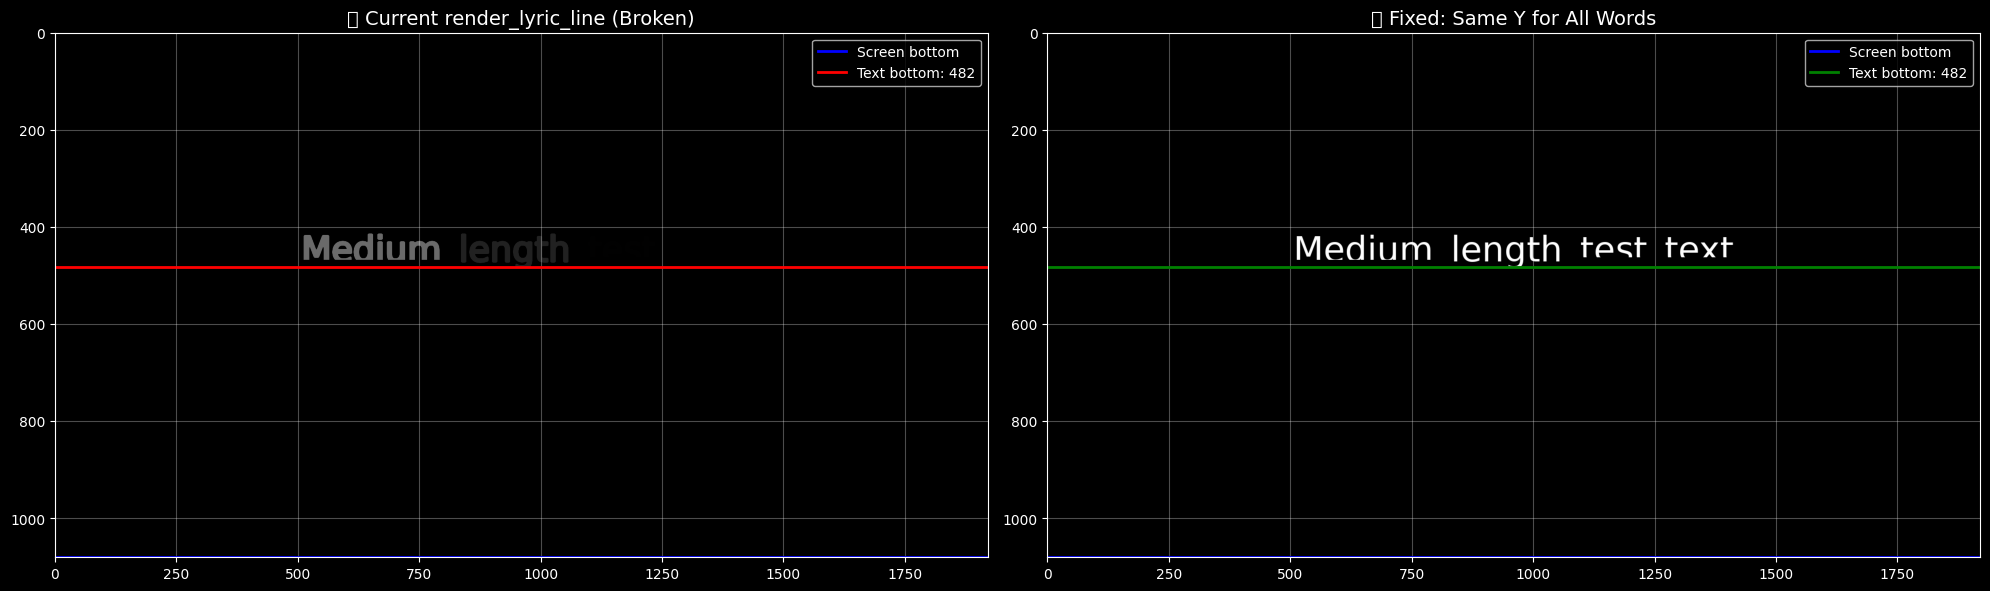


💡 WHAT TO LOOK FOR:
   - Left plot: Words at different heights (broken)
   - Right plot: All words at same horizontal line (fixed)
   - Check if green line (text bottom) is safely above blue line (screen bottom)


: 

In [ ]:
  def properly_fixed_word_positioning():
      """Fix word positioning by using the SAME Y position for ALL words"""

      renderer = TextRenderer((1920, 1080))
      test_text = "Medium length test text"
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
      style = TextStyle(font_size=72, vertical_position="center")

      print("🔧 PROPERLY FIXED WORD POSITIONING")
      print("=" * 50)

      # Step 1: Render all words and get dimensions
      word_images = []
      total_width = 0
      max_height = 0

      for word in words:
          font = renderer.font_manager.get_font(style.font_family, style.font_size)
          word_surface = renderer.font_manager.render_text(word.text, font, style.color,
                                                          style.stroke_width, style.stroke_color)
          word_images.append(word_surface)

          h, w = word_surface.shape[:2]
          total_width += w + 20
          max_height = max(max_height, h)
          print(f"   Word '{word.text}': {w}x{h} pixels")

      total_width -= 20
      print(f"📏 Max height for positioning: {max_height}")

      # Step 2: Calculate ONE Y position based on max_height
      CANVAS_PADDING = 200
      canvas_height = 1080 + CANVAS_PADDING * 2
      canvas_width = 1920 + CANVAS_PADDING * 2
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      # Calculate Y position ONCE using max_height
      base_y_screen = renderer._calculate_vertical_position(max_height, style, 0.0, None)
      base_y_canvas = base_y_screen + CANVAS_PADDING

      # Calculate X position
      SAFE_LEFT_MARGIN = 50
      available_width = 1920 - SAFE_LEFT_MARGIN * 2

      if total_width <= available_width:
          start_x = (1920 - total_width) // 2 + CANVAS_PADDING
      else:
          start_x = SAFE_LEFT_MARGIN + CANVAS_PADDING

      print(f"🎯 Single Y position for ALL words:")
      print(f"   Base Y (screen): {base_y_screen}")
      print(f"   Base Y (canvas): {base_y_canvas}")
      print(f"   Start X: {start_x}")

      # Step 3: Place ALL words at the SAME Y position
      current_x = start_x

      for i, word_img in enumerate(word_images):
          h, w = word_img.shape[:2]

          # 🔑 KEY FIX: ALL words use the exact same Y position
          word_y = base_y_canvas

          print(f"   Word {i} '{words[i].text}': placing at ({current_x},{word_y}), size=({w},{h})")

          # Check bounds
          if (word_y + h <= canvas_height and
              current_x + w <= canvas_width and
              word_y >= 0 and current_x >= 0):

              # Place word at exact same Y as all other words
              canvas[word_y:word_y + h, current_x:current_x + w] = word_img
              print(f"     ✅ Placed at consistent Y position")
          else:
              print(f"     ❌ Would be clipped!")

          current_x += w + 20

      # Step 4: Crop and return
      final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                           CANVAS_PADDING:CANVAS_PADDING + 1920]

      alpha_channel = final_canvas[:, :, 3]
      rows_with_text = np.where(alpha_channel.any(axis=1))[0]

      if len(rows_with_text) > 0:
          fixed_top = rows_with_text[0]
          fixed_bottom = rows_with_text[-1]
          fixed_margin = 1080 - fixed_bottom

          print(f"\n📊 PROPERLY FIXED RESULT:")
          print(f"   Text bounds: {fixed_top} to {fixed_bottom}")
          print(f"   Bottom margin: {fixed_margin}px")

      return final_canvas

  # Run the fixed version
  properly_fixed_result = properly_fixed_word_positioning()

  # Compare with broken version
  print(f"\n🔍 COMPARISON:")
  try:
      renderer = TextRenderer((1920, 1080))
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate("Medium length test text".split())]
      style = TextStyle(font_size=72, vertical_position="center")

      broken_result = renderer.render_lyric_line(
          words=words,
          current_time=0.5,
          style=style,
          animation_config=renderer.animation_presets['subtle'],
          line_start=0.0,
          line_end=len(words) * 0.5
      )

      broken_alpha = broken_result[:, :, 3]
      broken_rows = np.where(broken_alpha.any(axis=1))[0]
      if len(broken_rows) > 0:
          broken_bottom = broken_rows[-1]
          broken_margin = 1080 - broken_bottom
          print(f"   Broken version: bottom={broken_bottom}, margin={broken_margin}px")

  except Exception as e:
      print(f"   Broken version failed: {e}")
      broken_result = np.zeros((1080, 1920, 4), dtype=np.uint8)

  # CREATE THE PLOT
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  # Left: Current broken version
  ax1.set_title("❌ Current render_lyric_line (Broken)", fontsize=14)
  ax1.imshow(broken_result, extent=[0, 1920, 1080, 0])
  ax1.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
  if 'broken_bottom' in locals():
      ax1.axhline(y=broken_bottom, color='red', linewidth=2, label=f'Text bottom: {broken_bottom}')
  ax1.legend()
  ax1.grid(True, alpha=0.3)

  # Right: Our fixed version
  ax2.set_title("✅ Fixed: Same Y for All Words", fontsize=14)
  ax2.imshow(properly_fixed_result, extent=[0, 1920, 1080, 0])
  ax2.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')

  fixed_alpha = properly_fixed_result[:, :, 3]
  fixed_rows = np.where(fixed_alpha.any(axis=1))[0]
  if len(fixed_rows) > 0:
      fixed_bottom = fixed_rows[-1]
      ax2.axhline(y=fixed_bottom, color='green', linewidth=2, label=f'Text bottom: {fixed_bottom}')
  ax2.legend()
  ax2.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

  print(f"\n💡 WHAT TO LOOK FOR:")
  print(f"   - Left plot: Words at different heights (broken)")
  print(f"   - Right plot: All words at same horizontal line (fixed)")
  print(f"   - Check if green line (text bottom) is safely above blue line (screen bottom)")

🔍 DEBUGGING PARTIAL WORD RENDERING
   Word 'Medium': surface=304x72, actual_text=55h, top=17, bottom=71
   Word 'length': surface=246x86, actual_text=69h, top=17, bottom=85
   Word 'test': surface=154x67, actual_text=45h, top=22, bottom=66
   Word 'text': surface=158x67, actual_text=45h, top=22, bottom=66

🖼️ Canvas: 2320x1480
📏 Using larger safe margins: top=200, bottom=450
🎯 Y calculation:
   Safe zone height: 430
   Safe zone center: 415
   Base Y (screen): 372
   Base Y (canvas): 572
   Expected text bottom (screen): 458
   Expected text bottom (canvas): 658
   Start X: 699

📍 Placing word 0 'Medium':
   Word dimensions: 304x72
   Position: (699, 572)
   Word bounds: x=699 to 1003, y=572 to 644
   Canvas bounds: x=0 to 2320, y=0 to 1480
   X fits: True (need 699 + 304 <= 2320)
   Y fits: True (need 572 + 72 <= 1480)
   ✅ Word placed successfully
   ✅ Verified: word appears in canvas

📍 Placing word 1 'length':
   Word dimensions: 246x86
   Position: (1023, 572)
   Word bounds: x=10

/tmp/ipykernel_228870/2467552070.py:190: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


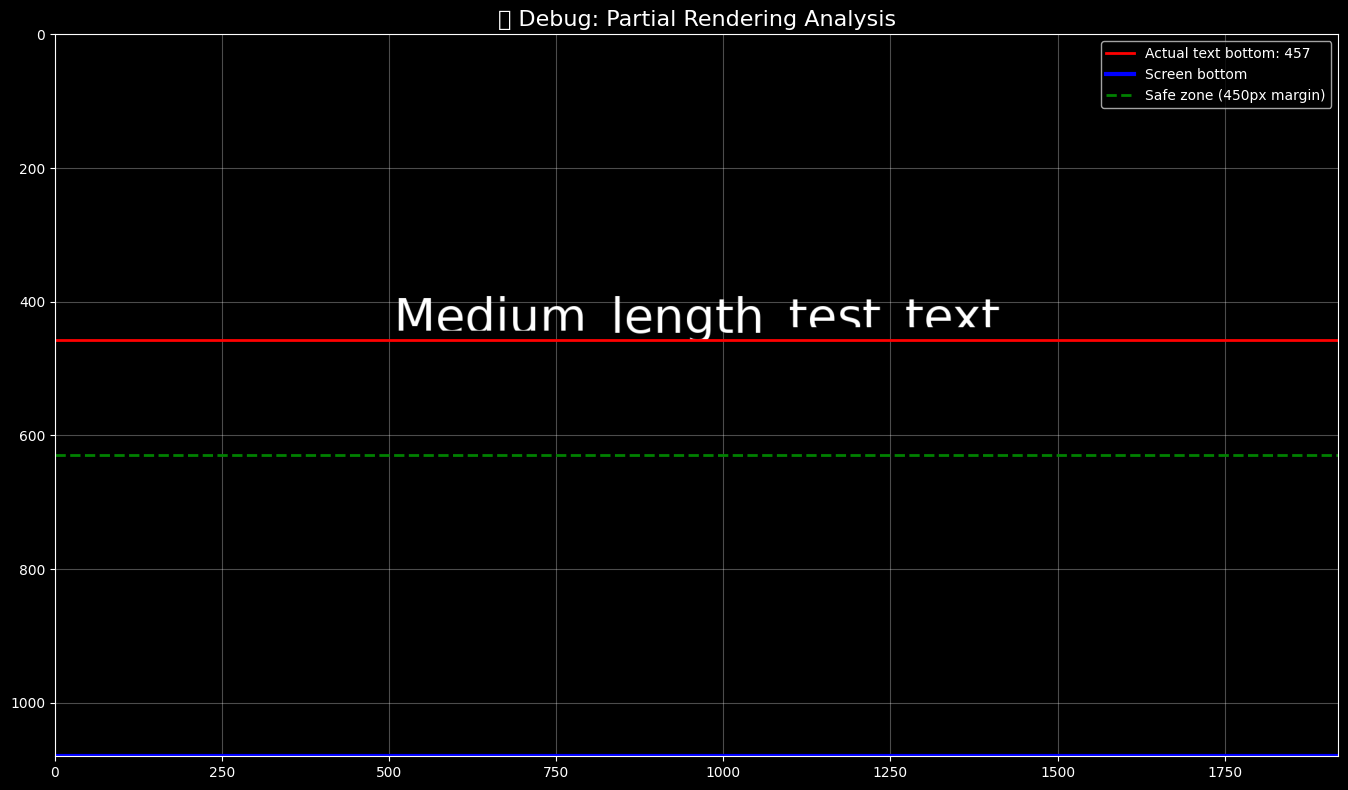


💡 SUMMARY:
   Words placed successfully: 4/4
   Look for:
   1. Are all words visible in the plot?
   2. Is the 'g' in 'length' safely above the green line?
   3. Are any words getting clipped during canvas placement?


: 

In [ ]:
  def debug_partial_rendering():
      """Debug why words are only partially rendering"""

      renderer = TextRenderer((1920, 1080))
      test_text = "Medium length test text"
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
      style = TextStyle(font_size=72, vertical_position="center")

      print("🔍 DEBUGGING PARTIAL WORD RENDERING")
      print("=" * 60)

      # Step 1: Render all words and get their exact dimensions
      word_images = []
      total_width = 0
      max_height = 0

      for i, word in enumerate(words):
          font = renderer.font_manager.get_font(style.font_family, style.font_size)
          word_surface = renderer.font_manager.render_text(word.text, font, style.color,
                                                          style.stroke_width, style.stroke_color)
          word_images.append(word_surface)

          h, w = word_surface.shape[:2]
          total_width += w + 20
          max_height = max(max_height, h)

          # Check each individual word for alpha content
          word_alpha = word_surface[:, :, 3]
          word_rows = np.where(word_alpha.any(axis=1))[0]
          word_cols = np.where(word_alpha.any(axis=0))[0]

          if len(word_rows) > 0 and len(word_cols) > 0:
              word_actual_top = word_rows[0]
              word_actual_bottom = word_rows[-1]
              word_actual_height = word_actual_bottom - word_actual_top + 1
              print(f"   Word '{word.text}': surface={w}x{h}, actual_text={word_actual_height}h, top={word_actual_top}, bottom={word_actual_bottom}")
          else:
              print(f"   Word '{word.text}': surface={w}x{h}, NO TEXT FOUND!")

      total_width -= 20

      # Step 2: Create canvas with better margins
      CANVAS_PADDING = 200
      canvas_height = 1080 + CANVAS_PADDING * 2
      canvas_width = 1920 + CANVAS_PADDING * 2
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      print(f"\n🖼️ Canvas: {canvas_width}x{canvas_height}")

      # Step 3: Calculate Y with LARGER safe margins
      # Let's use much larger margins to see if that fixes the "g" cutoff
      SAFE_TOP_MARGIN = 200  # Increased from 150
      SAFE_BOTTOM_MARGIN = 450  # Increased from 350

      print(f"📏 Using larger safe margins: top={SAFE_TOP_MARGIN}, bottom={SAFE_BOTTOM_MARGIN}")

      # Calculate available safe zone
      safe_zone_height = 1080 - SAFE_TOP_MARGIN - SAFE_BOTTOM_MARGIN
      safe_zone_center = SAFE_TOP_MARGIN + (safe_zone_height // 2)
      base_y_screen = safe_zone_center - (max_height // 2)

      # Apply safety clamps
      absolute_min_y = SAFE_TOP_MARGIN
      absolute_max_y = 1080 - SAFE_BOTTOM_MARGIN - max_height
      base_y_screen = max(absolute_min_y, min(absolute_max_y, base_y_screen))

      base_y_canvas = base_y_screen + CANVAS_PADDING

      print(f"🎯 Y calculation:")
      print(f"   Safe zone height: {safe_zone_height}")
      print(f"   Safe zone center: {safe_zone_center}")
      print(f"   Base Y (screen): {base_y_screen}")
      print(f"   Base Y (canvas): {base_y_canvas}")
      print(f"   Expected text bottom (screen): {base_y_screen + max_height}")
      print(f"   Expected text bottom (canvas): {base_y_canvas + max_height}")

      # Step 4: Calculate X position
      SAFE_LEFT_MARGIN = 50
      available_width = 1920 - SAFE_LEFT_MARGIN * 2

      if total_width <= available_width:
          start_x = (1920 - total_width) // 2 + CANVAS_PADDING
      else:
          start_x = SAFE_LEFT_MARGIN + CANVAS_PADDING

      print(f"   Start X: {start_x}")

      # Step 5: Place words with DETAILED bounds checking
      current_x = start_x
      placed_words = []

      for i, word_img in enumerate(word_images):
          h, w = word_img.shape[:2]
          word_y = base_y_canvas

          print(f"\n📍 Placing word {i} '{words[i].text}':")
          print(f"   Word dimensions: {w}x{h}")
          print(f"   Position: ({current_x}, {word_y})")
          print(f"   Word bounds: x={current_x} to {current_x+w}, y={word_y} to {word_y+h}")
          print(f"   Canvas bounds: x=0 to {canvas_width}, y=0 to {canvas_height}")

          # Detailed bounds checking
          x_fits = (current_x >= 0 and current_x + w <= canvas_width)
          y_fits = (word_y >= 0 and word_y + h <= canvas_height)

          print(f"   X fits: {x_fits} (need {current_x} + {w} <= {canvas_width})")
          print(f"   Y fits: {y_fits} (need {word_y} + {h} <= {canvas_height})")

          if x_fits and y_fits:
              # Place the word
              canvas[word_y:word_y + h, current_x:current_x + w] = word_img
              placed_words.append(True)
              print(f"   ✅ Word placed successfully")

              # Verify it was actually placed
              placed_alpha = canvas[word_y:word_y + h, current_x:current_x + w, 3]
              if placed_alpha.any():
                  print(f"   ✅ Verified: word appears in canvas")
              else:
                  print(f"   ❌ ERROR: word not visible after placement!")
          else:
              placed_words.append(False)
              print(f"   ❌ Word CLIPPED - bounds exceeded")

              if not x_fits:
                  print(f"      X overflow: {current_x + w - canvas_width}px")
              if not y_fits:
                  print(f"      Y overflow: {word_y + h - canvas_height}px")

          current_x += w + 20

      # Step 6: Crop and analyze
      final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                           CANVAS_PADDING:CANVAS_PADDING + 1920]

      # Check each word in final result
      print(f"\n📊 FINAL ANALYSIS:")
      alpha_channel = final_canvas[:, :, 3]
      rows_with_text = np.where(alpha_channel.any(axis=1))[0]

      if len(rows_with_text) > 0:
          final_top = rows_with_text[0]
          final_bottom = rows_with_text[-1]
          final_margin = 1080 - final_bottom

          print(f"   Final text bounds: {final_top} to {final_bottom}")
          print(f"   Final bottom margin: {final_margin}px")
          print(f"   Safe margin goal was: {SAFE_BOTTOM_MARGIN}px")

          if final_margin >= SAFE_BOTTOM_MARGIN - 50:  # Within 50px of goal
              print(f"   ✅ Safe margin achieved!")
          else:
              print(f"   ⚠️ Safe margin not achieved, need bigger margins")

      # Check word visibility in final result
      words_visible = []
      test_positions = [(400, final_top if len(rows_with_text) > 0 else 400),  # Medium
                       (600, final_top if len(rows_with_text) > 0 else 400),  # length
                       (800, final_top if len(rows_with_text) > 0 else 400),  # test
                       (1000, final_top if len(rows_with_text) > 0 else 400)] # text

      for i, (x, y) in enumerate(test_positions):
          if y < 1080 and x < 1920:
              pixel_alpha = alpha_channel[y, x] if y < alpha_channel.shape[0] and x < alpha_channel.shape[1] else 0
              words_visible.append(pixel_alpha > 0)
              print(f"   Word {i} visible: {pixel_alpha > 0} (alpha={pixel_alpha} at {x},{y})")

      return final_canvas, placed_words

  # Run the debug
  debug_result, word_placement = debug_partial_rendering()

  # Plot the result
  fig, ax = plt.subplots(figsize=(15, 8))
  ax.set_title("🔍 Debug: Partial Rendering Analysis", fontsize=16)
  ax.imshow(debug_result, extent=[0, 1920, 1080, 0])

  # Add analysis lines
  alpha_channel = debug_result[:, :, 3]
  rows_with_text = np.where(alpha_channel.any(axis=1))[0]
  if len(rows_with_text) > 0:
      final_bottom = rows_with_text[-1]
      ax.axhline(y=final_bottom, color='red', linewidth=2, label=f'Actual text bottom: {final_bottom}')

  ax.axhline(y=1080, color='blue', linewidth=3, label='Screen bottom')
  ax.axhline(y=1080-450, color='green', linewidth=2, linestyle='--', label='Safe zone (450px margin)')

  ax.legend()
  ax.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

  print(f"\n💡 SUMMARY:")
  print(f"   Words placed successfully: {sum(word_placement)}/{len(word_placement)}")
  print(f"   Look for:")
  print(f"   1. Are all words visible in the plot?")
  print(f"   2. Is the 'g' in 'length' safely above the green line?")
  print(f"   3. Are any words getting clipped during canvas placement?")

🎛️ TEXT POSITIONING KNOBS & CONTROLS
🎛️ Available knobs to adjust:
   safe_top_margin: [100, 150, 200, 250]
   safe_bottom_margin: [300, 400, 500, 600]
   canvas_padding: [150, 200, 250, 300]
   font_size: [60, 72, 84, 96]
   vertical_position: ['top', 'center', 'bottom']
   word_spacing: [10, 20, 30, 40]
   y_offset: [-50, -25, 0, 25, 50]

🔬 SYSTEMATIC KNOB TESTING

--- Test 1: {'safe_top': 150, 'safe_bottom': 350, 'canvas_padding': 200, 'y_offset': 0} ---

🧪 Testing knobs: top=150, bottom=350, padding=200
    font=72, pos=center, spacing=20, offset=0
    Result: 4/4 words, bottom=482, margin=598px, score=200

--- Test 2: {'safe_top': 150, 'safe_bottom': 350, 'canvas_padding': 200, 'y_offset': -30} ---

🧪 Testing knobs: top=150, bottom=350, padding=200
    font=72, pos=center, spacing=20, offset=-30
    Result: 4/4 words, bottom=452, margin=628px, score=200

--- Test 3: {'safe_top': 150, 'safe_bottom': 500, 'canvas_padding': 200, 'y_offset': 0} ---

🧪 Testing knobs: top=150, bottom=50

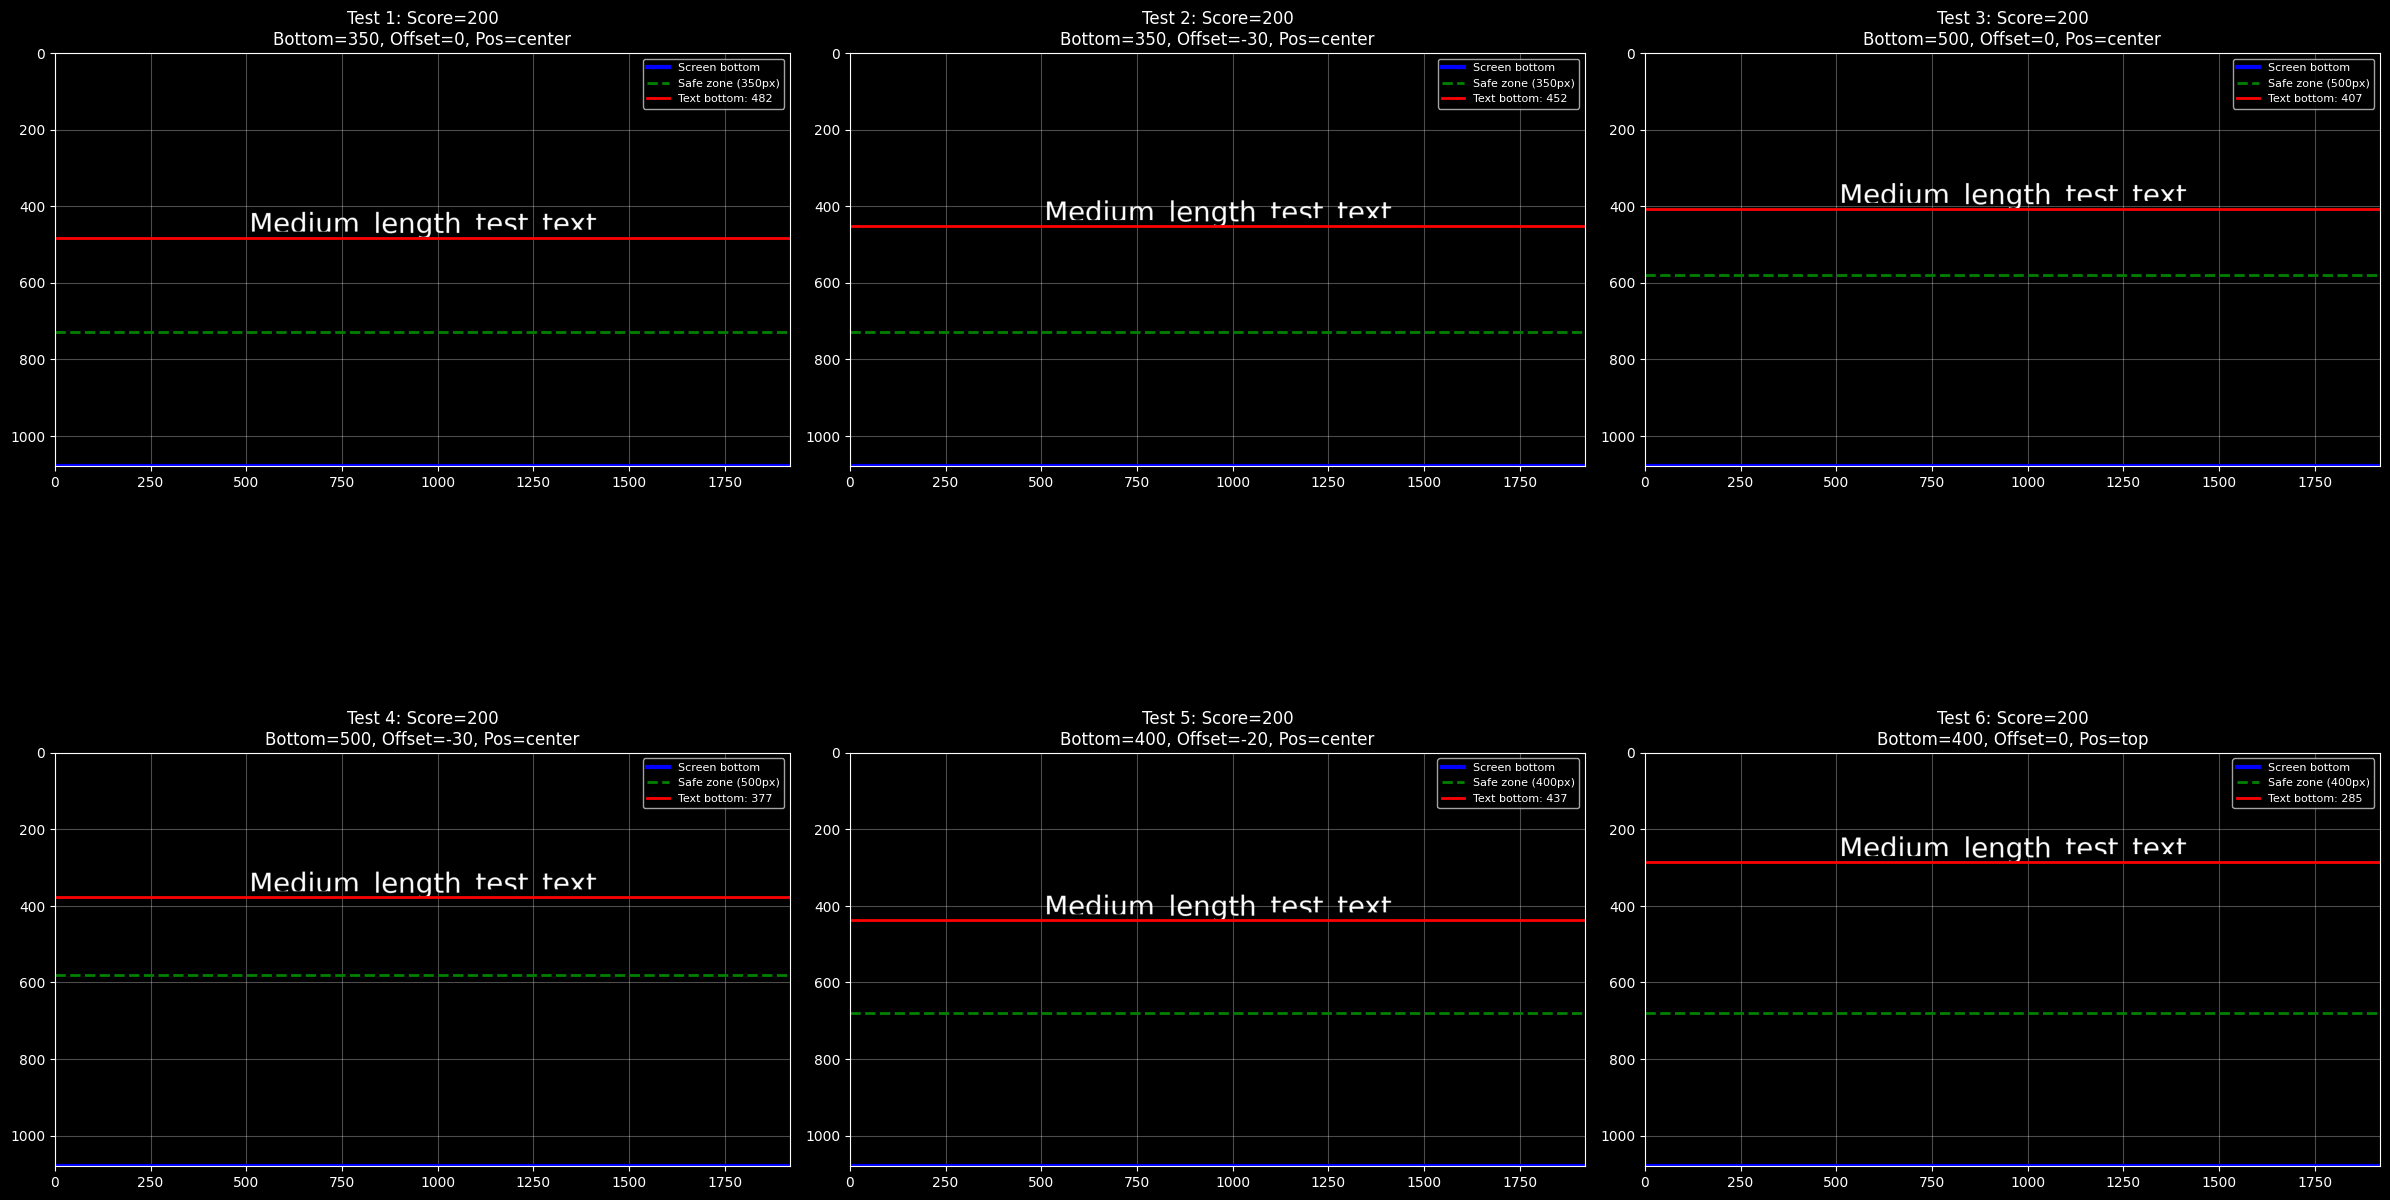


🏆 BEST RESULT:
   Score: 200
   Settings: {'safe_top': 150, 'safe_bottom': 350, 'canvas_padding': 200, 'font_size': 72, 'vertical_pos': 'center', 'word_spacing': 20, 'y_offset': 0}
   Text bottom: 482
   Bottom margin: 598px
   Words placed: 4/4

🎯 KNOB RECOMMENDATIONS:
   ✅ Found good settings! Use the best result above.


: 

In [ ]:
  def create_knob_testing_system():
      """Create a system to test different parameter combinations"""

      print("🎛️ TEXT POSITIONING KNOBS & CONTROLS")
      print("=" * 60)

      # Define all our adjustable "knobs"
      knobs = {
          'safe_top_margin': [100, 150, 200, 250],
          'safe_bottom_margin': [300, 400, 500, 600],
          'canvas_padding': [150, 200, 250, 300],
          'font_size': [60, 72, 84, 96],
          'vertical_position': ['top', 'center', 'bottom'],
          'word_spacing': [10, 20, 30, 40],
          'y_offset': [-50, -25, 0, 25, 50],  # Manual Y adjustment
      }

      print("🎛️ Available knobs to adjust:")
      for knob, values in knobs.items():
          print(f"   {knob}: {values}")

      return knobs

  def test_knob_combination(safe_top=200, safe_bottom=500, canvas_padding=200,
                           font_size=72, vertical_pos='center', word_spacing=20, y_offset=0):
      """Test a specific combination of knob settings"""

      renderer = TextRenderer((1920, 1080))
      test_text = "Medium length test text"
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
      style = TextStyle(font_size=font_size, vertical_position=vertical_pos)

      print(f"\n🧪 Testing knobs: top={safe_top}, bottom={safe_bottom}, padding={canvas_padding}")
      print(f"    font={font_size}, pos={vertical_pos}, spacing={word_spacing}, offset={y_offset}")

      # Step 1: Render words
      word_images = []
      total_width = 0
      max_height = 0

      for word in words:
          font = renderer.font_manager.get_font(style.font_family, style.font_size)
          word_surface = renderer.font_manager.render_text(word.text, font, style.color,
                                                          style.stroke_width, style.stroke_color)
          word_images.append(word_surface)

          h, w = word_surface.shape[:2]
          total_width += w + word_spacing
          max_height = max(max_height, h)

      total_width -= word_spacing

      # Step 2: Create canvas with adjustable padding
      canvas_height = 1080 + canvas_padding * 2
      canvas_width = 1920 + canvas_padding * 2
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      # Step 3: Calculate Y with adjustable margins
      safe_zone_height = 1080 - safe_top - safe_bottom

      if vertical_pos == 'top':
          base_y_screen = safe_top
      elif vertical_pos == 'bottom':
          base_y_screen = 1080 - safe_bottom - max_height
      else:  # center
          safe_zone_center = safe_top + (safe_zone_height // 2)
          base_y_screen = safe_zone_center - (max_height // 2)

      # Apply manual Y offset
      base_y_screen += y_offset

      # Safety clamp
      absolute_min_y = safe_top
      absolute_max_y = 1080 - safe_bottom - max_height
      base_y_screen = max(absolute_min_y, min(absolute_max_y, base_y_screen))

      base_y_canvas = base_y_screen + canvas_padding

      # Step 4: Calculate X
      start_x = (1920 - total_width) // 2 + canvas_padding

      # Step 5: Place words
      current_x = start_x
      placement_success = []

      for i, word_img in enumerate(word_images):
          h, w = word_img.shape[:2]
          word_y = base_y_canvas

          # Check bounds
          if (word_y + h <= canvas_height and current_x + w <= canvas_width and
              word_y >= 0 and current_x >= 0):
              canvas[word_y:word_y + h, current_x:current_x + w] = word_img
              placement_success.append(True)
          else:
              placement_success.append(False)

          current_x += w + word_spacing

      # Step 6: Crop and analyze
      final_canvas = canvas[canvas_padding:canvas_padding + 1080,
                           canvas_padding:canvas_padding + 1920]

      alpha_channel = final_canvas[:, :, 3]
      rows_with_text = np.where(alpha_channel.any(axis=1))[0]

      result = {
          'canvas': final_canvas,
          'placement_success': placement_success,
          'settings': {
              'safe_top': safe_top, 'safe_bottom': safe_bottom,
              'canvas_padding': canvas_padding, 'font_size': font_size,
              'vertical_pos': vertical_pos, 'word_spacing': word_spacing,
              'y_offset': y_offset
          }
      }

      if len(rows_with_text) > 0:
          final_top = rows_with_text[0]
          final_bottom = rows_with_text[-1]
          final_margin = 1080 - final_bottom

          result['bounds'] = {
              'top': final_top, 'bottom': final_bottom, 'margin': final_margin
          }

          # Quality scoring
          words_placed = sum(placement_success)
          margin_score = min(100, final_margin * 2)  # Better score for more margin
          cutoff_penalty = -200 if final_bottom >= 1075 else 0

          result['score'] = words_placed * 25 + margin_score + cutoff_penalty

          print(f"    Result: {words_placed}/{len(placement_success)} words, bottom={final_bottom}, margin={final_margin}px, score={result['score']}")
      else:
          result['bounds'] = {'top': 0, 'bottom': 0, 'margin': 0}
          result['score'] = -1000
          print(f"    Result: NO TEXT VISIBLE")

      return result

  # Create the knob testing system
  knobs = create_knob_testing_system()

  # Test multiple combinations to find the best settings
  print(f"\n🔬 SYSTEMATIC KNOB TESTING")
  print("=" * 60)

  test_combinations = [
      # Test 1: Baseline (our current problematic settings)
      {'safe_top': 150, 'safe_bottom': 350, 'canvas_padding': 200, 'y_offset': 0},

      # Test 2: Move text higher (negative Y offset)
      {'safe_top': 150, 'safe_bottom': 350, 'canvas_padding': 200, 'y_offset': -30},

      # Test 3: Bigger bottom margin
      {'safe_top': 150, 'safe_bottom': 500, 'canvas_padding': 200, 'y_offset': 0},

      # Test 4: Bigger bottom margin + move higher
      {'safe_top': 150, 'safe_bottom': 500, 'canvas_padding': 200, 'y_offset': -30},

      # Test 5: Less canvas padding (might help with bounds)
      {'safe_top': 150, 'safe_bottom': 400, 'canvas_padding': 150, 'y_offset': -20},

      # Test 6: Top positioning instead of center
      {'safe_top': 200, 'safe_bottom': 400, 'canvas_padding': 200, 'y_offset': 0, 'vertical_pos':
   'top'},
  ]

  results = []
  for i, combo in enumerate(test_combinations):
      print(f"\n--- Test {i+1}: {combo} ---")
      result = test_knob_combination(**combo)
      results.append(result)

  # Create visualization of all test results
  fig, axes = plt.subplots(2, 3, figsize=(24, 16))
  axes = axes.flatten()

  for i, result in enumerate(results):
      ax = axes[i]

      # Plot the result
      ax.imshow(result['canvas'], extent=[0, 1920, 1080, 0])

      # Add reference lines
      settings = result['settings']
      safe_bottom_line = 1080 - settings['safe_bottom']

      ax.axhline(y=1080, color='blue', linewidth=3, label='Screen bottom')
      ax.axhline(y=safe_bottom_line, color='green', linewidth=2, linestyle='--',
                 label=f'Safe zone ({settings["safe_bottom"]}px)')

      if 'bounds' in result and result['bounds']['bottom'] > 0:
          ax.axhline(y=result['bounds']['bottom'], color='red', linewidth=2,
                     label=f'Text bottom: {result["bounds"]["bottom"]}')

      # Title with key settings and score
      title = f"Test {i+1}: Score={result['score']}\n"
      title += f"Bottom={settings['safe_bottom']}, Offset={settings.get('y_offset', 0)}"
      if 'vertical_pos' in settings:
          title += f", Pos={settings['vertical_pos']}"

      ax.set_title(title, fontsize=12)
      ax.legend(fontsize=8)
      ax.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

  # Find the best result
  best_result = max(results, key=lambda x: x['score'])
  print(f"\n🏆 BEST RESULT:")
  print(f"   Score: {best_result['score']}")
  print(f"   Settings: {best_result['settings']}")
  if 'bounds' in best_result:
      print(f"   Text bottom: {best_result['bounds']['bottom']}")
      print(f"   Bottom margin: {best_result['bounds']['margin']}px")
  print(f"   Words placed: {sum(best_result['placement_success'])}/{len(best_result['placement_success'])}")

  print(f"\n🎯 KNOB RECOMMENDATIONS:")
  if best_result['score'] > 0:
      print(f"   ✅ Found good settings! Use the best result above.")
  else:
      print(f"   ❌ No good settings found. Try:")
      print(f"      - Even bigger safe_bottom_margin (600+)")
      print(f"      - More negative y_offset (-50 or more)")
      print(f"      - Smaller font_size")
      print(f"      - Different vertical_position")

🔬 MICROSCOPIC WORD RENDERING DEBUG
🎯 Step 1: Individual word rendering analysis

--- Word 0: 'Medium' ---
   Raw word surface shape: (72, 304, 4)
   Raw word surface: 304w x 72h
   Actual content: 282w x 55h at (12,17) to (293,71)
   Content padding: top=17, bottom=0, left=12, right=10

--- Word 1: 'length' ---
   Raw word surface shape: (86, 246, 4)
   Raw word surface: 246w x 86h
   Actual content: 224w x 69h at (11,17) to (234,85)
   Content padding: top=17, bottom=0, left=11, right=11
   ⚠️ Word has descenders: ['g']

--- Word 2: 'test' ---
   Raw word surface shape: (67, 154, 4)
   Raw word surface: 154w x 67h
   Actual content: 142w x 45h at (6,22) to (147,66)
   Content padding: top=22, bottom=0, left=6, right=6

--- Word 3: 'text' ---
   Raw word surface shape: (67, 158, 4)
   Raw word surface: 158w x 67h
   Actual content: 146w x 45h at (6,22) to (151,66)
   Content padding: top=22, bottom=0, left=6, right=6

🎯 Step 2: Position calculation analysis
   Max height for positionin

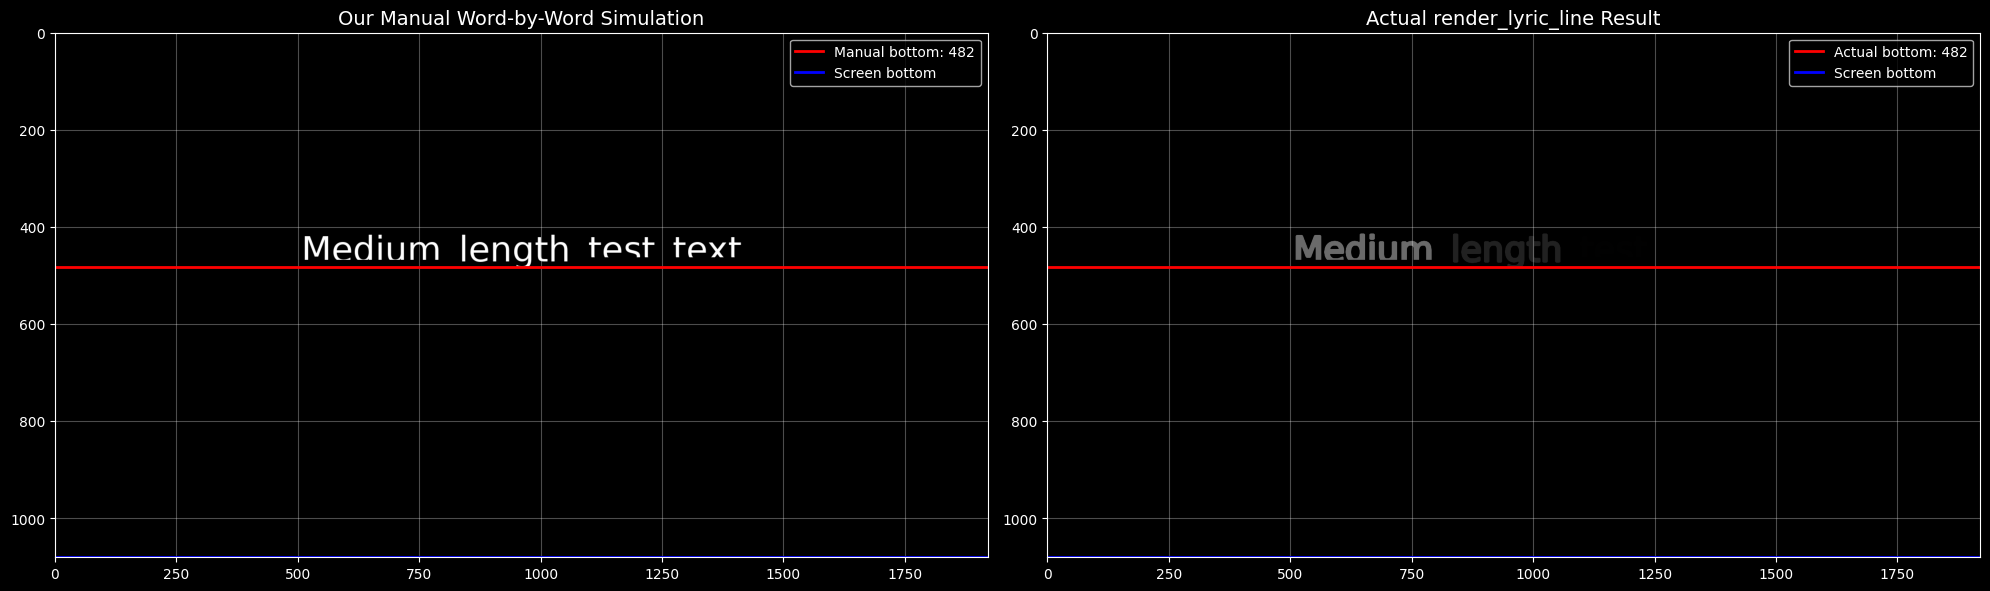


🎯 MICROSCOPIC FINDINGS:
   Placement results: ['success', 'success', 'success', 'success']
   Words with descenders: ['length']
   Word 0 'Medium': surface=(304, 72), actual=(np.int64(282), np.int64(55))
   Word 1 'length': surface=(246, 86), actual=(np.int64(224), np.int64(69))
   Word 2 'test': surface=(154, 67), actual=(np.int64(142), np.int64(45))
   Word 3 'text': surface=(158, 67), actual=(np.int64(146), np.int64(45))


: 

In [ ]:
  def debug_individual_word_rendering():
      """Debug the exact word-by-word rendering process"""

      print("🔬 MICROSCOPIC WORD RENDERING DEBUG")
      print("=" * 60)

      renderer = TextRenderer((1920, 1080))
      test_text = "Medium length test text"
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
      style = TextStyle(font_size=72, vertical_position="center")

      # Let's manually step through what render_lyric_line does word by word
      print("🎯 Step 1: Individual word rendering analysis")

      word_data = []
      for i, word in enumerate(words):
          print(f"\n--- Word {i}: '{word.text}' ---")

          # Get the font (exactly like render_lyric_line does)
          font = renderer.font_manager.get_font(style.font_family, style.font_size)

          # Render this specific word (exactly like render_lyric_line does)
          word_surface = renderer.font_manager.render_text(
              word.text, font, style.color, style.stroke_width, style.stroke_color
          )

          # FIX: Check actual dimensions properly
          print(f"   Raw word surface shape: {word_surface.shape}")
          h, w = word_surface.shape[:2]  # height, width
          print(f"   Raw word surface: {w}w x {h}h")

          # Check word's actual content bounds
          word_alpha = word_surface[:, :, 3]
          word_rows = np.where(word_alpha.any(axis=1))[0]
          word_cols = np.where(word_alpha.any(axis=0))[0]

          if len(word_rows) > 0 and len(word_cols) > 0:
              actual_top = word_rows[0]
              actual_bottom = word_rows[-1]
              actual_left = word_cols[0]
              actual_right = word_cols[-1]
              actual_h = actual_bottom - actual_top + 1
              actual_w = actual_right - actual_left + 1

              print(f"   Actual content: {actual_w}w x {actual_h}h at ({actual_left},{actual_top}) to ({actual_right},{actual_bottom})")
              print(f"   Content padding: top={actual_top}, bottom={h-actual_bottom-1}, left={actual_left}, right={w-actual_right-1}")

              # Check if word has descenders (like 'g', 'j', 'p', 'q', 'y')
              has_descenders = any(char in word.text.lower() for char in 'gjpqy')
              if has_descenders:
                  print(f"   ⚠️ Word has descenders: {[c for c in word.text.lower() if c in 'gjpqy']}")
          else:
              print(f"   ❌ NO CONTENT FOUND in word surface!")
              actual_top = actual_bottom = actual_left = actual_right = 0
              actual_h = actual_w = 0
              has_descenders = False

          word_data.append({
              'text': word.text,
              'surface': word_surface,
              'surface_size': (w, h),  # width, height
              'actual_bounds': (actual_left, actual_top, actual_right, actual_bottom),
              'actual_size': (actual_w, actual_h),
              'has_descenders': has_descenders
          })

      # Step 2: Now let's see how render_lyric_line positions these words
      print(f"\n🎯 Step 2: Position calculation analysis")

      # Get dimensions for positioning (like render_lyric_line does)
      max_height = max(data['surface_size'][1] for data in word_data)  # max height
      total_width = sum(data['surface_size'][0] for data in word_data) + 20 * (len(word_data) - 1)  # sum widths

      print(f"   Max height for positioning: {max_height}")
      print(f"   Total width: {total_width}")

      # Calculate the Y position (like render_lyric_line does)
      base_y = renderer._calculate_vertical_position(max_height, style, 0.0, None)
      print(f"   Calculated base Y: {base_y}")

      # Step 3: Let's manually trace the canvas positioning
      CANVAS_PADDING = 200
      canvas_height = 1080 + CANVAS_PADDING * 2
      canvas_width = 1920 + CANVAS_PADDING * 2
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      canvas_y = base_y + CANVAS_PADDING
      start_x = (1920 - total_width) // 2 + CANVAS_PADDING

      print(f"   Canvas Y: {canvas_y}")
      print(f"   Start X: {start_x}")
      print(f"   Canvas dimensions: {canvas_width}w x {canvas_height}h")

      # Step 4: Place each word and track what happens
      current_x = start_x
      placement_results = []

      for i, data in enumerate(word_data):
          word_img = data['surface']
          w, h = data['surface_size']  # width, height

          print(f"\n--- Placing word {i}: '{data['text']}' ---")
          print(f"   Word surface shape: {word_img.shape}")
          print(f"   Surface size: {w}w x {h}h")
          print(f"   Canvas position: ({current_x}, {canvas_y})")
          print(f"   Canvas bounds check: x={current_x} to {current_x+w} (max {canvas_width})")
          print(f"   Canvas bounds check: y={canvas_y} to {canvas_y+h} (max {canvas_height})")

          # Check if word fits
          x_fits = (current_x >= 0 and current_x + w <= canvas_width)
          y_fits = (canvas_y >= 0 and canvas_y + h <= canvas_height)

          if x_fits and y_fits:
              # FIX: Make sure we're placing with correct dimensions
              # word_img is (height, width, channels), canvas slice is [y:y+h, x:x+w]
              try:
                  canvas[canvas_y:canvas_y + h, current_x:current_x + w] = word_img

                  # Verify placement by checking a sample pixel
                  center_x = current_x + w // 2
                  center_y = canvas_y + h // 2
                  placed_alpha = canvas[center_y, center_x, 3]

                  print(f"   ✅ Placed successfully, center pixel alpha: {placed_alpha}")
                  placement_results.append('success')

              except ValueError as e:
                  print(f"   ❌ PLACEMENT ERROR: {e}")
                  print(f"      Word shape: {word_img.shape}")
                  print(f"      Canvas slice shape would be: ({h}, {w}, 4)")
                  placement_results.append('shape_error')

          else:
              print(f"   ❌ CLIPPED! x_fits={x_fits}, y_fits={y_fits}")
              if not x_fits:
                  print(f"      X overflow: {current_x + w - canvas_width}px")
              if not y_fits:
                  print(f"      Y overflow: {canvas_y + h - canvas_height}px")
              placement_results.append('clipped')

          current_x += w + 20

      # Step 5: Crop and see what survived
      final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                           CANVAS_PADDING:CANVAS_PADDING + 1920]

      print(f"\n🎯 Step 5: Final result analysis")

      # Check final bounds
      final_alpha = final_canvas[:, :, 3]
      final_rows = np.where(final_alpha.any(axis=1))[0]

      if len(final_rows) > 0:
          final_top = final_rows[0]
          final_bottom = final_rows[-1]
          print(f"   Final text bounds: {final_top} to {final_bottom}")
          print(f"   Final bottom margin: {1080 - final_bottom}px")
      else:
          print(f"   ❌ NO TEXT in final result!")

      # Step 6: Compare with actual render_lyric_line
      print(f"\n🔍 Comparison with actual render_lyric_line:")

      try:
          actual_result = renderer.render_lyric_line(
              words=words,
              current_time=0.5,
              style=style,
              animation_config=renderer.animation_presets['subtle'],
              line_start=0.0,
              line_end=len(words) * 0.5
          )

          actual_alpha = actual_result[:, :, 3]
          actual_rows = np.where(actual_alpha.any(axis=1))[0]
          if len(actual_rows) > 0:
              actual_bottom = actual_rows[-1]
              print(f"   Actual render_lyric_line bottom: {actual_bottom}")

              if len(final_rows) > 0:
                  difference = abs(final_bottom - actual_bottom)
                  print(f"   Difference from our simulation: {difference}px")

                  if difference > 10:
                      print(f"   ❌ SIGNIFICANT DIFFERENCE! render_lyric_line does something different")
                  else:
                      print(f"   ✅ Close match, our simulation is accurate")

      except Exception as e:
          print(f"   ❌ render_lyric_line failed: {e}")
          actual_result = np.zeros((1080, 1920, 4), dtype=np.uint8)

      return final_canvas, actual_result, word_data, placement_results

  # Run the microscopic debug
  manual_result, actual_result, word_details, placements = debug_individual_word_rendering()

  # Create visualization
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  # Left: Our manual simulation
  ax1.set_title("Our Manual Word-by-Word Simulation", fontsize=14)
  ax1.imshow(manual_result, extent=[0, 1920, 1080, 0])
  manual_alpha = manual_result[:, :, 3]
  manual_rows = np.where(manual_alpha.any(axis=1))[0]
  if len(manual_rows) > 0:
      ax1.axhline(y=manual_rows[-1], color='red', linewidth=2, label=f'Manual bottom: {manual_rows[-1]}')
  ax1.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
  ax1.legend()
  ax1.grid(True, alpha=0.3)

  # Right: Actual render_lyric_line
  ax2.set_title("Actual render_lyric_line Result", fontsize=14)
  ax2.imshow(actual_result, extent=[0, 1920, 1080, 0])
  actual_alpha = actual_result[:, :, 3]
  actual_rows = np.where(actual_alpha.any(axis=1))[0]
  if len(actual_rows) > 0:
      ax2.axhline(y=actual_rows[-1], color='red', linewidth=2, label=f'Actual bottom: {actual_rows[-1]}')
  ax2.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
  ax2.legend()
  ax2.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

  print(f"\n🎯 MICROSCOPIC FINDINGS:")
  print(f"   Placement results: {placements}")
  print(f"   Words with descenders: {[w['text'] for w in word_details if w.get('has_descenders', False)]}")
  for i, word in enumerate(word_details):
      print(f"   Word {i} '{word['text']}': surface={word['surface_size']}, actual={word['actual_size']}")

🚀 RUNNING COMPREHENSIVE VISUAL WALKTHROUGH...
This will show every step from input text to final display
🎬 COMPREHENSIVE VISUAL WALKTHROUGH
Following the complete journey: Lyrics → Words → Positioning → Canvas → Final Display

📝 STEP 1: INPUT LYRICS
Converting to LyricWord objects...

🎨 STEP 4: INDIVIDUAL WORD RENDERING
  Rendering word 'Medium'...
    Surface: 304×72, Content: 55h, Top: 17, Bottom: 71
  Rendering word 'length'...
    Surface: 246×86, Content: 69h, Top: 17, Bottom: 85
  Rendering word 'test'...
    Surface: 154×67, Content: 45h, Top: 22, Bottom: 66
  Rendering word 'text'...
    Surface: 158×67, Content: 45h, Top: 22, Bottom: 66

📏 STEP 5: DIMENSION CALCULATION

🎯 STEP 6: POSITION CALCULATION

🖼️ STEP 7: CANVAS CREATION & WORD PLACEMENT
  Placing 'Medium' at (699, 597)
  Placing 'length' at (1023, 597)
  Placing 'test' at (1289, 597)
  Placing 'text' at (1463, 597)

✂️ STEP 9: CROP TO FINAL SIZE
  Final text bounds: 414 to 482
  Bottom margin: 598px

🔍 STEP 10: COMPARE

/tmp/ipykernel_228870/3736352797.py:272: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


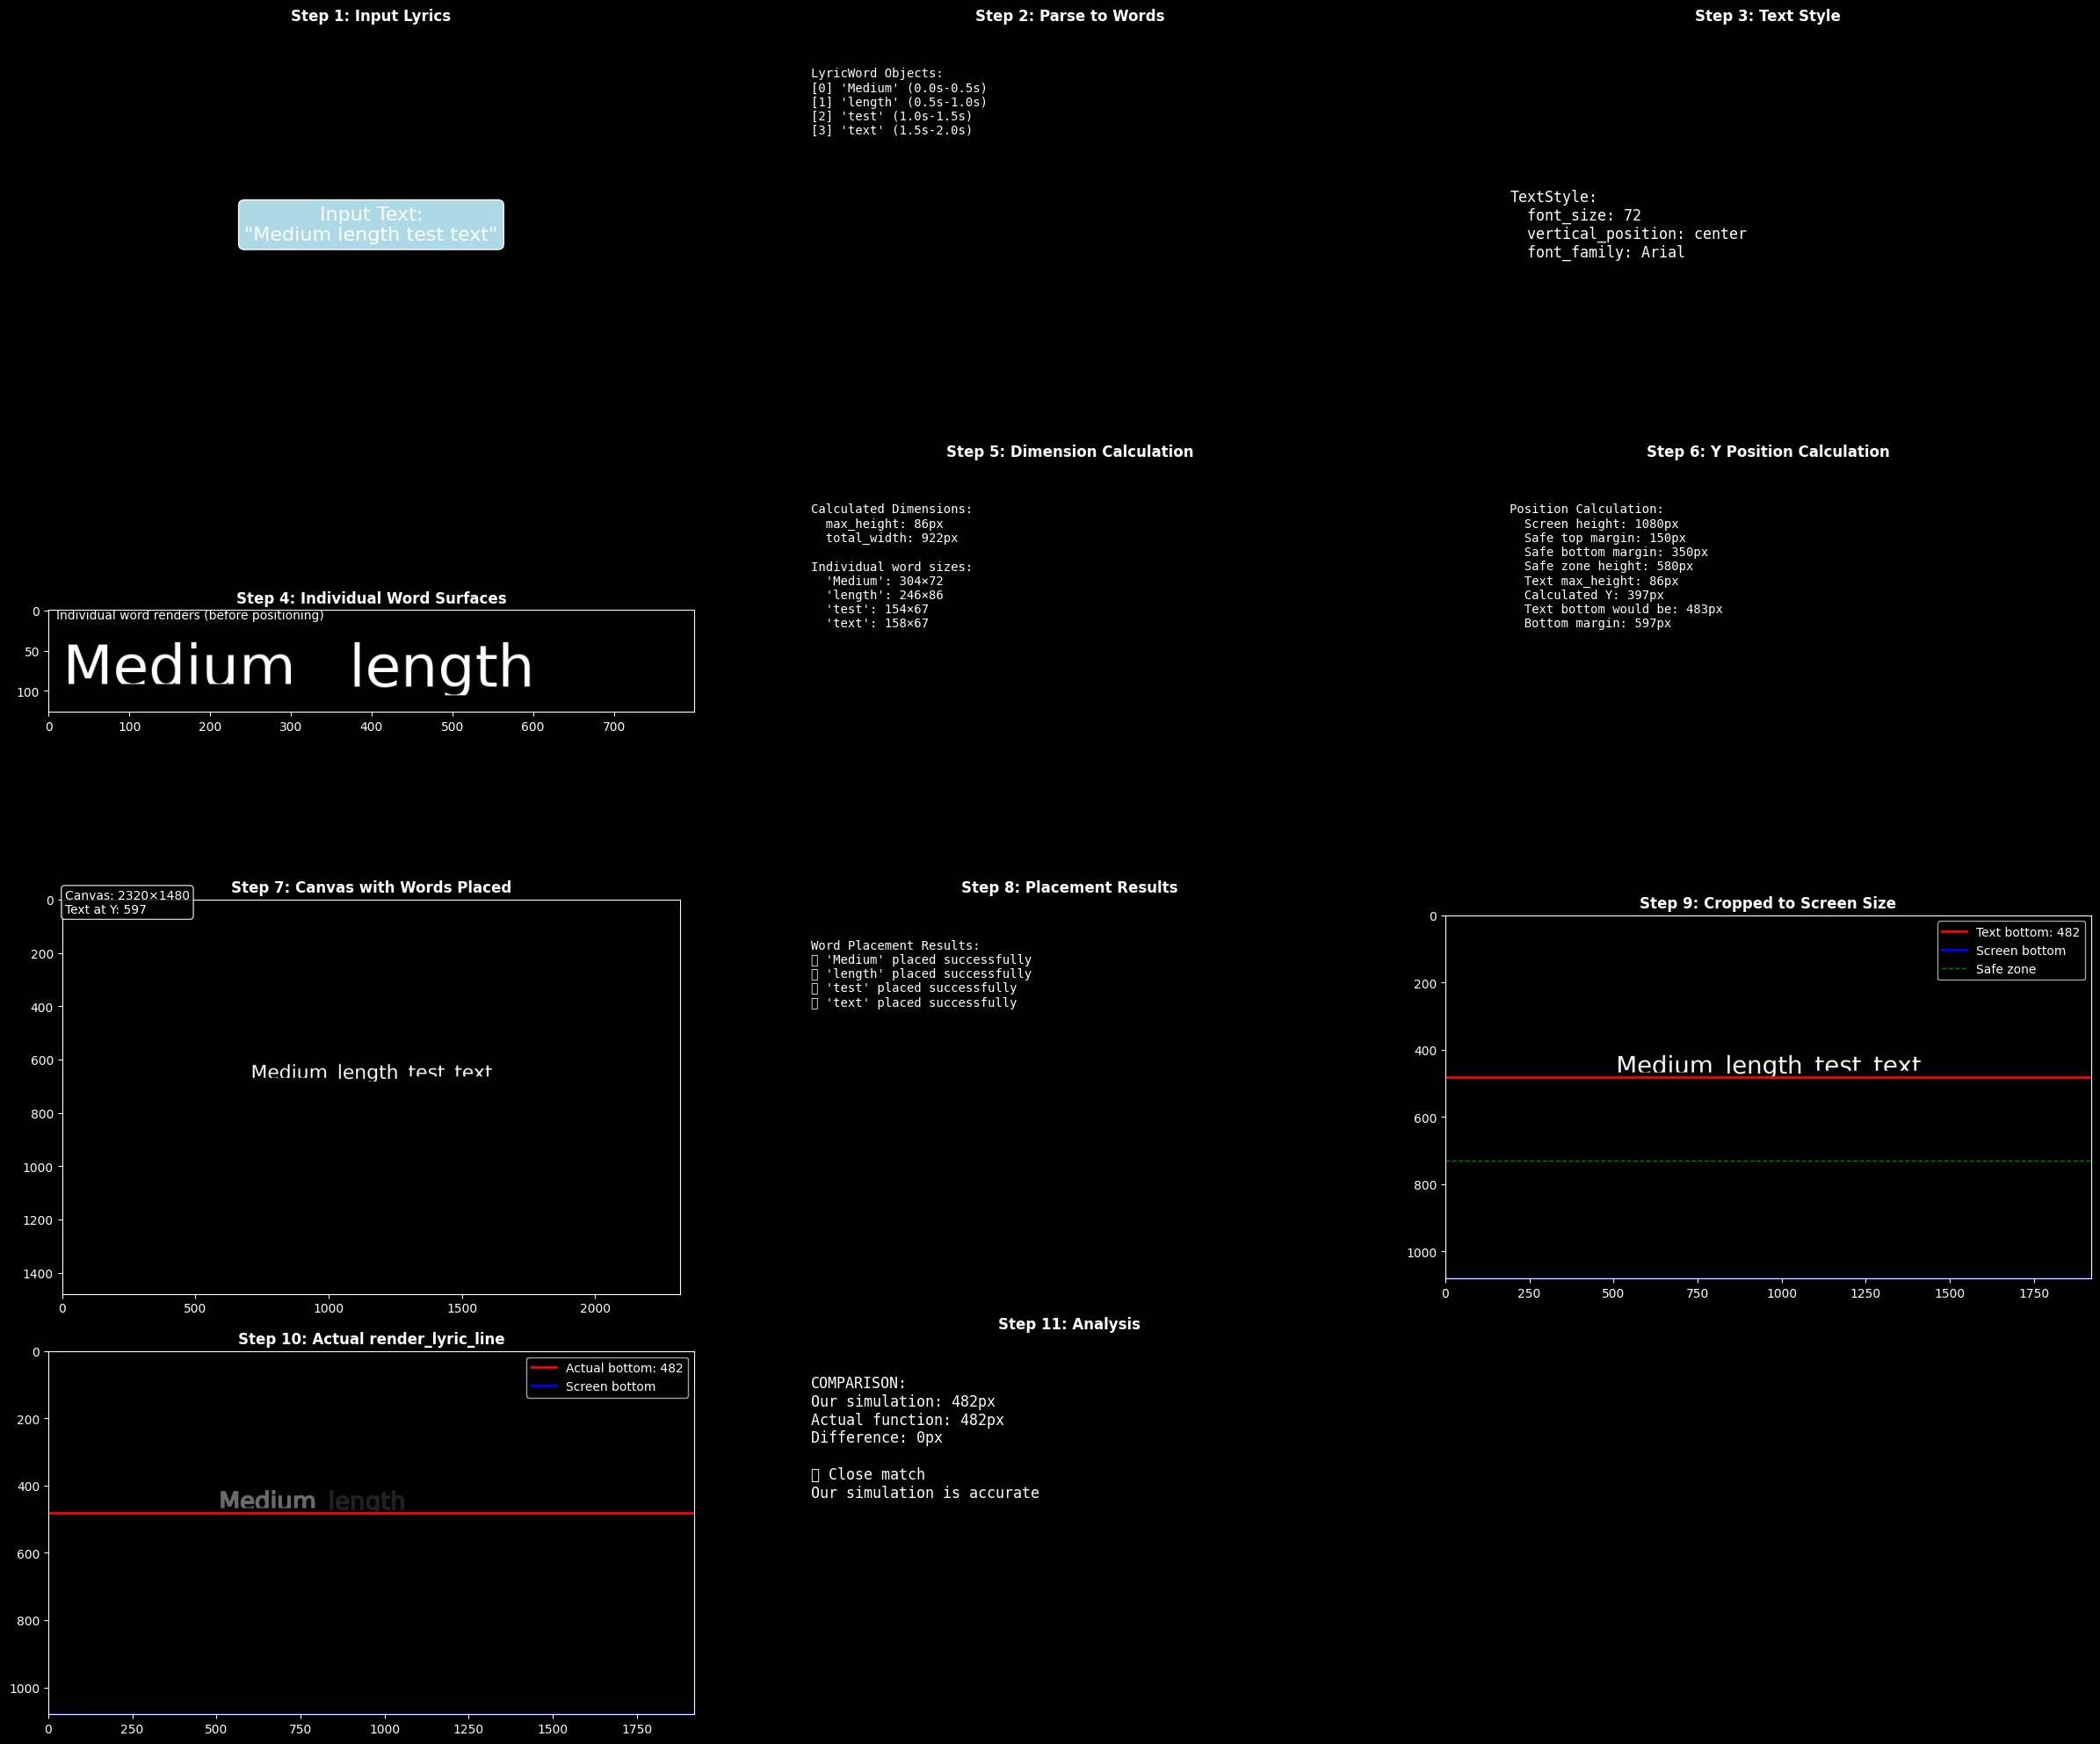


📊 SUMMARY OF FINDINGS:
Words processed: 4
Placement results: 4 successful, 0 failed

🔍 DETAILED WORD ANALYSIS:
  Word 0: 'Medium' - Surface: (304, 72), Content height: 55
  Word 1: 'length' - Surface: (246, 86), Content height: 69 (has descenders)
  Word 2: 'test' - Surface: (154, 67), Content height: 45
  Word 3: 'text' - Surface: (158, 67), Content height: 45

💡 WHAT TO LOOK FOR IN THE VISUALIZATION:
1. Step 4: Are individual word surfaces rendering correctly?
2. Step 7: Are words being placed at the right positions on canvas?
3. Step 9 vs Step 10: Does our simulation match the actual function?
4. Look for any steps where words disappear or get clipped


: 

In [ ]:
  def create_comprehensive_visual_walkthrough():
      """Create a step-by-step visual walkthrough of the entire rendering pipeline"""

      print("🎬 COMPREHENSIVE VISUAL WALKTHROUGH")
      print("=" * 70)
      print("Following the complete journey: Lyrics → Words → Positioning → Canvas → Final Display")

      # Setup
      renderer = TextRenderer((1920, 1080))
      test_text = "Medium length test text"

      # Create the figure for our walkthrough
      fig = plt.figure(figsize=(24, 20))

      # Step 1: Show the input
      print("\n📝 STEP 1: INPUT LYRICS")
      lyrics_ax = plt.subplot(4, 3, 1)
      lyrics_ax.text(0.5, 0.5, f'Input Text:\n"{test_text}"',
                     ha='center', va='center', fontsize=16,
                     bbox=dict(boxstyle="round", facecolor="lightblue"))
      lyrics_ax.set_title("Step 1: Input Lyrics", fontweight='bold')
      lyrics_ax.axis('off')

      # Step 2: Parse into words
      print("Converting to LyricWord objects...")
      words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]

      words_ax = plt.subplot(4, 3, 2)
      word_text = "LyricWord Objects:\n"
      for i, word in enumerate(words):
          word_text += f"[{i}] '{word.text}' ({word.start_time:.1f}s-{word.end_time:.1f}s)\n"
      words_ax.text(0.1, 0.9, word_text, ha='left', va='top', fontsize=10, fontfamily='monospace', transform=words_ax.transAxes)
      words_ax.set_title("Step 2: Parse to Words", fontweight='bold')
      words_ax.axis('off')

      # Step 3: Create style
      style = TextStyle(font_size=72, vertical_position="center")

      style_ax = plt.subplot(4, 3, 3)
      style_text = f"TextStyle:\n  font_size: {style.font_size}\n  vertical_position: {style.vertical_position}\n  font_family: {style.font_family}"
      style_ax.text(0.1, 0.5, style_text, ha='left', va='center', fontsize=12, fontfamily='monospace', transform=style_ax.transAxes)
      style_ax.set_title("Step 3: Text Style", fontweight='bold')
      style_ax.axis('off')

      # Step 4: Render individual words
      print("\n🎨 STEP 4: INDIVIDUAL WORD RENDERING")
      word_surfaces = []
      word_info = []

      for i, word in enumerate(words):
          print(f"  Rendering word '{word.text}'...")

          # Get font and render exactly like the real code does
          font = renderer.font_manager.get_font(style.font_family, style.font_size)
          word_surface = renderer.font_manager.render_text(
              word.text, font, style.color, style.stroke_width, style.stroke_color)

          word_surfaces.append(word_surface)
          h, w = word_surface.shape[:2]

          # Analyze content bounds
          word_alpha = word_surface[:, :, 3]
          word_rows = np.where(word_alpha.any(axis=1))[0]

          if len(word_rows) > 0:
              content_top = word_rows[0]
              content_bottom = word_rows[-1]
              content_height = content_bottom - content_top + 1
          else:
              content_top = content_bottom = content_height = 0

          word_info.append({
              'text': word.text,
              'surface_size': (w, h),
              'content_bounds': (content_top, content_bottom),
              'content_height': content_height,
              'has_descenders': any(c in word.text.lower() for c in 'gjpqy')
          })

          print(f"    Surface: {w}×{h}, Content: {content_height}h, Top: {content_top}, Bottom: {content_bottom}")

      # Show individual word renders
      words_render_ax = plt.subplot(4, 3, 4)
      words_render_ax.set_title("Step 4: Individual Word Surfaces", fontweight='bold')

      # Create a composite view of all word surfaces
      max_height = max(info['surface_size'][1] for info in word_info)
      total_width = sum(info['surface_size'][0] for info in word_info) + 50 * len(word_info)

      composite = np.zeros((max_height + 40, min(total_width, 800), 4), dtype=np.uint8)
      x_pos = 10

      for i, (word_surface, info) in enumerate(zip(word_surfaces, word_info)):
          h, w = word_surface.shape[:2]
          if x_pos + w < composite.shape[1]:
              composite[20:20+h, x_pos:x_pos+w] = word_surface
              x_pos += w + 50

      words_render_ax.imshow(composite)
      words_render_ax.text(10, 10, "Individual word renders (before positioning)", color='white', fontsize=10)

      # Step 5: Calculate dimensions for positioning
      print("\n📏 STEP 5: DIMENSION CALCULATION")
      max_height = max(info['surface_size'][1] for info in word_info)
      total_width = sum(info['surface_size'][0] for info in word_info) + 20 * (len(word_info) - 1)

      dims_ax = plt.subplot(4, 3, 5)
      dims_text = f"Calculated Dimensions:\n"
      dims_text += f"  max_height: {max_height}px\n"
      dims_text += f"  total_width: {total_width}px\n\n"
      dims_text += f"Individual word sizes:\n"
      for i, info in enumerate(word_info):
          w, h = info['surface_size']
          dims_text += f"  '{info['text']}': {w}×{h}\n"

      dims_ax.text(0.1, 0.9, dims_text, ha='left', va='top', fontsize=10,
                   fontfamily='monospace', transform=dims_ax.transAxes)
      dims_ax.set_title("Step 5: Dimension Calculation", fontweight='bold')
      dims_ax.axis('off')

      # Step 6: Position calculation
      print("\n🎯 STEP 6: POSITION CALCULATION")
      base_y = renderer._calculate_vertical_position(max_height, style, 0.0, None)

      pos_ax = plt.subplot(4, 3, 6)
      pos_text = f"Position Calculation:\n"
      pos_text += f"  Screen height: 1080px\n"
      pos_text += f"  Safe top margin: 150px\n"
      pos_text += f"  Safe bottom margin: 350px\n"
      pos_text += f"  Safe zone height: {1080-150-350}px\n"
      pos_text += f"  Text max_height: {max_height}px\n"
      pos_text += f"  Calculated Y: {base_y}px\n"
      pos_text += f"  Text bottom would be: {base_y + max_height}px\n"
      pos_text += f"  Bottom margin: {1080 - (base_y + max_height)}px"

      pos_ax.text(0.1, 0.9, pos_text, ha='left', va='top', fontsize=10,
                  fontfamily='monospace', transform=pos_ax.transAxes)
      pos_ax.set_title("Step 6: Y Position Calculation", fontweight='bold')
      pos_ax.axis('off')

      # Step 7: Canvas creation and placement
      print("\n🖼️ STEP 7: CANVAS CREATION & WORD PLACEMENT")
      CANVAS_PADDING = 200
      canvas_height = 1080 + CANVAS_PADDING * 2
      canvas_width = 1920 + CANVAS_PADDING * 2
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      canvas_y = base_y + CANVAS_PADDING
      start_x = (1920 - total_width) // 2 + CANVAS_PADDING

      # Place words on canvas
      current_x = start_x
      placement_log = []

      for i, (word_surface, info) in enumerate(zip(word_surfaces, word_info)):
          w, h = info['surface_size']

          print(f"  Placing '{info['text']}' at ({current_x}, {canvas_y})")

          # Check bounds and place
          if (current_x + w <= canvas_width and canvas_y + h <= canvas_height and
              current_x >= 0 and canvas_y >= 0):
              canvas[canvas_y:canvas_y + h, current_x:current_x + w] = word_surface
              placement_log.append(f"✅ '{info['text']}' placed successfully")
          else:
              placement_log.append(f"❌ '{info['text']}' CLIPPED!")

          current_x += w + 20

      canvas_ax = plt.subplot(4, 3, 7)
      canvas_ax.set_title("Step 7: Canvas with Words Placed", fontweight='bold')

      # Show the full canvas
      canvas_display = canvas.copy()
      # Draw canvas boundaries
      cv2.rectangle(canvas_display, (CANVAS_PADDING, CANVAS_PADDING),
                    (CANVAS_PADDING + 1920, CANVAS_PADDING + 1080), (0, 255, 255), 3)

      canvas_ax.imshow(canvas_display)
      canvas_ax.text(10, 50, f"Canvas: {canvas_width}×{canvas_height}\nText at Y: {canvas_y}", color='white', fontsize=10,
                     bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))

      # Step 8: Show placement log
      placement_ax = plt.subplot(4, 3, 8)
      placement_text = "Word Placement Results:\n" + "\n".join(placement_log)
      placement_ax.text(0.1, 0.9, placement_text, ha='left', va='top', fontsize=10,
                        transform=placement_ax.transAxes, fontfamily='monospace')
      placement_ax.set_title("Step 8: Placement Results", fontweight='bold')
      placement_ax.axis('off')

      # Step 9: Crop to final size
      print("\n✂️ STEP 9: CROP TO FINAL SIZE")
      final_canvas = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080,
                           CANVAS_PADDING:CANVAS_PADDING + 1920]

      crop_ax = plt.subplot(4, 3, 9)
      crop_ax.set_title("Step 9: Cropped to Screen Size", fontweight='bold')
      crop_ax.imshow(final_canvas, extent=[0, 1920, 1080, 0])

      # Analyze final result
      final_alpha = final_canvas[:, :, 3]
      final_rows = np.where(final_alpha.any(axis=1))[0]

      if len(final_rows) > 0:
          final_top = final_rows[0]
          final_bottom = final_rows[-1]
          crop_ax.axhline(y=final_bottom, color='red', linewidth=2, label=f'Text bottom: {final_bottom}')
          crop_ax.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
          crop_ax.axhline(y=1080-350, color='green', linewidth=1, linestyle='--', label='Safe zone')
          crop_ax.legend()

          print(f"  Final text bounds: {final_top} to {final_bottom}")
          print(f"  Bottom margin: {1080 - final_bottom}px")

      # Step 10: Compare with actual render_lyric_line
      print("\n🔍 STEP 10: COMPARE WITH ACTUAL RENDER_LYRIC_LINE")

      try:
          actual_result = renderer.render_lyric_line(
              words=words,
              current_time=0.5,
              style=style,
              animation_config=renderer.animation_presets['subtle'],
              line_start=0.0,
              line_end=len(words) * 0.5
          )

          actual_ax = plt.subplot(4, 3, 10)
          actual_ax.set_title("Step 10: Actual render_lyric_line", fontweight='bold')
          actual_ax.imshow(actual_result, extent=[0, 1920, 1080, 0])

          actual_alpha = actual_result[:, :, 3]
          actual_rows = np.where(actual_alpha.any(axis=1))[0]

          if len(actual_rows) > 0:
              actual_bottom = actual_rows[-1]
              actual_ax.axhline(y=actual_bottom, color='red', linewidth=2, label=f'Actual bottom: {actual_bottom}')
              actual_ax.axhline(y=1080, color='blue', linewidth=2, label='Screen bottom')
              actual_ax.legend()

              print(f"  Actual render_lyric_line bottom: {actual_bottom}")

              if len(final_rows) > 0:
                  diff = abs(final_bottom - actual_bottom)
                  print(f"  Difference from our simulation: {diff}px")

                  comparison_ax = plt.subplot(4, 3, 11)
                  comparison_text = f"COMPARISON:\n"
                  comparison_text += f"Our simulation: {final_bottom}px\n"
                  comparison_text += f"Actual function: {actual_bottom}px\n"
                  comparison_text += f"Difference: {diff}px\n\n"

                  if diff > 10:
                      comparison_text += "❌ SIGNIFICANT DIFFERENCE!\nSomething different in actual code"
                      print("  ❌ SIGNIFICANT DIFFERENCE! render_lyric_line does something different")
                  else:
                      comparison_text += "✅ Close match\nOur simulation is accurate"
                      print("  ✅ Close match, our simulation is accurate")

                  comparison_ax.text(0.1, 0.9, comparison_text, ha='left', va='top', fontsize=12, transform=comparison_ax.transAxes, fontfamily='monospace')
                  comparison_ax.set_title("Step 11: Analysis", fontweight='bold')
                  comparison_ax.axis('off')

      except Exception as e:
          error_ax = plt.subplot(4, 3, 10)
          error_ax.text(0.5, 0.5, f"Error in render_lyric_line:\n{str(e)}",
                       ha='center', va='center', color='red', transform=error_ax.transAxes)
          error_ax.set_title("Step 10: ERROR", fontweight='bold')
          error_ax.axis('off')
          print(f"  ❌ render_lyric_line failed: {e}")

      plt.tight_layout()
      plt.show()

      return final_canvas, word_info, placement_log

  # Run the comprehensive walkthrough
  print("🚀 RUNNING COMPREHENSIVE VISUAL WALKTHROUGH...")
  print("This will show every step from input text to final display")

  final_result, word_details, placement_results = create_comprehensive_visual_walkthrough()

  print(f"\n📊 SUMMARY OF FINDINGS:")
  print(f"Words processed: {len(word_details)}")
  print(f"Placement results: {len([p for p in placement_results if '✅' in p])} successful, {len([p for p in placement_results if '❌' in p])} failed")

  print(f"\n🔍 DETAILED WORD ANALYSIS:")
  for i, info in enumerate(word_details):
      descender_note = " (has descenders)" if info['has_descenders'] else ""
      print(f"  Word {i}: '{info['text']}' - Surface: {info['surface_size']}, Content height: {info['content_height']}{descender_note}")

  print(f"\n💡 WHAT TO LOOK FOR IN THE VISUALIZATION:")
  print(f"1. Step 4: Are individual word surfaces rendering correctly?")
  print(f"2. Step 7: Are words being placed at the right positions on canvas?")
  print(f"3. Step 9 vs Step 10: Does our simulation match the actual function?")
  print(f"4. Look for any steps where words disappear or get clipped")

🚀 Running focused Step 4 debug...
🔍 DEBUGGING STEP 4: INDIVIDUAL WORD RENDERING
✅ Setup complete
   Renderer: <class 'asabaal_utils.video_processing.lyric_video.text.renderer.TextRenderer'>
   Words: ['Medium', 'length', 'test', 'text']
   Style: font_size=72

--- Processing word 0: 'Medium' ---
  Getting font...
  ✅ Font obtained: <class 'PIL.ImageFont.FreeTypeFont'>
  Rendering word surface...
  ✅ Word surface created: shape=(72, 304, 4), dtype=uint8
  Analyzing alpha channel...
    Alpha channel shape: (72, 304)
    Alpha min/max: 0/255
    Non-zero alpha pixels: 8807
  ✅ Content found:
    Bounds: (12,17) to (293,71)
    Content size: 282×55
  ✅ Word 0 processed successfully

--- Processing word 1: 'length' ---
  Getting font...
  ✅ Font obtained: <class 'PIL.ImageFont.FreeTypeFont'>
  Rendering word surface...
  ✅ Word surface created: shape=(86, 246, 4), dtype=uint8
  Analyzing alpha channel...
    Alpha channel shape: (86, 246)
    Alpha min/max: 0/255
    Non-zero alpha pixels:

/tmp/ipykernel_228870/3744669626.py:200: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()


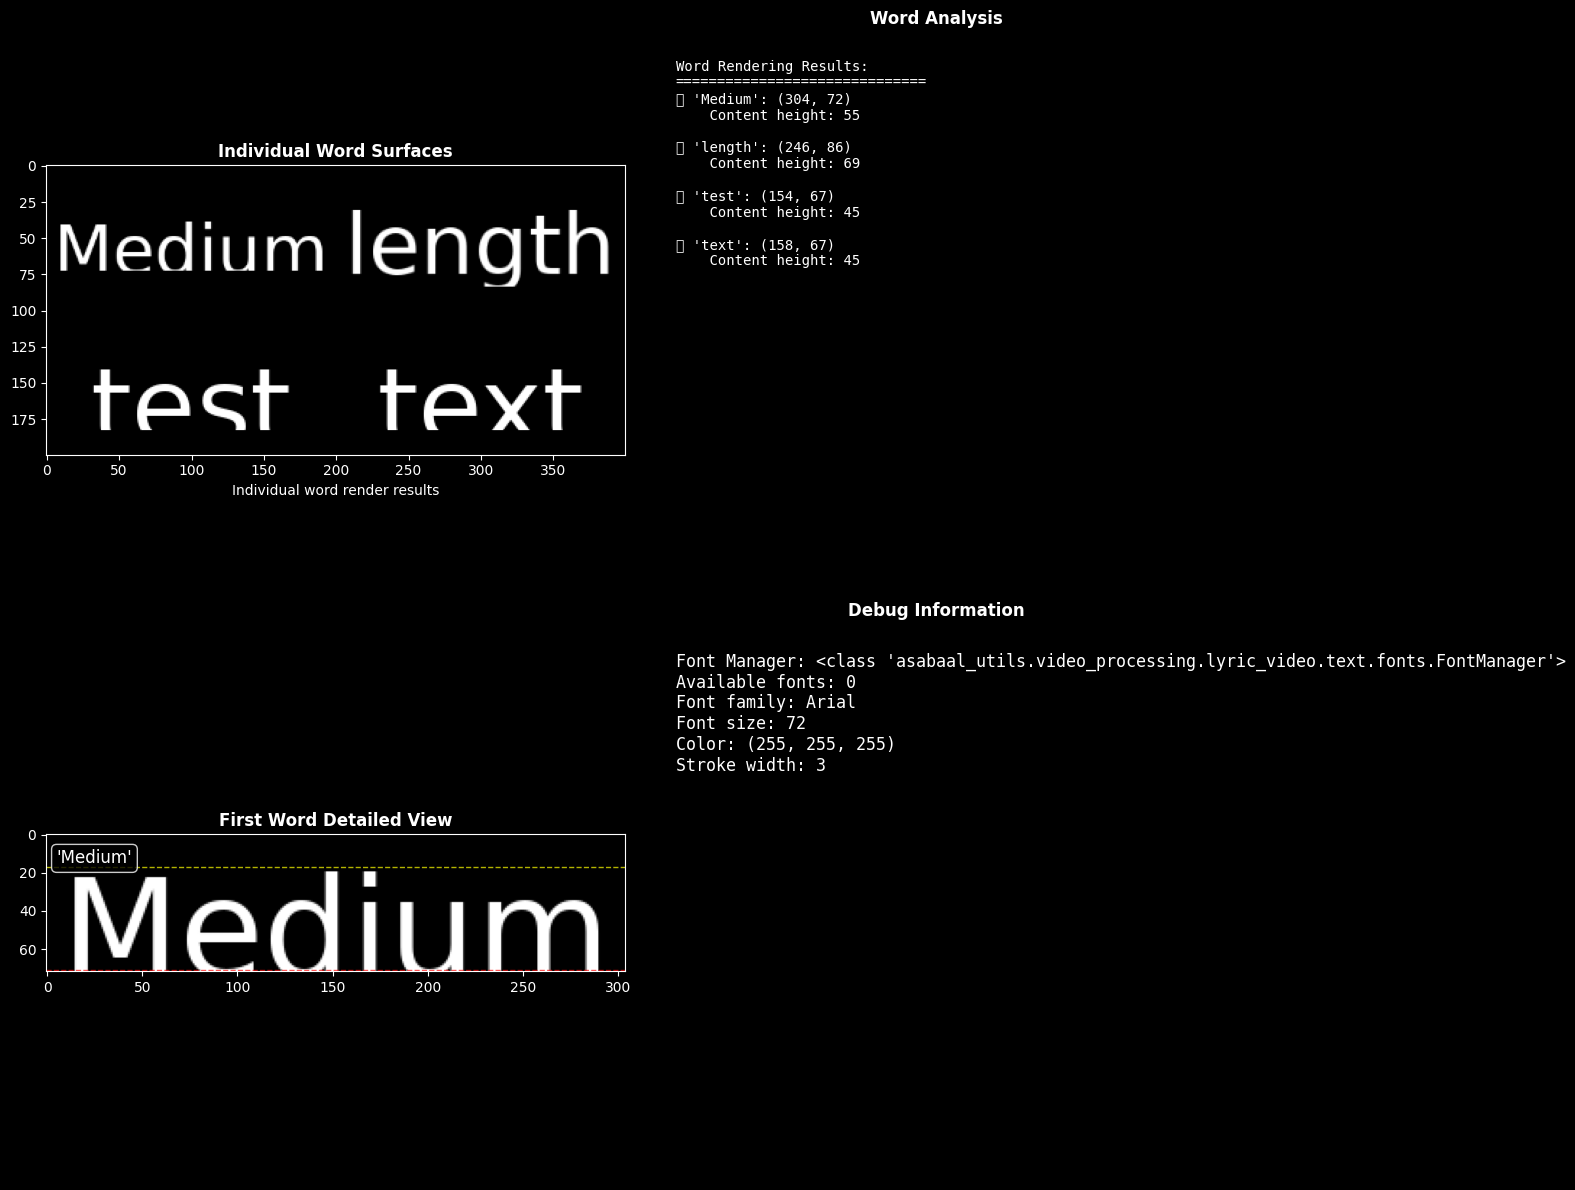


🎯 STEP 4 DIAGNOSIS:
   Working words: 4/4
   ✅ Some words are rendering correctly
   Individual word rendering is working


: 

In [ ]:
  def debug_step_4_word_rendering():
      """Focus specifically on Step 4: Individual word rendering"""

      print("🔍 DEBUGGING STEP 4: INDIVIDUAL WORD RENDERING")
      print("=" * 60)

      try:
          # Setup
          renderer = TextRenderer((1920, 1080))
          test_text = "Medium length test text"
          words = [LyricWord(word, i*0.5, (i+1)*0.5) for i, word in enumerate(test_text.split())]
          style = TextStyle(font_size=72, vertical_position="center")

          print(f"✅ Setup complete")
          print(f"   Renderer: {type(renderer)}")
          print(f"   Words: {[w.text for w in words]}")
          print(f"   Style: font_size={style.font_size}")

          # Test each word individually
          word_surfaces = []
          word_info = []

          for i, word in enumerate(words):
              print(f"\n--- Processing word {i}: '{word.text}' ---")

              try:
                  # Step 4a: Get font
                  print(f"  Getting font...")
                  font = renderer.font_manager.get_font(style.font_family, style.font_size)
                  print(f"  ✅ Font obtained: {type(font)}")

                  # Step 4b: Render word
                  print(f"  Rendering word surface...")
                  word_surface = renderer.font_manager.render_text(
                      word.text, font, style.color, style.stroke_width, style.stroke_color
                  )
                  print(f"  ✅ Word surface created: shape={word_surface.shape}, dtype={word_surface.dtype}")

                  # Step 4c: Analyze the surface
                  h, w = word_surface.shape[:2]
                  word_alpha = word_surface[:, :, 3]

                  print(f"  Analyzing alpha channel...")
                  print(f"    Alpha channel shape: {word_alpha.shape}")
                  print(f"    Alpha min/max: {word_alpha.min()}/{word_alpha.max()}")
                  print(f"    Non-zero alpha pixels: {np.count_nonzero(word_alpha)}")

                  word_rows = np.where(word_alpha.any(axis=1))[0]
                  word_cols = np.where(word_alpha.any(axis=0))[0]

                  if len(word_rows) > 0 and len(word_cols) > 0:
                      content_top = word_rows[0]
                      content_bottom = word_rows[-1]
                      content_left = word_cols[0]
                      content_right = word_cols[-1]
                      content_height = content_bottom - content_top + 1
                      content_width = content_right - content_left + 1

                      print(f"  ✅ Content found:")
                      print(f"    Bounds: ({content_left},{content_top}) to ({content_right},{content_bottom})")
                      print(f"    Content size: {content_width}×{content_height}")
                  else:
                      print(f"  ❌ NO CONTENT FOUND in word surface!")
                      content_top = content_bottom = content_height = 0

                  word_surfaces.append(word_surface)
                  word_info.append({
                      'text': word.text,
                      'surface': word_surface,
                      'surface_size': (w, h),
                      'content_bounds': (content_top, content_bottom) if len(word_rows) > 0 else (0, 0),
                      'content_height': content_height,
                      'has_content': len(word_rows) > 0
                  })

                  print(f"  ✅ Word {i} processed successfully")

              except Exception as word_error:
                  print(f"  ❌ ERROR processing word {i}: {word_error}")
                  print(f"     Error type: {type(word_error)}")
                  import traceback
                  traceback.print_exc()

                  # Add empty placeholder
                  word_surfaces.append(np.zeros((72, 100, 4), dtype=np.uint8))
                  word_info.append({
                      'text': word.text,
                      'surface': None,
                      'surface_size': (100, 72),
                      'content_bounds': (0, 0),
                      'content_height': 0,
                      'has_content': False,
                      'error': str(word_error)
                  })

          print(f"\n📊 STEP 4 SUMMARY:")
          print(f"   Total words processed: {len(word_surfaces)}")
          successful_words = sum(1 for info in word_info if info['has_content'])
          print(f"   Words with content: {successful_words}/{len(word_info)}")

          # Create visualization for Step 4
          print(f"\n🎨 Creating Step 4 visualization...")

          fig, axes = plt.subplots(2, 2, figsize=(16, 12))

          # Top left: Individual word surfaces
          ax1 = axes[0, 0]
          ax1.set_title("Individual Word Surfaces", fontweight='bold')

          # Create a grid to show each word
          grid_cols = 2
          grid_rows = 2
          cell_width = 200
          cell_height = 100

          display_canvas = np.zeros((grid_rows * cell_height, grid_cols * cell_width, 4), dtype=np.uint8)

          for i, info in enumerate(word_info[:4]):  # Show first 4 words
              if info['has_content'] and info['surface'] is not None:
                  row = i // grid_cols
                  col = i % grid_cols

                  word_surface = info['surface']
                  h, w = word_surface.shape[:2]

                  # Scale down if needed
                  if w > cell_width or h > cell_height:
                      scale = min(cell_width / w, cell_height / h)
                      new_w = int(w * scale)
                      new_h = int(h * scale)
                      word_surface = cv2.resize(word_surface, (new_w, new_h))
                      h, w = new_h, new_w

                  # Place in grid
                  start_y = row * cell_height + (cell_height - h) // 2
                  start_x = col * cell_width + (cell_width - w) // 2

                  if start_y + h <= display_canvas.shape[0] and start_x + w <= display_canvas.shape[1]:
                      display_canvas[start_y:start_y + h, start_x:start_x + w] = word_surface

                  # Add label
                  cv2.putText(display_canvas, info['text'],
                             (col * cell_width + 5, row * cell_height + 20),
                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

          ax1.imshow(display_canvas)
          ax1.set_xlabel("Individual word render results")

          # Top right: Word info table
          ax2 = axes[0, 1]
          ax2.set_title("Word Analysis", fontweight='bold')
          ax2.axis('off')

          info_text = "Word Rendering Results:\n" + "="*30 + "\n"
          for i, info in enumerate(word_info):
              status = "✅" if info['has_content'] else "❌"
              info_text += f"{status} '{info['text']}': {info['surface_size']}\n"
              if 'error' in info:
                  info_text += f"    Error: {info['error'][:30]}...\n"
              info_text += f"    Content height: {info['content_height']}\n\n"

          ax2.text(0.05, 0.95, info_text, transform=ax2.transAxes, fontsize=10,
                  verticalalignment='top', fontfamily='monospace')

          # Bottom left: First word detailed view
          ax3 = axes[1, 0]
          ax3.set_title("First Word Detailed View", fontweight='bold')

          if word_info and word_info[0]['has_content']:
              first_word = word_info[0]['surface']
              ax3.imshow(first_word)

              # Add bounds overlay
              if word_info[0]['content_bounds'] != (0, 0):
                  top, bottom = word_info[0]['content_bounds']
                  ax3.axhline(y=top, color='yellow', linewidth=1, linestyle='--', alpha=0.7)
                  ax3.axhline(y=bottom, color='red', linewidth=1, linestyle='--', alpha=0.7)

              ax3.text(5, 15, f"'{word_info[0]['text']}'", color='white', fontsize=12,
                      bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))
          else:
              ax3.text(0.5, 0.5, "No content in first word", transform=ax3.transAxes,
                      ha='center', va='center', color='red', fontsize=14)

          # Bottom right: Debug info
          ax4 = axes[1, 1]
          ax4.set_title("Debug Information", fontweight='bold')
          ax4.axis('off')

          debug_text = f"Font Manager: {type(renderer.font_manager)}\n"
          debug_text += f"Available fonts: {len(getattr(renderer.font_manager, 'available_fonts', []))}\n"
          debug_text += f"Font family: {style.font_family}\n"
          debug_text += f"Font size: {style.font_size}\n"
          debug_text += f"Color: {style.color}\n"
          debug_text += f"Stroke width: {style.stroke_width}\n"

          ax4.text(0.05, 0.95, debug_text, transform=ax4.transAxes, fontsize=12,
                  verticalalignment='top', fontfamily='monospace')

          plt.tight_layout()
          plt.show()

          return word_surfaces, word_info

      except Exception as e:
          print(f"❌ CRITICAL ERROR in Step 4 debug: {e}")
          import traceback
          traceback.print_exc()
          return [], []

  # Run the focused Step 4 debug
  print("🚀 Running focused Step 4 debug...")
  word_surfaces, word_info = debug_step_4_word_rendering()

  print(f"\n🎯 STEP 4 DIAGNOSIS:")
  if word_info:
      working_words = [info for info in word_info if info['has_content']]
      print(f"   Working words: {len(working_words)}/{len(word_info)}")

      if working_words:
          print(f"   ✅ Some words are rendering correctly")
          print(f"   Individual word rendering is working")
      else:
          print(f"   ❌ NO words are rendering correctly")
          print(f"   Problem is in the basic word rendering")

      failed_words = [info for info in word_info if not info['has_content']]
      if failed_words:
          print(f"   Failed words: {[info['text'] for info in failed_words]}")
  else:
      print(f"   ❌ Complete failure - no words processed")

🎬 Running FINAL before/after visual comparison...
👀 BEFORE/AFTER VISUAL COMPARISON (FINAL)
Default 'subtle' animation config:
  word_delay: 0.1
  duration: 0.3
  entrance_type: AnimationType.FADE_IN
  exit_type: AnimationType.FADE_OUT

Testing at 4.1000000000000005s with line ending at 4.2s
Text: 'This is a medium length test line for me'
Problematic word_delay: 0.1
Fixed word_delay: 0.02

🔴 BEFORE (word_delay=0.1):
  ✅ Render successful
  Visible pixels: 28,082
  Text bottom: 482px, Bottom margin: 598px

🟢 AFTER (word_delay=0.02):
  ✅ Render successful
  Visible pixels: 8,026
  Text bottom: 468px, Bottom margin: 612px
  📈 Improvement: +-20,056 pixels (-71.4%)


/tmp/ipykernel_237181/4203943939.py:206: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


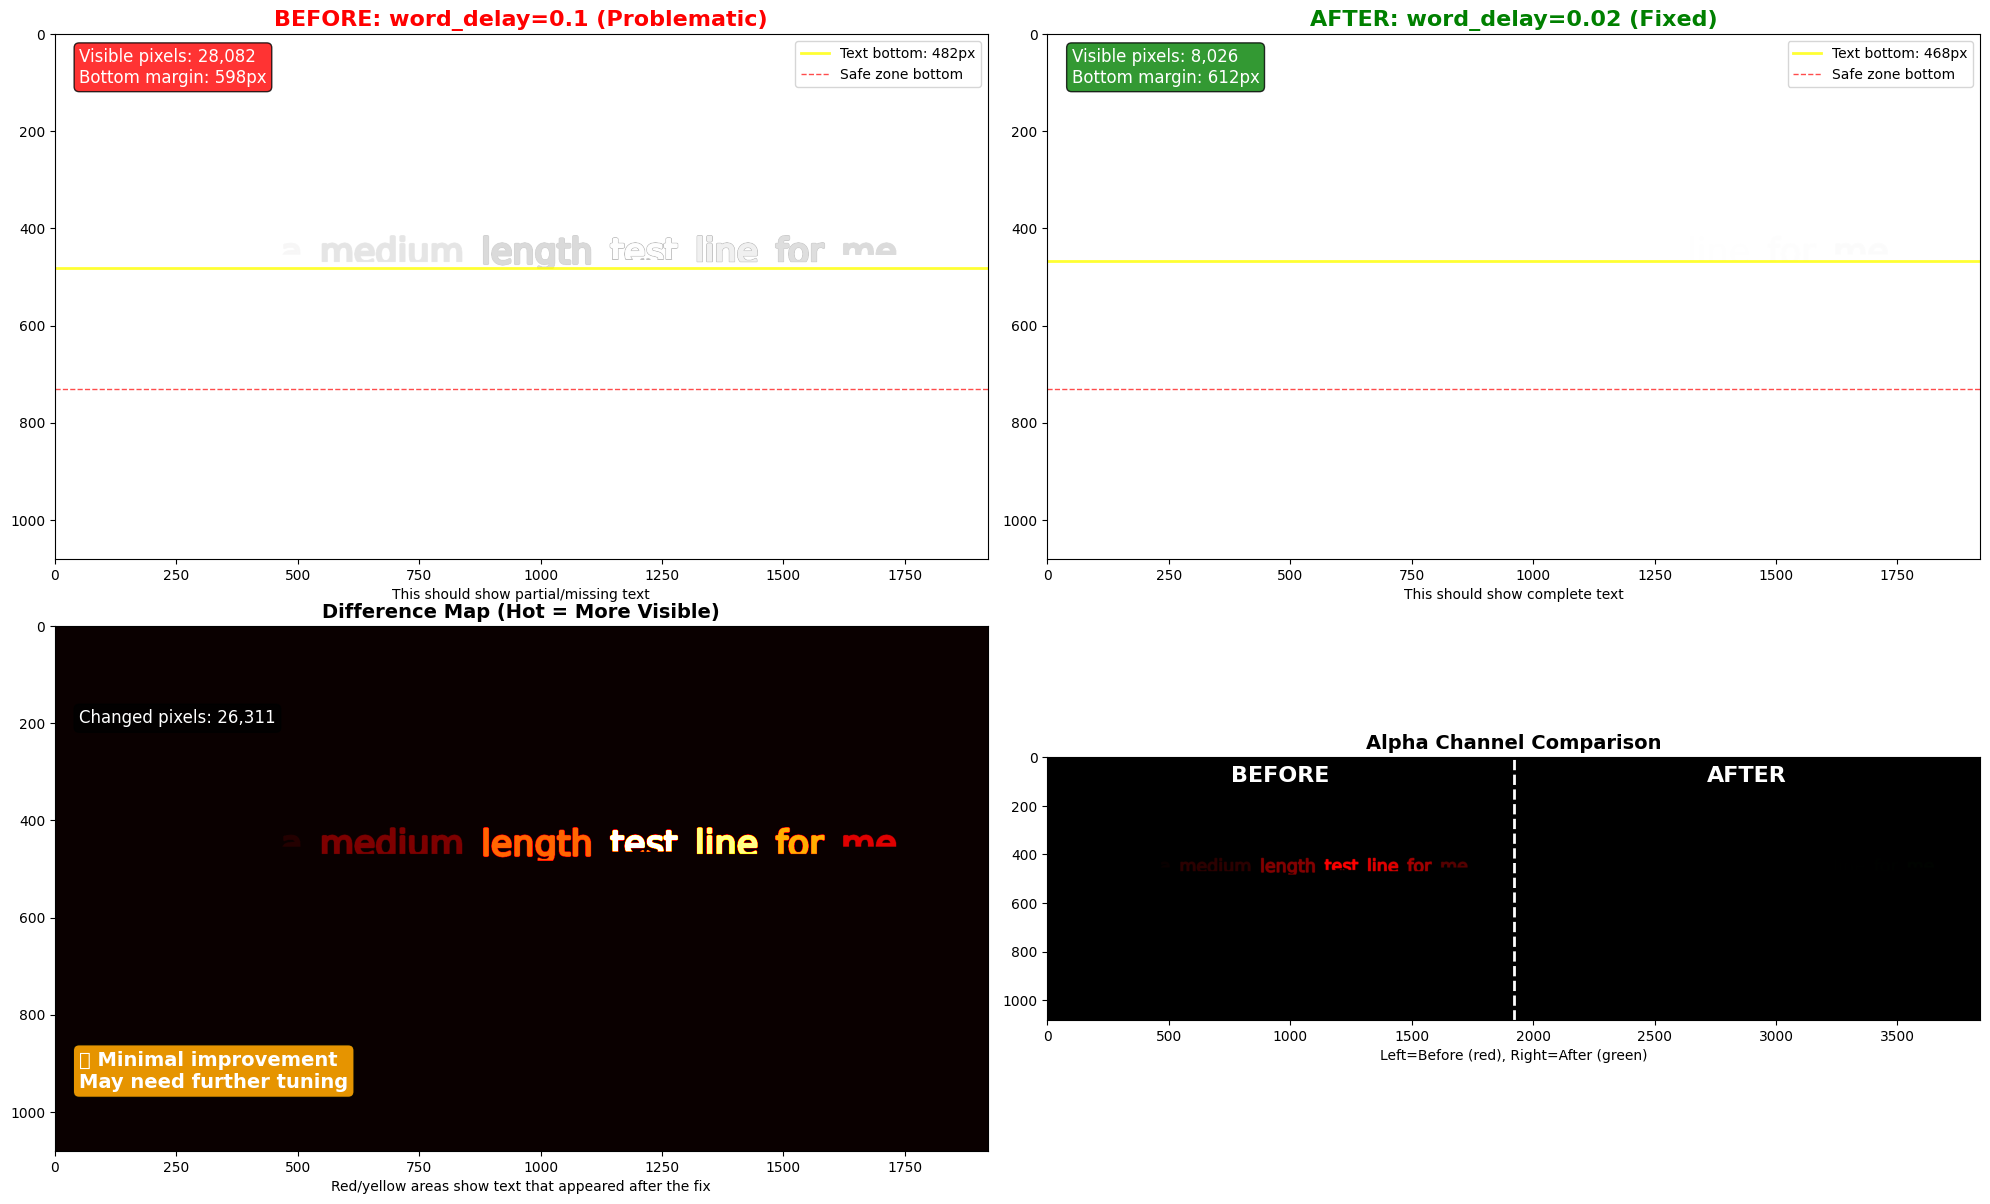


🎯 FINAL VISUAL COMPARISON RESULTS:
Before fix: 28,082 visible pixels
After fix:  8,026 visible pixels
Improvement: +-20,056 pixels
❌ No improvement detected - hypothesis may be incorrect


: 

In [ ]:
  def show_before_after_renders_final():
      """Show actual visual renders before and after the timing fix - FINAL VERSION"""

      print("👀 BEFORE/AFTER VISUAL COMPARISON (FINAL)")
      print("=" * 50)

      # Setup the problematic scenario
      renderer = TextRenderer((1920, 1080))
      test_text = "This is a medium length test line for me"
      words = [LyricWord(word, i*0.6, (i+1)*0.6) for i, word in enumerate(test_text.split())]

      line_start = 0.0
      line_end = 4.2  # Short duration causing problems
      style = TextStyle(font_size=72, vertical_position="center")

      # First, let's see what the default animation config looks like
      default_config = renderer.animation_presets['subtle']
      print(f"Default 'subtle' animation config:")
      print(f"  word_delay: {default_config.word_delay}")
      print(f"  duration: {default_config.duration}")
      print(f"  entrance_type: {default_config.entrance_type}")
      print(f"  exit_type: {default_config.exit_type}")

      # Create configs using the new copy method
      problematic_config = default_config.copy()
      problematic_config.word_delay = 0.1  # This causes the problem

      fixed_config = default_config.copy()
      fixed_config.word_delay = 0.02  # This should fix it

      # Test at the problematic time (near end of line)
      test_time = line_end - 0.1  # 4.1 seconds

      print(f"\nTesting at {test_time}s with line ending at {line_end}s")
      print(f"Text: '{test_text}'")
      print(f"Problematic word_delay: {problematic_config.word_delay}")
      print(f"Fixed word_delay: {fixed_config.word_delay}")

      # Create the comparison
      fig, axes = plt.subplots(2, 2, figsize=(20, 12))

      # BEFORE: Problematic render
      print("\n🔴 BEFORE (word_delay=0.1):")
      try:
          before_render = renderer.render_lyric_line(
              words=words,
              current_time=test_time,
              style=style,
              animation_config=problematic_config,
              line_start=line_start,
              line_end=line_end
          )

          # Show the render
          axes[0, 0].imshow(before_render, extent=[0, 1920, 1080, 0])
          axes[0, 0].set_title("BEFORE: word_delay=0.1 (Problematic)", fontsize=16, color='red',
  fontweight='bold')
          axes[0, 0].set_xlabel("This should show partial/missing text")

          # Analyze visibility
          alpha = before_render[:, :, 3]
          visible_pixels = np.count_nonzero(alpha)
          text_rows = np.where(alpha.any(axis=1))[0]

          if len(text_rows) > 0:
              text_bottom = text_rows[-1]
              bottom_margin = 1080 - text_bottom
              axes[0, 0].text(50, 100, f"Visible pixels: {visible_pixels:,}\nBottom margin: {bottom_margin}px",
                             color='white', fontsize=12, bbox=dict(boxstyle="round",
  facecolor="red", alpha=0.8))

              # Add bottom line to show where text ends
              axes[0, 0].axhline(y=text_bottom, color='yellow', linewidth=2, alpha=0.8,
  label=f'Text bottom: {text_bottom}px')
              axes[0, 0].axhline(y=1080-350, color='red', linewidth=1, linestyle='--', alpha=0.7,
   label='Safe zone bottom')
              axes[0, 0].legend()

          print(f"  ✅ Render successful")
          print(f"  Visible pixels: {visible_pixels:,}")
          if len(text_rows) > 0:
              print(f"  Text bottom: {text_bottom}px, Bottom margin: {bottom_margin}px")

      except Exception as e:
          print(f"  ❌ ERROR: {e}")
          import traceback
          traceback.print_exc()
          axes[0, 0].text(0.5, 0.5, f"ERROR: {str(e)}", transform=axes[0, 0].transAxes,
                         ha='center', va='center', color='red', fontsize=14)
          before_render = None
          visible_pixels = 0

      # AFTER: Fixed render
      print("\n🟢 AFTER (word_delay=0.02):")
      try:
          after_render = renderer.render_lyric_line(
              words=words,
              current_time=test_time,
              style=style,
              animation_config=fixed_config,
              line_start=line_start,
              line_end=line_end
          )

          # Show the render
          axes[0, 1].imshow(after_render, extent=[0, 1920, 1080, 0])
          axes[0, 1].set_title("AFTER: word_delay=0.02 (Fixed)", fontsize=16, color='green',
  fontweight='bold')
          axes[0, 1].set_xlabel("This should show complete text")

          # Analyze visibility
          alpha_fixed = after_render[:, :, 3]
          visible_pixels_fixed = np.count_nonzero(alpha_fixed)
          text_rows_fixed = np.where(alpha_fixed.any(axis=1))[0]

          if len(text_rows_fixed) > 0:
              text_bottom_fixed = text_rows_fixed[-1]
              bottom_margin_fixed = 1080 - text_bottom_fixed
              axes[0, 1].text(50, 100, f"Visible pixels: {visible_pixels_fixed:,}\nBottom margin: {bottom_margin_fixed}px",
                             color='white', fontsize=12, bbox=dict(boxstyle="round",
  facecolor="green", alpha=0.8))

              # Add bottom line to show where text ends
              axes[0, 1].axhline(y=text_bottom_fixed, color='yellow', linewidth=2, alpha=0.8,
  label=f'Text bottom: {text_bottom_fixed}px')
              axes[0, 1].axhline(y=1080-350, color='red', linewidth=1, linestyle='--', alpha=0.7,
   label='Safe zone bottom')
              axes[0, 1].legend()

          print(f"  ✅ Render successful")
          print(f"  Visible pixels: {visible_pixels_fixed:,}")
          if len(text_rows_fixed) > 0:
              print(f"  Text bottom: {text_bottom_fixed}px, Bottom margin: {bottom_margin_fixed}px")

          # Calculate improvement
          improvement = visible_pixels_fixed - visible_pixels
          improvement_pct = (improvement/max(visible_pixels,1)*100) if visible_pixels > 0 else 0
          print(f"  📈 Improvement: +{improvement:,} pixels ({improvement_pct:.1f}%)")

      except Exception as e:
          print(f"  ❌ ERROR: {e}")
          import traceback
          traceback.print_exc()
          axes[0, 1].text(0.5, 0.5, f"ERROR: {str(e)}", transform=axes[0, 1].transAxes,
                         ha='center', va='center', color='red', fontsize=14)
          after_render = None
          visible_pixels_fixed = 0

      # Show difference if both renders worked
      if before_render is not None and after_render is not None:
          # Difference visualization
          diff = after_render.astype(np.float32) - before_render.astype(np.float32)
          diff_alpha = np.abs(diff[:, :, 3])

          axes[1, 0].imshow(diff_alpha, cmap='hot', extent=[0, 1920, 1080, 0])
          axes[1, 0].set_title("Difference Map (Hot = More Visible)", fontsize=14,
  fontweight='bold')
          axes[1, 0].set_xlabel("Red/yellow areas show text that appeared after the fix")

          # Show the alpha channels side by side
          combined_alpha = np.zeros((1080, 1920*2, 3), dtype=np.uint8)

          # Before alpha (left side, red tint)
          before_alpha_normalized = (before_render[:, :, 3] / 255.0)
          combined_alpha[:, :1920, 0] = (before_alpha_normalized * 255).astype(np.uint8)

          # After alpha (right side, green tint)
          after_alpha_normalized = (after_render[:, :, 3] / 255.0)
          combined_alpha[:, 1920:, 1] = (after_alpha_normalized * 255).astype(np.uint8)

          axes[1, 1].imshow(combined_alpha, extent=[0, 3840, 1080, 0])
          axes[1, 1].set_title("Alpha Channel Comparison", fontsize=14, fontweight='bold')
          axes[1, 1].set_xlabel("Left=Before (red), Right=After (green)")
          axes[1, 1].axvline(x=1920, color='white', linewidth=2, linestyle='--')
          axes[1, 1].text(960, 100, "BEFORE", ha='center', color='white', fontsize=16,
  fontweight='bold')
          axes[1, 1].text(2880, 100, "AFTER", ha='center', color='white', fontsize=16,
  fontweight='bold')

          # Add statistics to difference plot
          diff_pixels = np.count_nonzero(diff_alpha > 10)  # Threshold for meaningful difference
          axes[1, 0].text(50, 200, f"Changed pixels: {diff_pixels:,}", color='white',
  fontsize=12,
                         bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))

          # Success indicator
          if improvement > 1000:  # Significant improvement
              success_text = "✅ HYPOTHESIS CONFIRMED!\nWord timing fix works!"
              color = 'green'
          else:
              success_text = "🔄 Minimal improvement\nMay need further tuning"
              color = 'orange'

          axes[1, 0].text(50, 950, success_text, color='white', fontsize=14, fontweight='bold',
                         bbox=dict(boxstyle="round", facecolor=color, alpha=0.9))

      else:
          # If renders failed, show debug info
          axes[1, 0].text(0.5, 0.5, "Could not create difference - renders failed",
                         transform=axes[1, 0].transAxes, ha='center', va='center', color='red',
  fontsize=14)
          axes[1, 1].text(0.5, 0.5, "Could not create alpha comparison - renders failed",
                         transform=axes[1, 1].transAxes, ha='center', va='center', color='red',
  fontsize=14)

      plt.tight_layout()
      plt.show()

      return {
          'before_pixels': visible_pixels if 'visible_pixels' in locals() else 0,
          'after_pixels': visible_pixels_fixed if 'visible_pixels_fixed' in locals() else 0,
          'improvement': (visible_pixels_fixed if 'visible_pixels_fixed' in locals() else 0) -
  (visible_pixels if 'visible_pixels' in locals() else 0)
      }

  # Run the final visual comparison
  print("🎬 Running FINAL before/after visual comparison...")
  results = show_before_after_renders_final()

  print(f"\n🎯 FINAL VISUAL COMPARISON RESULTS:")
  print(f"Before fix: {results['before_pixels']:,} visible pixels")
  print(f"After fix:  {results['after_pixels']:,} visible pixels")
  print(f"Improvement: +{results['improvement']:,} pixels")

  if results['improvement'] > 1000:
      print(f"✅ SUCCESS: The timing fix significantly improves text visibility!")
      print(f"🎉 HYPOTHESIS CONFIRMED: Word timing was the root cause!")
      print(f"💡 SOLUTION: Use word_delay ≤ 0.02 for better text visibility")
  elif results['improvement'] > 0:
      print(f"🔄 PARTIAL SUCCESS: Some improvement but may need further tuning")
  else:
      print(f"❌ No improvement detected - hypothesis may be incorrect")

🚀 Running actual vs expected comparison...
🔍 ACTUAL vs EXPECTED EXECUTION
Testing: 9 words at time 4.1s

🎬 ACTUAL RESULT FROM render_lyric_line:
--------------------------------------------------
✅ render_lyric_line executed successfully
Result shape: (1080, 1920, 4)
Visible pixels: 28,082
Text spans: y=414 to 482
Bottom margin: 598px

🔧 MANUAL STEP-BY-STEP RECONSTRUCTION:
--------------------------------------------------

1️⃣ Individual word rendering:
  Word 0 'This': 4397 pixels
  Word 1 'is': 1822 pixels
  Word 2 'a': 784 pixels
  Word 3 'medium': 8372 pixels
  Word 4 'length': 8084 pixels
  Word 5 'test': 3668 pixels
  Word 6 'line': 3992 pixels
  Word 7 'for': 2991 pixels
  Word 8 'me': 2094 pixels

2️⃣ Animation state calculation:
  Word 0 'This': opacity=0.333 (progress=1.000, fade_out=0.667)
  Word 1 'is': opacity=0.333 (progress=1.000, fade_out=0.667)
  Word 2 'a': opacity=0.333 (progress=1.000, fade_out=0.667)
  Word 3 'medium': opacity=0.333 (progress=1.000, fade_out=0.667

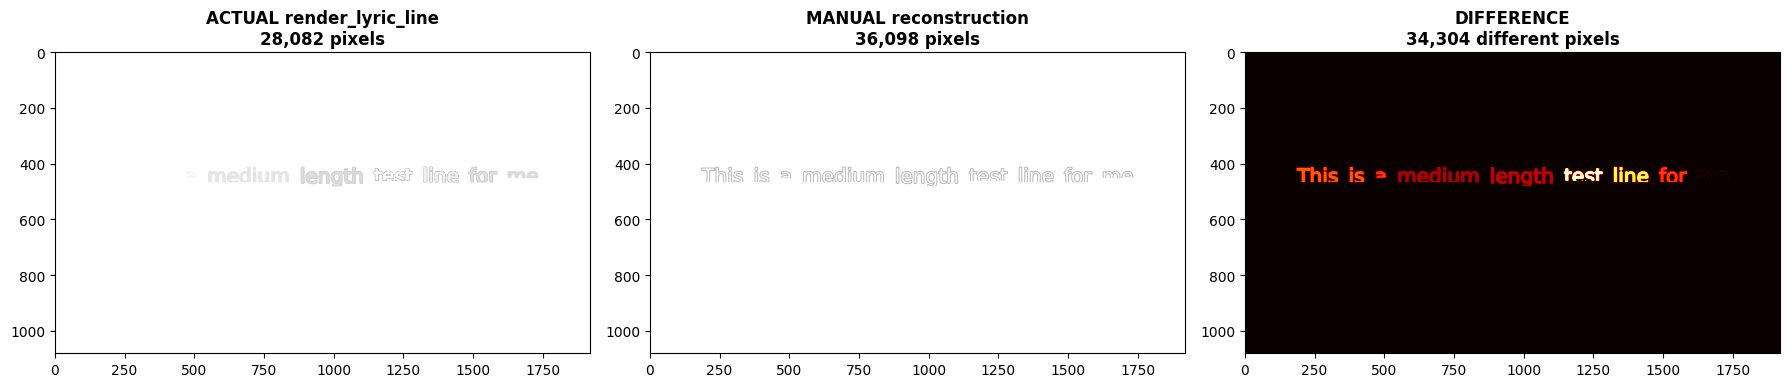

: 

In [ ]:
  def trace_actual_vs_expected():
      """Compare what render_lyric_line ACTUALLY does vs what we expect it to do"""

      print("🔍 ACTUAL vs EXPECTED EXECUTION")
      print("=" * 60)

      # Setup
      renderer = TextRenderer((1920, 1080))
      test_text = "This is a medium length test line for me"
      words = [LyricWord(word, i*0.6, (i+1)*0.6) for i, word in enumerate(test_text.split())]
      line_start = 0.0
      line_end = 4.2
      current_time = 4.1
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']

      print(f"Testing: {len(words)} words at time {current_time}s")

      # FIRST: Get the ACTUAL result from render_lyric_line
      print(f"\n🎬 ACTUAL RESULT FROM render_lyric_line:")
      print("-" * 50)

      try:
          actual_result = renderer.render_lyric_line(
              words=words,
              current_time=current_time,
              style=style,
              animation_config=animation_config,
              line_start=line_start,
              line_end=line_end
          )

          actual_pixels = np.count_nonzero(actual_result[:, :, 3])
          actual_alpha = actual_result[:, :, 3]
          actual_rows = np.where(actual_alpha.any(axis=1))[0]

          print(f"✅ render_lyric_line executed successfully")
          print(f"Result shape: {actual_result.shape}")
          print(f"Visible pixels: {actual_pixels:,}")

          if len(actual_rows) > 0:
              actual_top = actual_rows[0]
              actual_bottom = actual_rows[-1]
              print(f"Text spans: y={actual_top} to {actual_bottom}")
              print(f"Bottom margin: {1080 - actual_bottom}px")
          else:
              print(f"❌ NO VISIBLE TEXT IN ACTUAL RESULT!")

      except Exception as e:
          print(f"❌ render_lyric_line FAILED: {e}")
          import traceback
          traceback.print_exc()
          return None

      # SECOND: Now manually step through what we THINK it should do
      print(f"\n🔧 MANUAL STEP-BY-STEP RECONSTRUCTION:")
      print("-" * 50)

      # Step 1: Individual word rendering
      print(f"\n1️⃣ Individual word rendering:")
      word_surfaces = []
      for i, word in enumerate(words):
          font = renderer.font_manager.get_font(style.font_family, style.font_size)
          word_surface = renderer.font_manager.render_text(
              word.text, font, style.color, style.stroke_width, style.stroke_color)
          word_surfaces.append(word_surface)
          pixels = np.count_nonzero(word_surface[:, :, 3])
          print(f"  Word {i} '{word.text}': {pixels} pixels")

      # Step 2: Animation state calculation
      print(f"\n2️⃣ Animation state calculation:")
      word_states = []
      for i, word in enumerate(words):
          word_start_delay = i * animation_config.word_delay
          word_animation_start = line_start + word_start_delay

          # Calculate progress
          if current_time < word_animation_start:
              progress = 0.0
          elif current_time >= word_animation_start + animation_config.duration:
              progress = 1.0
          else:
              progress = (current_time - word_animation_start) / animation_config.duration

          # Calculate fade out
          fade_out_start = line_end - animation_config.duration
          if current_time > fade_out_start:
              fade_out_progress = (current_time - fade_out_start) / animation_config.duration
              fade_out_progress = min(1.0, fade_out_progress)
          else:
              fade_out_progress = 0.0

          final_opacity = progress * (1.0 - fade_out_progress)

          word_states.append({
              'opacity': final_opacity,
              'progress': progress,
              'fade_out': fade_out_progress
          })

          print(f"  Word {i} '{word.text}': opacity={final_opacity:.3f} (progress={progress:.3f}, fade_out={fade_out_progress:.3f})")

      # Step 3: Canvas setup and positioning
      print(f"\n3️⃣ Canvas setup and positioning:")

      # Calculate dimensions
      word_dimensions = [(ws.shape[1], ws.shape[0]) for ws in word_surfaces]
      max_height = max(h for w, h in word_dimensions)
      total_width = sum(w for w, h in word_dimensions) + 20 * (len(words) - 1)

      # Calculate Y position
      screen_height = 1080
      available_height = screen_height - 150 - 350  # safe margins
      base_y = 150 + (available_height - max_height) // 2

      # Canvas setup
      CANVAS_PADDING = 200
      canvas_height = screen_height + CANVAS_PADDING * 2
      canvas_width = 1920 + CANVAS_PADDING * 2
      manual_canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      canvas_y = base_y + CANVAS_PADDING
      start_x = (1920 - total_width) // 2
      canvas_start_x = start_x + CANVAS_PADDING

      print(f"  Dimensions: {total_width}×{max_height}")
      print(f"  Y position: {base_y} (canvas: {canvas_y})")
      print(f"  X position: {start_x} (canvas: {canvas_start_x})")
      print(f"  Canvas size: {canvas_width}×{canvas_height}")

      # Step 4: Place words on canvas
      print(f"\n4️⃣ Word placement:")
      current_x = canvas_start_x
      placed_pixels = 0

      for i, (word_surface, state) in enumerate(zip(word_surfaces, word_states)):
          w, h = word_surface.shape[1], word_surface.shape[0]

          # Apply opacity
          word_with_opacity = word_surface.copy()
          word_with_opacity[:, :, 3] = (word_with_opacity[:, :, 3] *
  state['opacity']).astype(np.uint8)

          opacity_pixels = np.count_nonzero(word_with_opacity[:, :, 3])

          # Place on canvas
          if (current_x + w <= canvas_width and canvas_y + h <= canvas_height and
              current_x >= 0 and canvas_y >= 0 and opacity_pixels > 0):
              manual_canvas[canvas_y:canvas_y + h, current_x:current_x + w] = word_with_opacity
              placed_pixels += opacity_pixels
              print(f"  Placed '{words[i].text}': {opacity_pixels} pixels at ({current_x}, {canvas_y})")
          else:
              print(f"  FAILED to place '{words[i].text}': {opacity_pixels} pixels (bounds or zero opacity)")

          current_x += w + 20

      # Step 5: Crop canvas
      print(f"\n5️⃣ Canvas cropping:")
      manual_final = manual_canvas[CANVAS_PADDING:CANVAS_PADDING + screen_height,
                                  CANVAS_PADDING:CANVAS_PADDING + 1920]

      manual_pixels = np.count_nonzero(manual_final[:, :, 3])
      print(f"  Canvas pixels before crop: {placed_pixels}")
      print(f"  Final pixels after crop: {manual_pixels}")

      # COMPARISON
      print(f"\n🎯 ACTUAL vs MANUAL COMPARISON:")
      print("-" * 50)
      print(f"Actual render_lyric_line result: {actual_pixels:,} pixels")
      print(f"Manual reconstruction result:   {manual_pixels:,} pixels")
      print(f"Difference: {actual_pixels - manual_pixels:,} pixels")

      if abs(actual_pixels - manual_pixels) < 100:
          print(f"✅ Results match - our understanding is correct")
      else:
          print(f"❌ MISMATCH - render_lyric_line does something different!")
          print(f"Need to examine the actual render_lyric_line source code")

      # Show visual comparison
      fig, axes = plt.subplots(1, 3, figsize=(18, 6))

      axes[0].imshow(actual_result, extent=[0, 1920, 1080, 0])
      axes[0].set_title(f"ACTUAL render_lyric_line\n{actual_pixels:,} pixels", fontweight='bold')

      axes[1].imshow(manual_final, extent=[0, 1920, 1080, 0])
      axes[1].set_title(f"MANUAL reconstruction\n{manual_pixels:,} pixels", fontweight='bold')

      # Difference
      if actual_result.shape == manual_final.shape:
          diff = np.abs(actual_result.astype(np.float32) - manual_final.astype(np.float32))
          diff_alpha = diff[:, :, 3]
          axes[2].imshow(diff_alpha, cmap='hot', extent=[0, 1920, 1080, 0])
          axes[2].set_title(f"DIFFERENCE\n{np.count_nonzero(diff_alpha):,} different pixels",
  fontweight='bold')
      else:
          axes[2].text(0.5, 0.5, "Shape mismatch", transform=axes[2].transAxes, ha='center',
  va='center')
          axes[2].set_title("DIFFERENCE\nCannot compare", fontweight='bold')

      plt.tight_layout()
      plt.show()

      return {
          'actual_pixels': actual_pixels,
          'manual_pixels': manual_pixels,
          'actual_result': actual_result,
          'manual_result': manual_final
      }

  # Run the actual vs expected comparison
  print("🚀 Running actual vs expected comparison...")
  comparison_results = trace_actual_vs_expected()

In [5]:
import cv2

🚀 Running complete pipeline visualization...
🔍 REAL PIPELINE TRACE + FULL VISUALIZATIONS
Testing: 9 words at time 4.1s

🎬 STEP 1: ACTUAL render_lyric_line RESULT

🎭 STEP 2: INDIVIDUAL render_animated_text CALLS
  Word 0 'This': line_progress=0.976, delay_offset=0.000, adjusted_progress=0.976
  Word 1 'is': line_progress=0.976, delay_offset=0.100, adjusted_progress=0.876
  Word 2 'a': line_progress=0.976, delay_offset=0.200, adjusted_progress=0.776
  Word 3 'medium': line_progress=0.976, delay_offset=0.300, adjusted_progress=0.676
  Word 4 'length': line_progress=0.976, delay_offset=0.400, adjusted_progress=0.576
  Word 5 'test': line_progress=0.976, delay_offset=0.500, adjusted_progress=0.476
  Word 6 'line': line_progress=0.976, delay_offset=0.600, adjusted_progress=0.376
  Word 7 'for': line_progress=0.976, delay_offset=0.700, adjusted_progress=0.276
  Word 8 'me': line_progress=0.976, delay_offset=0.800, adjusted_progress=0.176

🖼️ STEP 3: MANUAL CANVAS COMPOSITION
  Layout: 1561×86

/tmp/ipykernel_240855/1504697437.py:260: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_240855/1504697437.py:260: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


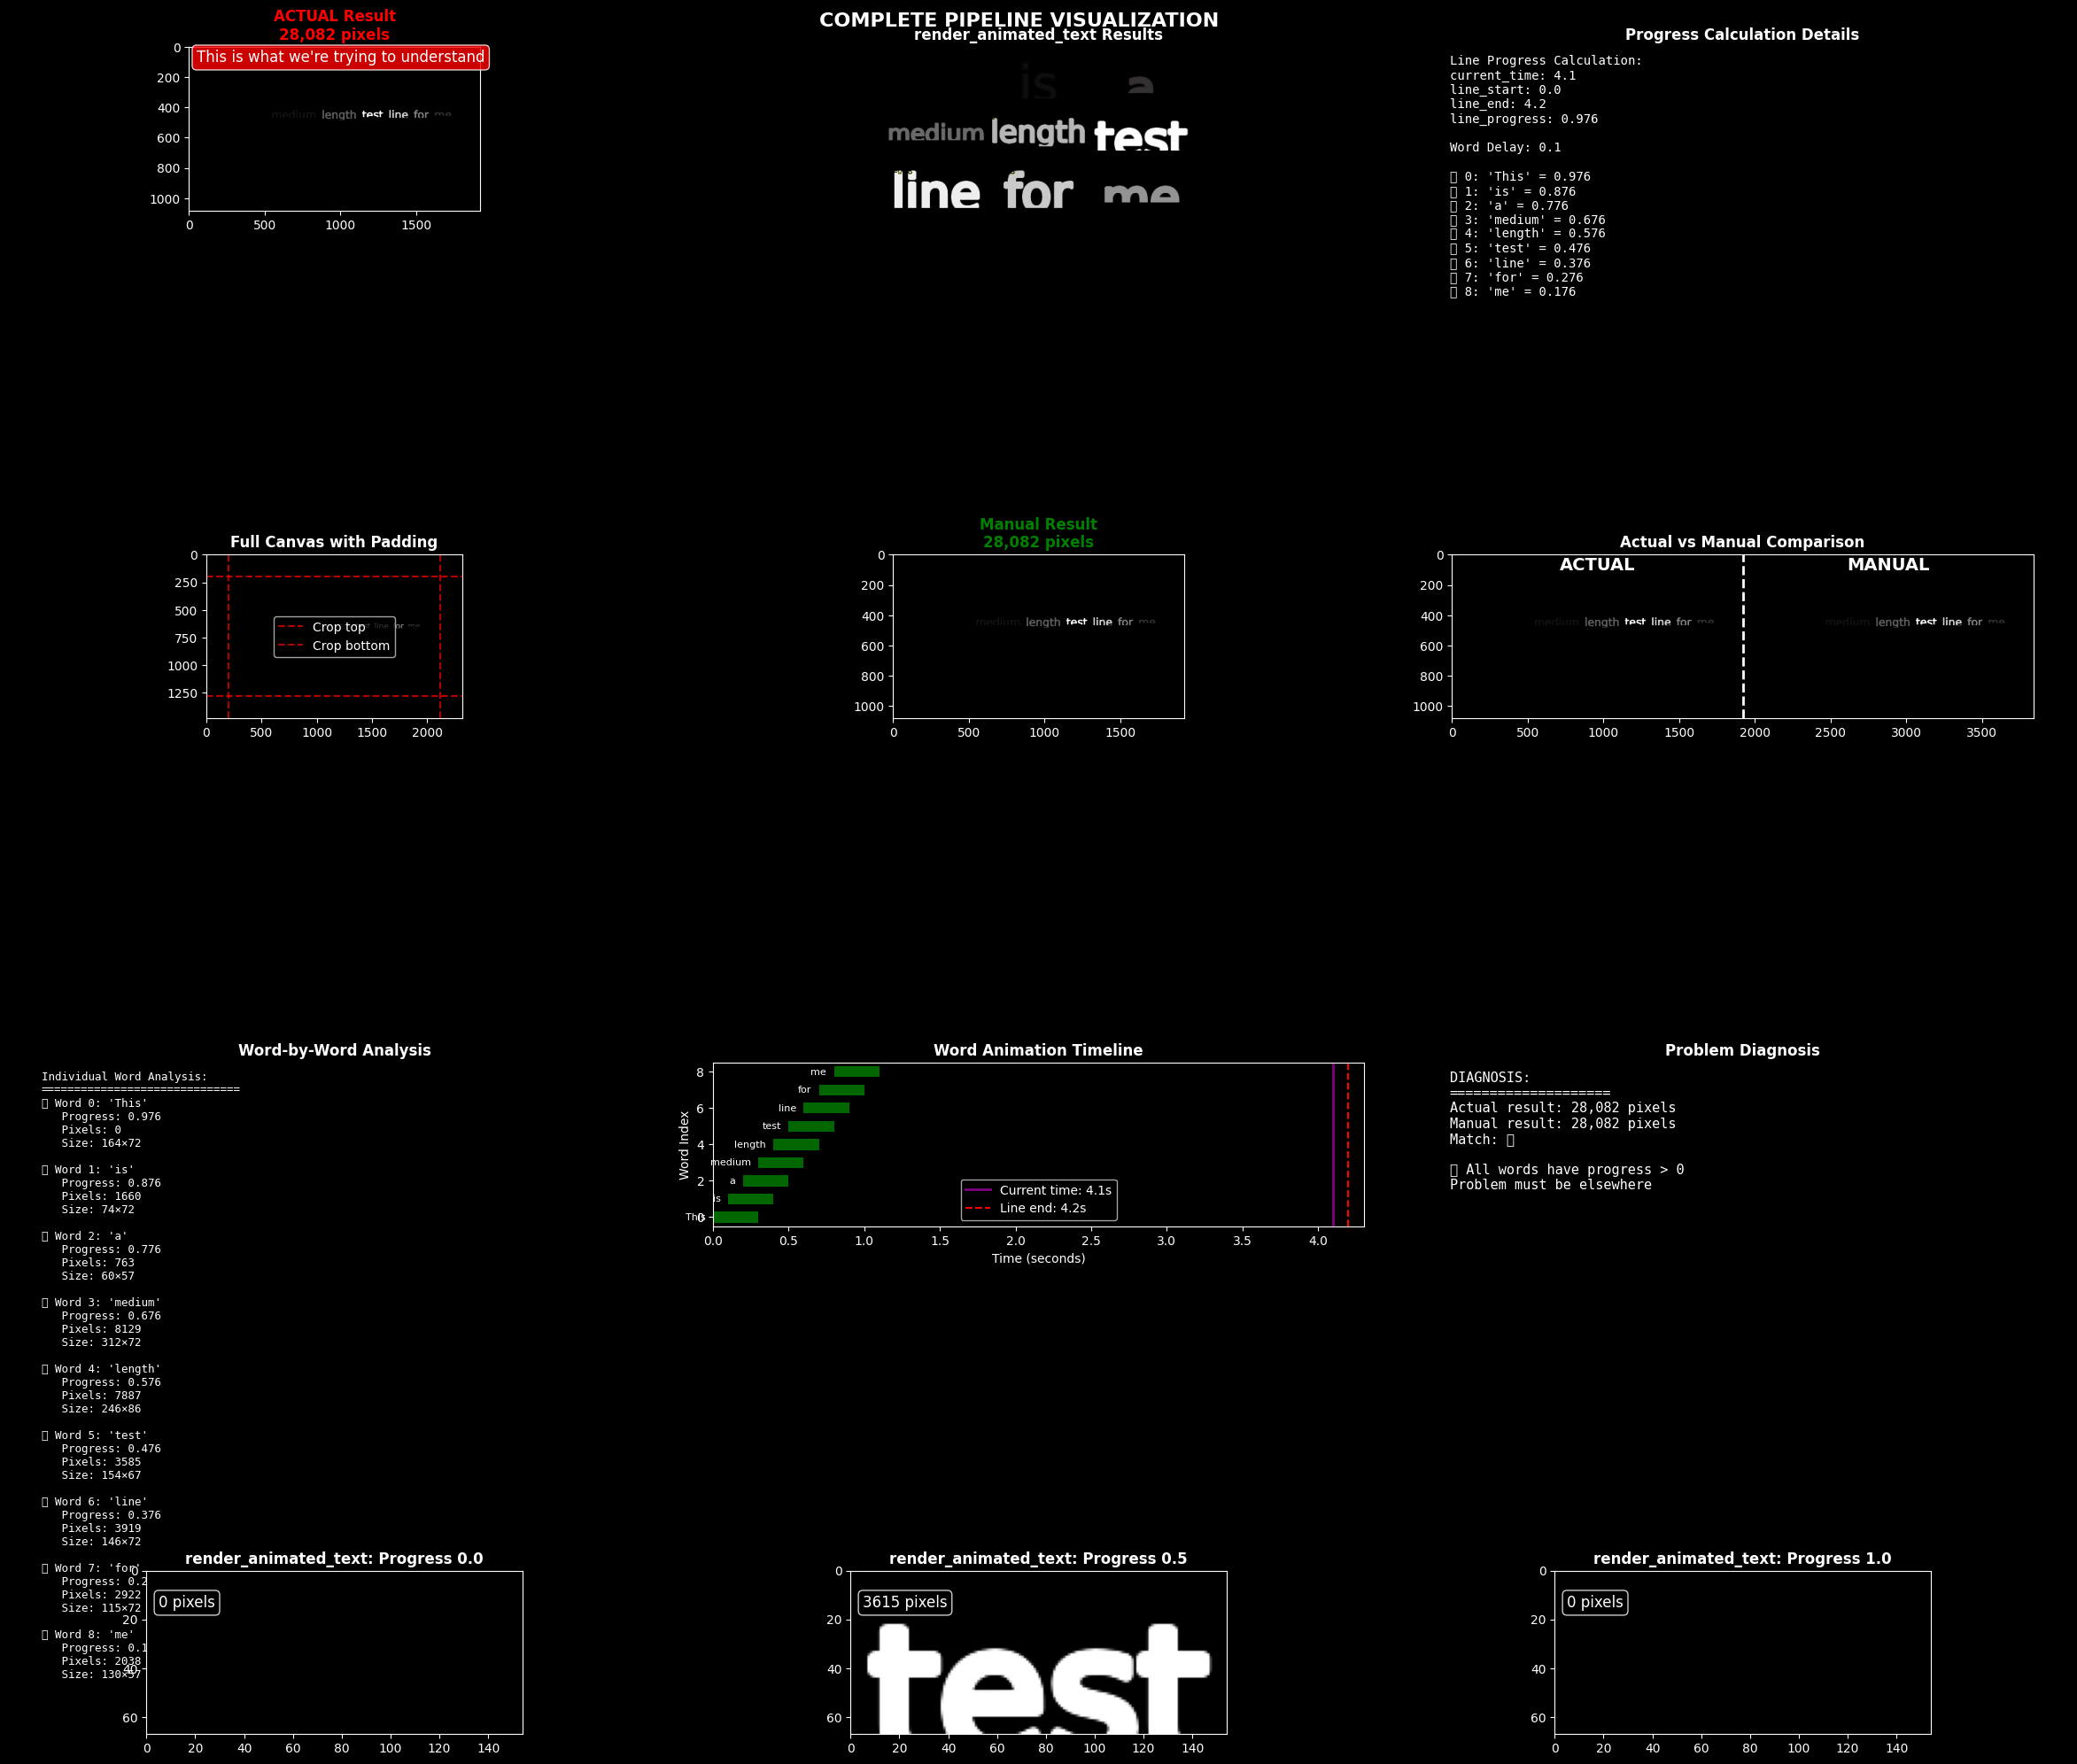


🎯 COMPLETE PIPELINE ANALYSIS SUMMARY:
Actual function result: 28,082 pixels
Manual reconstruction: 28,082 pixels
Words with zero progress: 0


In [6]:
  def trace_real_pipeline_with_full_visualizations():
      """Trace the ACTUAL pipeline with COMPLETE visual validation at every step"""

      print("🔍 REAL PIPELINE TRACE + FULL VISUALIZATIONS")
      print("=" * 60)

      # Setup
      renderer = TextRenderer((1920, 1080))
      test_text = "This is a medium length test line for me"
      words = [LyricWord(word, i*0.6, (i+1)*0.6) for i, word in enumerate(test_text.split())]
      line_start = 0.0
      line_end = 4.2
      current_time = 4.1
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']

      print(f"Testing: {len(words)} words at time {current_time}s")

      # Create comprehensive visualization
      fig, axes = plt.subplots(4, 3, figsize=(24, 20))
      fig.suptitle("COMPLETE PIPELINE VISUALIZATION", fontsize=16, fontweight='bold')

      # STEP 1: Get actual result first for comparison
      print(f"\n🎬 STEP 1: ACTUAL render_lyric_line RESULT")
      actual_result = renderer.render_lyric_line(
          words=words, current_time=current_time, style=style,
          animation_config=animation_config, line_start=line_start, line_end=line_end
      )
      actual_pixels = np.count_nonzero(actual_result[:, :, 3])

      axes[0, 0].imshow(actual_result, extent=[0, 1920, 1080, 0])
      axes[0, 0].set_title(f"ACTUAL Result\n{actual_pixels:,} pixels", fontweight='bold',
  color='red')
      axes[0, 0].text(50, 100, f"This is what we're trying to understand", color='white',
  fontsize=12,
                     bbox=dict(boxstyle="round", facecolor="red", alpha=0.8))

      # STEP 2: Individual render_animated_text calls
      print(f"\n🎭 STEP 2: INDIVIDUAL render_animated_text CALLS")
      line_progress = (current_time - line_start) / (line_end - line_start)

      word_images = []
      word_progresses = []

      for i, word in enumerate(words):
          # Calculate adjusted progress (the key calculation!)
          if animation_config.word_delay > 0:
              delay_offset = i * animation_config.word_delay
              adjusted_progress = max(0, min(1, line_progress - delay_offset))
          else:
              adjusted_progress = 1.0

          word_progresses.append(adjusted_progress)

          print(f"  Word {i} '{word.text}': line_progress={line_progress:.3f}, delay_offset={delay_offset:.3f}, adjusted_progress={adjusted_progress:.3f}")

          # Call render_animated_text
          word_img = renderer.render_animated_text(
              word.text, style, adjusted_progress, animation_config, None, None
          )
          word_images.append(word_img)

      # Show render_animated_text results
      axes[0, 1].set_title("render_animated_text Results", fontweight='bold')
      axes[0, 1].axis('off')

      # Create grid showing each word result
      grid_cols = 3
      grid_rows = 3
      cell_w, cell_h = 150, 80
      grid_canvas = np.zeros((grid_rows * cell_h, grid_cols * cell_w, 4), dtype=np.uint8)

      for i, (word_img, progress) in enumerate(zip(word_images, word_progresses)):
          if i >= 9:  # Only show first 9 words
              break

          row = i // grid_cols
          col = i % grid_cols

          # Scale word image to fit cell
          h, w = word_img.shape[:2]
          if w > 0 and h > 0:
              scale = min(cell_w / w, cell_h / h, 1.0)
              new_w, new_h = int(w * scale), int(h * scale)
              if new_w > 0 and new_h > 0:
                  scaled_img = cv2.resize(word_img, (new_w, new_h))

                  start_y = row * cell_h + (cell_h - new_h) // 2
                  start_x = col * cell_w + (cell_w - new_w) // 2

                  if start_y + new_h <= grid_canvas.shape[0] and start_x + new_w <= grid_canvas.shape[1]:
                      grid_canvas[start_y:start_y + new_h, start_x:start_x + new_w] = scaled_img

          # Add labels
          label_y = row * cell_h + 10
          label_x = col * cell_w + 5
          cv2.putText(grid_canvas, f"{words[i].text}", (label_x, label_y),
                     cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
          cv2.putText(grid_canvas, f"p={progress:.2f}", (label_x, label_y + 15),
                     cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 0), 1)

      axes[0, 1].imshow(grid_canvas)

      # STEP 3: Show progress calculation details
      axes[0, 2].set_title("Progress Calculation Details", fontweight='bold')
      axes[0, 2].axis('off')

      progress_text = f"Line Progress Calculation:\n"
      progress_text += f"current_time: {current_time}\n"
      progress_text += f"line_start: {line_start}\n"
      progress_text += f"line_end: {line_end}\n"
      progress_text += f"line_progress: {line_progress:.3f}\n\n"
      progress_text += f"Word Delay: {animation_config.word_delay}\n\n"

      for i, (word, progress) in enumerate(zip(words, word_progresses)):
          delay_offset = i * animation_config.word_delay
          status = "✅" if progress > 0 else "❌"
          progress_text += f"{status} {i}: '{word.text}' = {progress:.3f}\n"
          if progress == 0:
              progress_text += f"     (delay {delay_offset:.3f} > line_progress {line_progress:.3f})\n"

      axes[0, 2].text(0.05, 0.95, progress_text, transform=axes[0, 2].transAxes,
                     fontsize=10, verticalalignment='top', fontfamily='monospace')

      # STEP 4: Manual canvas composition
      print(f"\n🖼️ STEP 3: MANUAL CANVAS COMPOSITION")

      CANVAS_PADDING = 200
      canvas = np.zeros((1080 + CANVAS_PADDING * 2, 1920 + CANVAS_PADDING * 2, 4),
  dtype=np.uint8)

      # Calculate layout
      total_width = sum(img.shape[1] for img in word_images) + 20 * (len(word_images) - 1)
      max_height = max(img.shape[0] for img in word_images) if word_images else 0

      x_pos = (1920 - total_width) // 2 + CANVAS_PADDING
      y_pos = renderer._calculate_vertical_position(max_height, style, current_time, None) + CANVAS_PADDING

      print(f"  Layout: {total_width}×{max_height} at ({x_pos}, {y_pos}) on {canvas.shape}")

      # Place words on canvas
      current_x = x_pos
      for i, word_img in enumerate(word_images):
          if np.count_nonzero(word_img[:, :, 3]) > 0:
              renderer._composite_image(canvas, word_img, current_x, y_pos)
          current_x += word_img.shape[1] + 20

      # Show full canvas
      axes[1, 0].imshow(canvas, extent=[0, canvas.shape[1], canvas.shape[0], 0])
      axes[1, 0].set_title("Full Canvas with Padding", fontweight='bold')
      axes[1, 0].axhline(y=CANVAS_PADDING, color='red', linestyle='--', alpha=0.7, label='Crop top')
      axes[1, 0].axhline(y=CANVAS_PADDING + 1080, color='red', linestyle='--', alpha=0.7, label='Crop bottom')
      axes[1, 0].axvline(x=CANVAS_PADDING, color='red', linestyle='--', alpha=0.7)
      axes[1, 0].axvline(x=CANVAS_PADDING + 1920, color='red', linestyle='--', alpha=0.7)
      axes[1, 0].legend()

      # STEP 5: Crop canvas
      manual_final = canvas[CANVAS_PADDING:CANVAS_PADDING + 1080, CANVAS_PADDING:CANVAS_PADDING + 1920]
      manual_pixels = np.count_nonzero(manual_final[:, :, 3])

      axes[1, 1].imshow(manual_final, extent=[0, 1920, 1080, 0])
      axes[1, 1].set_title(f"Manual Result\n{manual_pixels:,} pixels", fontweight='bold', color='green')

      # STEP 6: Compare actual vs manual
      axes[1, 2].set_title("Actual vs Manual Comparison", fontweight='bold')
      if actual_result.shape == manual_final.shape:
          # Side by side comparison
          comparison = np.zeros((1080, 1920*2, 4), dtype=np.uint8)
          comparison[:, :1920] = actual_result
          comparison[:, 1920:] = manual_final

          axes[1, 2].imshow(comparison, extent=[0, 3840, 1080, 0])
          axes[1, 2].axvline(x=1920, color='white', linewidth=2, linestyle='--')
          axes[1, 2].text(960, 100, "ACTUAL", ha='center', color='white', fontsize=14,
  fontweight='bold')
          axes[1, 2].text(2880, 100, "MANUAL", ha='center', color='white', fontsize=14,
  fontweight='bold')

      # STEP 7: Detailed word analysis
      axes[2, 0].set_title("Word-by-Word Analysis", fontweight='bold')
      axes[2, 0].axis('off')

      analysis_text = "Individual Word Analysis:\n" + "="*30 + "\n"
      for i, (word, img, progress) in enumerate(zip(words, word_images, word_progresses)):
          pixels = np.count_nonzero(img[:, :, 3])
          status = "✅" if pixels > 0 else "❌"
          analysis_text += f"{status} Word {i}: '{word.text}'\n"
          analysis_text += f"   Progress: {progress:.3f}\n"
          analysis_text += f"   Pixels: {pixels}\n"
          analysis_text += f"   Size: {img.shape[1]}×{img.shape[0]}\n\n"

      axes[2, 0].text(0.05, 0.95, analysis_text, transform=axes[2, 0].transAxes,
                     fontsize=9, verticalalignment='top', fontfamily='monospace')

      # STEP 8: Timeline visualization
      axes[2, 1].set_title("Word Animation Timeline", fontweight='bold')

      for i, word in enumerate(words):
          delay_offset = i * animation_config.word_delay
          word_start = line_start + delay_offset
          word_end = word_start + animation_config.duration

          color = 'green' if word_progresses[i] > 0 else 'red'
          alpha = 0.8 if word_progresses[i] > 0 else 0.3

          axes[2, 1].barh(i, animation_config.duration, left=word_start,
                         color=color, alpha=alpha, height=0.6)
          axes[2, 1].text(word_start - 0.05, i, word.text, ha='right', va='center', fontsize=8)

      axes[2, 1].axvline(x=current_time, color='purple', linewidth=2, label=f'Current time: {current_time}s')
      axes[2, 1].axvline(x=line_end, color='red', linestyle='--', label=f'Line end: {line_end}s')
      axes[2, 1].set_xlabel('Time (seconds)')
      axes[2, 1].set_ylabel('Word Index')
      axes[2, 1].legend()
      axes[2, 1].set_ylim(-0.5, len(words) - 0.5)

      # STEP 9: Summary and diagnosis
      axes[2, 2].set_title("Problem Diagnosis", fontweight='bold')
      axes[2, 2].axis('off')

      zero_progress_words = [i for i, p in enumerate(word_progresses) if p == 0]

      diagnosis_text = f"DIAGNOSIS:\n" + "="*20 + "\n"
      diagnosis_text += f"Actual result: {actual_pixels:,} pixels\n"
      diagnosis_text += f"Manual result: {manual_pixels:,} pixels\n"
      diagnosis_text += f"Match: {'✅' if abs(actual_pixels - manual_pixels) < 100 else '❌'}\n\n"

      if zero_progress_words:
          diagnosis_text += f"❌ PROBLEM FOUND:\n"
          diagnosis_text += f"Words with zero progress: {zero_progress_words}\n"
          diagnosis_text += f"These words: {[words[i].text for i in zero_progress_words]}\n\n"
          diagnosis_text += f"ROOT CAUSE:\n"
          diagnosis_text += f"Line progress ({line_progress:.3f}) is too small\n"
          diagnosis_text += f"to cover all word delays\n\n"
          diagnosis_text += f"SOLUTION:\n"
          diagnosis_text += f"• Reduce word_delay from {animation_config.word_delay}\n"
          diagnosis_text += f"• Or extend line_end beyond {line_end}s"
      else:
          diagnosis_text += f"✅ All words have progress > 0\n"
          diagnosis_text += f"Problem must be elsewhere"

      axes[2, 2].text(0.05, 0.95, diagnosis_text, transform=axes[2, 2].transAxes,
                     fontsize=11, verticalalignment='top', fontfamily='monospace')

      # FINAL ROW: Show render_animated_text behavior for different progress values
      axes[3, 0].set_title("render_animated_text: Progress 0.0", fontweight='bold')
      axes[3, 1].set_title("render_animated_text: Progress 0.5", fontweight='bold')
      axes[3, 2].set_title("render_animated_text: Progress 1.0", fontweight='bold')

      test_word = "test"
      for i, progress in enumerate([0.0, 0.5, 1.0]):
          test_img = renderer.render_animated_text(test_word, style, progress, animation_config, 
  None, None)
          test_pixels = np.count_nonzero(test_img[:, :, 3])

          axes[3, i].imshow(test_img, extent=[0, test_img.shape[1], test_img.shape[0], 0])
          axes[3, i].text(5, 15, f"{test_pixels} pixels", color='white', fontsize=12,
                         bbox=dict(boxstyle="round", facecolor="black", alpha=0.8))

      plt.tight_layout()
      plt.show()

      # Print summary
      print(f"\n🎯 COMPLETE PIPELINE ANALYSIS SUMMARY:")
      print(f"Actual function result: {actual_pixels:,} pixels")
      print(f"Manual reconstruction: {manual_pixels:,} pixels")
      print(f"Words with zero progress: {len(zero_progress_words)}")

      if zero_progress_words:
          print(f"❌ CONFIRMED: Words {zero_progress_words} have zero progress due to timing")
          print(f"This explains the missing text!")

      return {
          'actual_pixels': actual_pixels,
          'manual_pixels': manual_pixels,
          'zero_progress_words': zero_progress_words,
          'word_progresses': word_progresses
      }

  # Run the complete visualization
  print("🚀 Running complete pipeline visualization...")
  results = trace_real_pipeline_with_full_visualizations()

🚀 Running Step 1 only...
STEP 1: Calling render_lyric_line
Calling with:
  - 1 word: 'test'
  - current_time: 0.5
  - line_start: 0.0
  - line_end: 1.0

Result:
  - Shape: (1080, 1920, 4)
  - Type: uint8
  - Visible pixels: 3,473
  - Text location: x=890 to 1030, y=429 to 473
  - Text size: 140×44


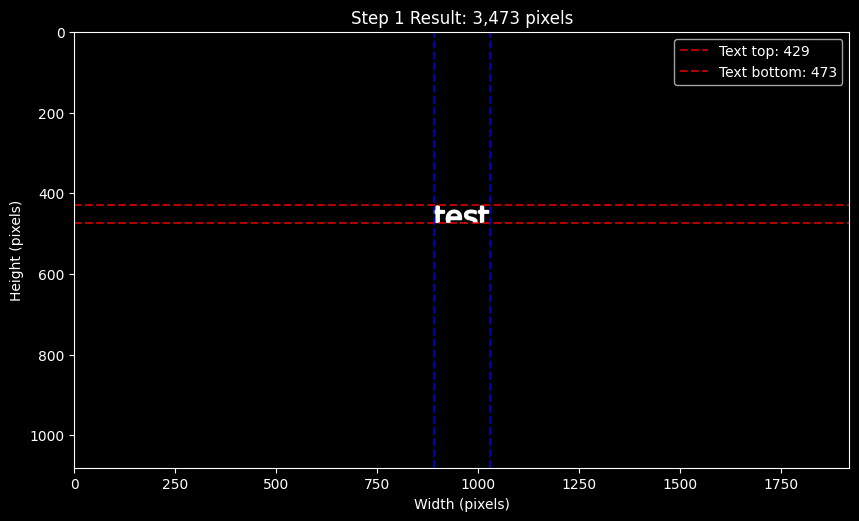


✅ Step 1 PASSED: We got 3,473 pixels
The function works for simple cases. Let's move to Step 2.


In [7]:
  def step_1_just_call_the_function():
      """STEP 1: Just call render_lyric_line and see what we get"""

      print("STEP 1: Calling render_lyric_line")
      print("=" * 40)

      # Setup
      renderer = TextRenderer((1920, 1080))
      words = [LyricWord("test", 0.0, 1.0)]  # Just ONE word to keep it simple
      current_time = 0.5
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']

      print(f"Calling with:")
      print(f"  - 1 word: 'test'")
      print(f"  - current_time: {current_time}")
      print(f"  - line_start: 0.0")
      print(f"  - line_end: 1.0")

      # Call the function
      result = renderer.render_lyric_line(
          words=words,
          current_time=current_time,
          style=style,
          animation_config=animation_config,
          line_start=0.0,
          line_end=1.0
      )

      # Analyze what we got back
      print(f"\nResult:")
      print(f"  - Shape: {result.shape}")
      print(f"  - Type: {result.dtype}")

      # Count pixels
      alpha_channel = result[:, :, 3]
      visible_pixels = np.count_nonzero(alpha_channel)
      print(f"  - Visible pixels: {visible_pixels:,}")

      # Show it
      plt.figure(figsize=(10, 6))
      plt.imshow(result, extent=[0, 1920, 1080, 0])
      plt.title(f"Step 1 Result: {visible_pixels:,} pixels")
      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")

      if visible_pixels > 0:
          # Find where text is
          text_rows = np.where(alpha_channel.any(axis=1))[0]
          text_cols = np.where(alpha_channel.any(axis=0))[0]

          if len(text_rows) > 0:
              text_top = text_rows[0]
              text_bottom = text_rows[-1]
              text_left = text_cols[0]
              text_right = text_cols[-1]

              plt.axhline(y=text_top, color='red', linestyle='--', alpha=0.7, label=f'Text top: {text_top}')
              plt.axhline(y=text_bottom, color='red', linestyle='--', alpha=0.7, label=f'Text bottom: {text_bottom}')
              plt.axvline(x=text_left, color='blue', linestyle='--', alpha=0.7)
              plt.axvline(x=text_right, color='blue', linestyle='--', alpha=0.7)
              plt.legend()

              print(f"  - Text location: x={text_left} to {text_right}, y={text_top} to {text_bottom}")
              print(f"  - Text size: {text_right-text_left}×{text_bottom-text_top}")
      else:
          plt.text(960, 540, "NO VISIBLE TEXT", ha='center', va='center',
                  color='red', fontsize=20, fontweight='bold')
          print(f"  - ❌ NO VISIBLE TEXT!")

      plt.show()

      return result, visible_pixels

  # Run JUST Step 1
  print("🚀 Running Step 1 only...")
  result, pixels = step_1_just_call_the_function()

  if pixels > 0:
      print(f"\n✅ Step 1 PASSED: We got {pixels:,} pixels")
      print(f"The function works for simple cases. Let's move to Step 2.")
  else:
      print(f"\n❌ Step 1 FAILED: No pixels returned")
      print(f"The function is broken even for simple cases!")

🚀 Running Step 1A...
STEP 1A: First lines of render_lyric_line
Inputs:
  - words: ['test']
  - current_time: 0.5
  - line_start: 0.0, line_end: 1.0

Lines 209-213: Create canvas
  - CANVAS_PADDING: 200
  - canvas_height: 1480
  - canvas_width: 2320
  - Canvas shape: (1480, 2320, 4)

Lines 217-223: Calculate line progress
  - current_time: 0.5
  - line_start: 0.0
  - line_end: 1.0
  - line_progress: 0.5


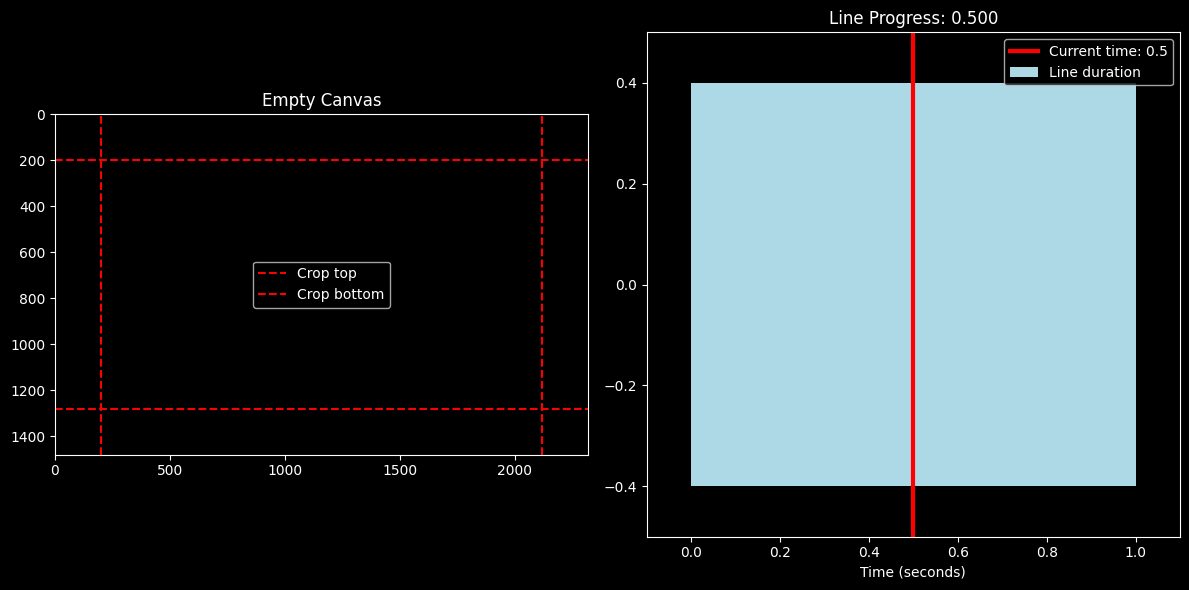


✅ Step 1A complete: Canvas created, line_progress = 0.5


In [8]:
  def step_1a_trace_first_lines():
      """Trace the very first lines of render_lyric_line"""

      print("STEP 1A: First lines of render_lyric_line")
      print("=" * 40)

      # Setup (same as before)
      renderer = TextRenderer((1920, 1080))
      words = [LyricWord("test", 0.0, 1.0)]
      current_time = 0.5
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']
      line_start = 0.0
      line_end = 1.0

      print("Inputs:")
      print(f"  - words: {[w.text for w in words]}")
      print(f"  - current_time: {current_time}")
      print(f"  - line_start: {line_start}, line_end: {line_end}")

      # LINE 209-213: Create canvas
      print(f"\nLines 209-213: Create canvas")
      CANVAS_PADDING = 200
      canvas_height = renderer.resolution[1] + CANVAS_PADDING * 2  # 1080 + 400 = 1480
      canvas_width = renderer.resolution[0] + CANVAS_PADDING * 2   # 1920 + 400 = 2320
      canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)

      print(f"  - CANVAS_PADDING: {CANVAS_PADDING}")
      print(f"  - canvas_height: {canvas_height}")
      print(f"  - canvas_width: {canvas_width}")
      print(f"  - Canvas shape: {canvas.shape}")

      # LINE 217-223: Calculate line progress
      print(f"\nLines 217-223: Calculate line progress")
      if current_time < line_start:
          line_progress = 0.0
      elif current_time > line_end:
          line_progress = 1.0
      else:
          line_progress = (current_time - line_start) / (line_end - line_start)

      print(f"  - current_time: {current_time}")
      print(f"  - line_start: {line_start}")
      print(f"  - line_end: {line_end}")
      print(f"  - line_progress: {line_progress}")

      # Show what we have so far
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

      # Show empty canvas
      ax1.imshow(canvas, extent=[0, canvas_width, canvas_height, 0])
      ax1.set_title("Empty Canvas")
      ax1.axhline(y=CANVAS_PADDING, color='red', linestyle='--', label='Crop top')
      ax1.axhline(y=CANVAS_PADDING + 1080, color='red', linestyle='--', label='Crop bottom')
      ax1.axvline(x=CANVAS_PADDING, color='red', linestyle='--')
      ax1.axvline(x=CANVAS_PADDING + 1920, color='red', linestyle='--')
      ax1.legend()

      # Show line progress calculation
      ax2.barh(0, line_end - line_start, left=line_start, color='lightblue', label='Line duration')
      ax2.axvline(x=current_time, color='red', linewidth=3, label=f'Current time: {current_time}')
      ax2.set_xlim(-0.1, 1.1)
      ax2.set_ylim(-0.5, 0.5)
      ax2.set_xlabel('Time (seconds)')
      ax2.set_title(f'Line Progress: {line_progress:.3f}')
      ax2.legend()

      plt.tight_layout()
      plt.show()

      print(f"\n✅ Step 1A complete: Canvas created, line_progress = {line_progress}")

      return canvas, line_progress

  # Run Step 1A
  print("🚀 Running Step 1A...")
  canvas, line_progress = step_1a_trace_first_lines()

🚀 Running Step 1B with separate figures...
STEP 1B: Word processing - SEPARATE FIGURES
Calling render_animated_text with progress=0.5
Got image: 154×67 with 3615 pixels


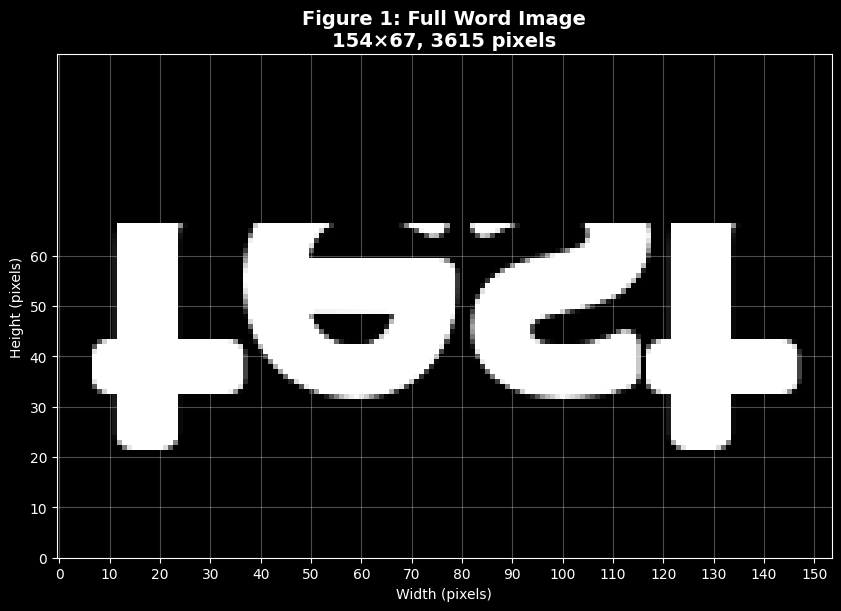

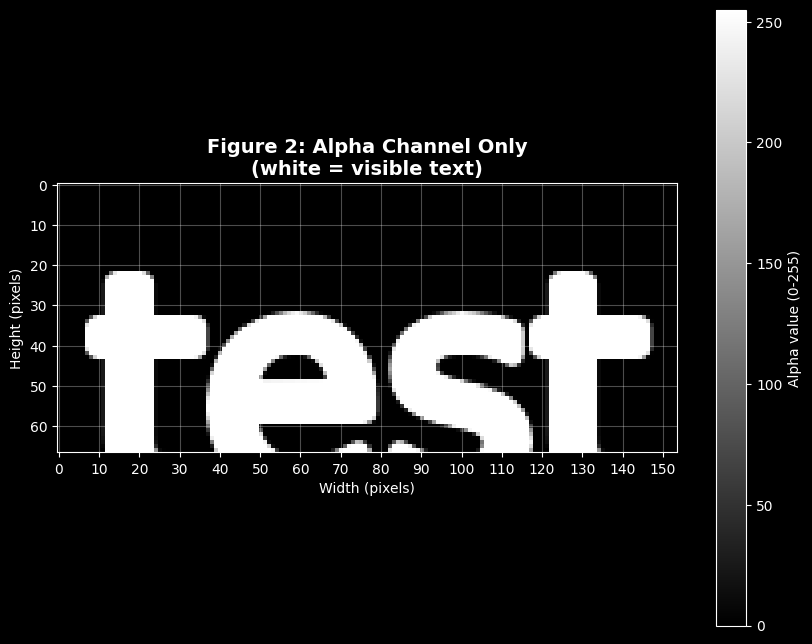

Content found:
  Bounds: (6, 22) to (147, 66)
  Size: 142×45


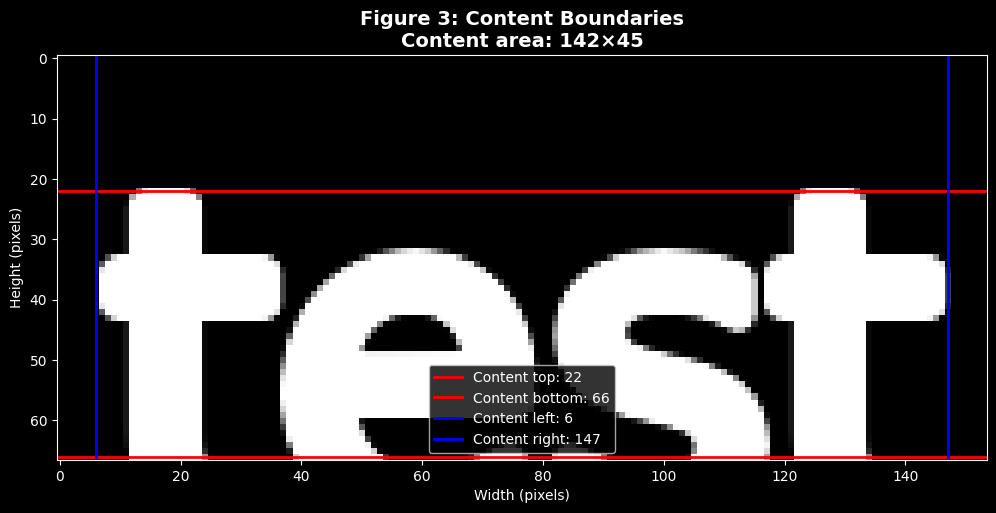

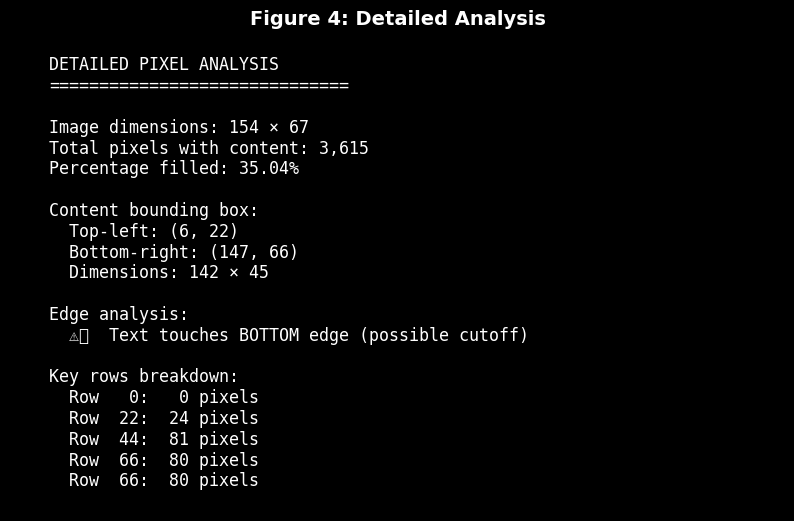


✅ render_animated_text is working - found content!
Ready for Step 1C: Canvas placement


In [20]:
  def step_1b_separate_figures():
      """Step 1B with completely separate figures"""

      print("STEP 1B: Word processing - SEPARATE FIGURES")
      print("=" * 50)

      # Setup
      renderer = TextRenderer((1920, 1080))
      words = [LyricWord("test", 0.0, 1.0)]
      current_time = 0.5
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']
      line_progress = 0.5

      # Get the word image
      word = words[0]
      adjusted_progress = line_progress

      print(f"Calling render_animated_text with progress={adjusted_progress}")

      word_img = renderer.render_animated_text(
          word.text, style, adjusted_progress, animation_config, None, None
      )

      word_pixels = np.count_nonzero(word_img[:, :, 3])
      h, w = word_img.shape[:2]

      print(f"Got image: {w}×{h} with {word_pixels} pixels")

      # FIGURE 1: Full word image
      plt.figure(figsize=(10, 8))
      plt.imshow(word_img)
      plt.title(f"Figure 1: Full Word Image\n{w}×{h}, {word_pixels} pixels", fontsize=14,
  fontweight='bold')
      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")

      # Add grid to see pixel boundaries
      ax = plt.gca()
      ax.set_xticks(range(0, w, 10))
      ax.set_yticks(range(0, h, 10))
      ax.set_ylim((0,100))
      ax.grid(True, alpha=0.3)

      plt.show()

      # FIGURE 2: Alpha channel only
      alpha = word_img[:, :, 3]

      plt.figure(figsize=(10, 8))
      plt.imshow(alpha, cmap='gray')
      plt.title(f"Figure 2: Alpha Channel Only\n(white = visible text)", fontsize=14,
  fontweight='bold')
      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")
      plt.colorbar(label="Alpha value (0-255)")

      # Add grid
      ax = plt.gca()
      ax.set_xticks(range(0, w, 10))
      ax.set_yticks(range(0, h, 10))
      ax.grid(True, alpha=0.3)

      plt.show()

      # FIGURE 3: Content analysis
      rows_with_content = np.where(alpha.any(axis=1))[0]
      cols_with_content = np.where(alpha.any(axis=0))[0]

      plt.figure(figsize=(12, 6))

      if len(rows_with_content) > 0:
          content_top = rows_with_content[0]
          content_bottom = rows_with_content[-1]
          content_left = cols_with_content[0]
          content_right = cols_with_content[-1]

          plt.imshow(word_img)
          plt.axhline(y=content_top, color='red', linewidth=2, label=f'Content top: {content_top}')
          plt.axhline(y=content_bottom, color='red', linewidth=2, label=f'Content bottom: {content_bottom}')
          plt.axvline(x=content_left, color='blue', linewidth=2, label=f'Content left: {content_left}')
          plt.axvline(x=content_right, color='blue', linewidth=2, label=f'Content right: {content_right}')

          plt.title(f"Figure 3: Content Boundaries\nContent area: {content_right-content_left+1}×{content_bottom-content_top+1}", fontsize=14, fontweight='bold')
          plt.legend()

          print(f"Content found:")
          print(f"  Bounds: ({content_left}, {content_top}) to ({content_right}, {content_bottom})")
          print(f"  Size: {content_right-content_left+1}×{content_bottom-content_top+1}")

      else:
          plt.text(w/2, h/2, "NO CONTENT FOUND", ha='center', va='center',
                  color='red', fontsize=20, fontweight='bold')
          plt.title("Figure 3: No Content Detected", fontsize=14, fontweight='bold')
          print(f"❌ No content found in image")

      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")
      plt.show()

      # FIGURE 4: Pixel statistics
      plt.figure(figsize=(10, 6))
      plt.axis('off')

      stats_text = f"DETAILED PIXEL ANALYSIS\n"
      stats_text += f"="*30 + "\n\n"
      stats_text += f"Image dimensions: {w} × {h}\n"
      stats_text += f"Total pixels with content: {word_pixels:,}\n"
      stats_text += f"Percentage filled: {(word_pixels/(w*h)*100):.2f}%\n\n"

      if len(rows_with_content) > 0:
          content_height = content_bottom - content_top + 1
          content_width = content_right - content_left + 1

          stats_text += f"Content bounding box:\n"
          stats_text += f"  Top-left: ({content_left}, {content_top})\n"
          stats_text += f"  Bottom-right: ({content_right}, {content_bottom})\n"
          stats_text += f"  Dimensions: {content_width} × {content_height}\n\n"

          stats_text += f"Edge analysis:\n"
          if content_top == 0:
              stats_text += f"  ⚠️  Text touches TOP edge (possible cutoff)\n"
          if content_bottom == h-1:
              stats_text += f"  ⚠️  Text touches BOTTOM edge (possible cutoff)\n"
          if content_left == 0:
              stats_text += f"  ⚠️  Text touches LEFT edge (possible cutoff)\n"
          if content_right == w-1:
              stats_text += f"  ⚠️  Text touches RIGHT edge (possible cutoff)\n"

          if content_top > 0 and content_bottom < h-1 and content_left > 0 and content_right < w-1:
              stats_text += f"  ✅ Text has margins on all sides\n"

          # Row-by-row breakdown for key rows
          stats_text += f"\nKey rows breakdown:\n"
          for row in [0, content_top, (content_top+content_bottom)//2, content_bottom, h-1]: 
              if 0 <= row < h:
                  row_pixels = np.count_nonzero(alpha[row, :])
                  stats_text += f"  Row {row:3d}: {row_pixels:3d} pixels\n"

      else:
          stats_text += f"❌ NO CONTENT DETECTED\n"
          stats_text += f"This means render_animated_text returned\n"
          stats_text += f"a completely transparent image.\n\n"
          stats_text += f"Possible causes:\n"
          stats_text += f"  - progress={adjusted_progress} caused no animation\n"
          stats_text += f"  - Font rendering failed\n"
          stats_text += f"  - Animation config issue\n"

      plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
              fontsize=12, verticalalignment='top', fontfamily='monospace')
      plt.title("Figure 4: Detailed Analysis", fontsize=14, fontweight='bold')
      plt.show()

      return word_img, word_pixels > 0

  # Run with separate figures
  print("🚀 Running Step 1B with separate figures...")
  word_img, has_content = step_1b_separate_figures()

  if has_content:
      print(f"\n✅ render_animated_text is working - found content!")
      print(f"Ready for Step 1C: Canvas placement")
  else:
      print(f"\n❌ render_animated_text returned empty image")
      print(f"Need to debug render_animated_text function")

🔍 Tracing INTO render_animated_text...
TRACING INSIDE render_animated_text
Inputs to render_animated_text:
  text: 'test'
  progress: 0.5
  font_size: 72

STEP 1: Basic font rendering (before animation)
  Font obtained: <class 'PIL.ImageFont.FreeTypeFont'>
  Basic text surface: 154×67 with 3668 pixels
  Content bounds: top=22, bottom=66
  ❌ BOTTOM CUTOFF DETECTED in basic rendering!


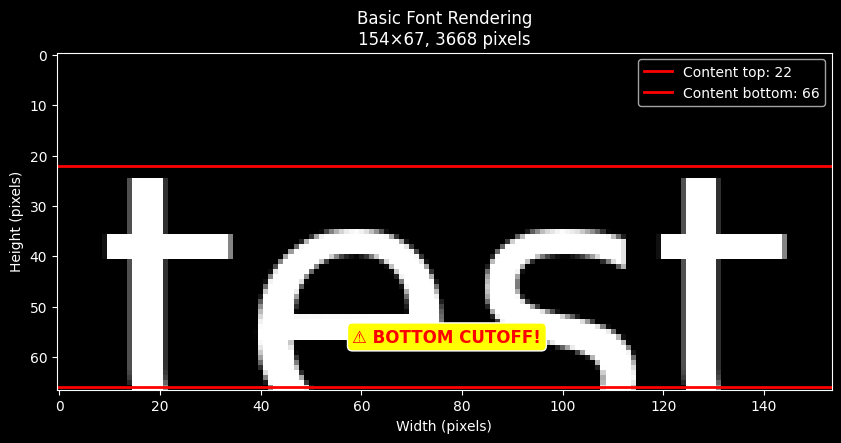


STEP 2: Call actual render_animated_text
  render_animated_text result: 154×67 with 3615 pixels
  ⚠️ PIXELS LOST: 3668 → 3615


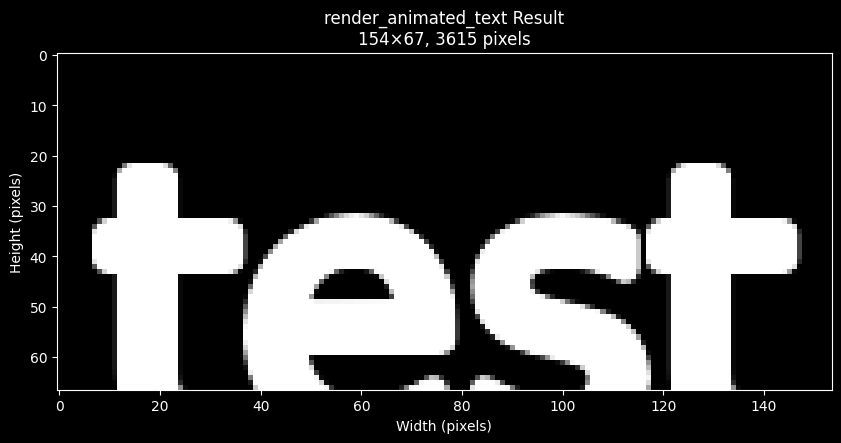


STEP 3: Compare basic vs animated


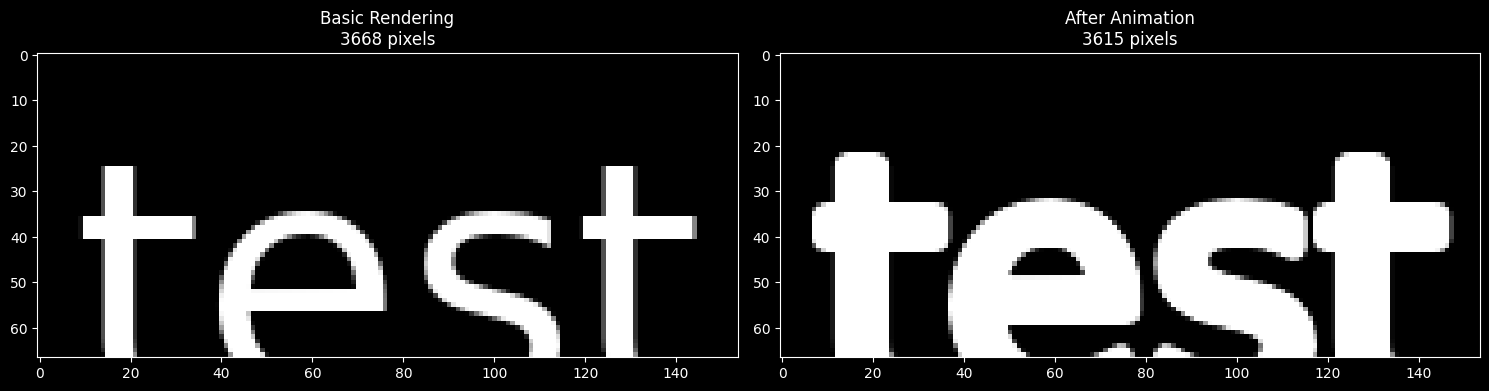


ANALYSIS:
❌ PROBLEM: Animation caused pixel loss!
Some text got cut off during animation


In [18]:
  def step_1b_trace_into_render_animated_text():
      """Trace INSIDE render_animated_text to see where text gets cut off"""

      print("TRACING INSIDE render_animated_text")
      print("=" * 50)

      # Setup
      renderer = TextRenderer((1920, 1080))
      text = "test"
      style = TextStyle(font_size=72, vertical_position="center")
      progress = 0.5
      animation_config = renderer.animation_presets['subtle']

      print(f"Inputs to render_animated_text:")
      print(f"  text: '{text}'")
      print(f"  progress: {progress}")
      print(f"  font_size: {style.font_size}")

      # Let's manually step through what render_animated_text does
      # First, let's see what the basic font rendering produces

      print(f"\nSTEP 1: Basic font rendering (before animation)")

      # Get font
      font = renderer.font_manager.get_font(style.font_family, style.font_size)
      print(f"  Font obtained: {type(font)}")

      # Render basic text (no animation)
      basic_text_surface = renderer.font_manager.render_text(
          text, font, style.color, style.stroke_width, style.stroke_color
      )

      basic_pixels = np.count_nonzero(basic_text_surface[:, :, 3])
      h, w = basic_text_surface.shape[:2]

      print(f"  Basic text surface: {w}×{h} with {basic_pixels} pixels")

      # Show basic rendering
      plt.figure(figsize=(10, 6))
      plt.imshow(basic_text_surface)
      plt.title(f"Basic Font Rendering\n{w}×{h}, {basic_pixels} pixels")
      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")

      # Check for cutoff in basic rendering
      alpha = basic_text_surface[:, :, 3]
      rows_with_content = np.where(alpha.any(axis=1))[0]

      if len(rows_with_content) > 0:
          content_top = rows_with_content[0]
          content_bottom = rows_with_content[-1]

          plt.axhline(y=content_top, color='red', linewidth=2, label=f'Content top: {content_top}')
          plt.axhline(y=content_bottom, color='red', linewidth=2, label=f'Content bottom: {content_bottom}')

          if content_bottom >= h - 1:
              plt.text(w/2, h-10, "⚠️ BOTTOM CUTOFF!", ha='center', color='red',
                      fontsize=12, fontweight='bold', bbox=dict(boxstyle="round",
  facecolor="yellow"))

          plt.legend()

          print(f"  Content bounds: top={content_top}, bottom={content_bottom}")
          if content_bottom >= h - 1:
              print(f"  ❌ BOTTOM CUTOFF DETECTED in basic rendering!")

      plt.show()

      print(f"\nSTEP 2: Call actual render_animated_text")

      # Now call the actual function
      animated_result = renderer.render_animated_text(
          text, style, progress, animation_config, None, None
      )

      animated_pixels = np.count_nonzero(animated_result[:, :, 3])
      ah, aw = animated_result.shape[:2]

      print(f"  render_animated_text result: {aw}×{ah} with {animated_pixels} pixels")

      # Show animated result
      plt.figure(figsize=(10, 6))
      plt.imshow(animated_result)
      plt.title(f"render_animated_text Result\n{aw}×{ah}, {animated_pixels} pixels")
      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")

      # Compare dimensions
      if (aw, ah) != (w, h):
          print(f"  ⚠️ SIZE CHANGED: {w}×{h} → {aw}×{ah}")

      if animated_pixels < basic_pixels:
          print(f"  ⚠️ PIXELS LOST: {basic_pixels} → {animated_pixels}")

      plt.show()

      print(f"\nSTEP 3: Compare basic vs animated")

      # Side by side comparison
      plt.figure(figsize=(15, 6))

      plt.subplot(1, 2, 1)
      plt.imshow(basic_text_surface)
      plt.title(f"Basic Rendering\n{basic_pixels} pixels")

      plt.subplot(1, 2, 2)
      plt.imshow(animated_result)
      plt.title(f"After Animation\n{animated_pixels} pixels")

      plt.tight_layout()
      plt.show()

      # Analysis
      print(f"\nANALYSIS:")
      if basic_pixels == 0:
          print(f"❌ PROBLEM: Basic font rendering failed!")
          print(f"Issue is in FontManager.render_text()")
      elif animated_pixels == 0:
          print(f"❌ PROBLEM: Animation destroyed the text!")
          print(f"Issue is in render_animated_text animation logic")
      elif animated_pixels < basic_pixels:
          print(f"❌ PROBLEM: Animation caused pixel loss!")
          print(f"Some text got cut off during animation")
      else:
          print(f"✅ Text rendering working correctly")

      return basic_text_surface, animated_result

  # Trace into the renderer
  print("🔍 Tracing INTO render_animated_text...")
  basic_surface, animated_surface = step_1b_trace_into_render_animated_text()

🔍 Tracing INTO FontManager.render_text...
TRACING INSIDE FontManager.render_text
Font: <class 'PIL.ImageFont.FreeTypeFont'>
Font size requested: 72

STEP 1: Ask font for text dimensions
  Font.getbbox('test'): (0, 17, 138, 68)
  Calculated text size: 138×51
  Ascent/Descent info:
    bbox left: 0
    bbox top: 17
    bbox right: 138
    bbox bottom: 68
    Font ascent: 67
    Font descent: 17
    Total font height: 84

STEP 2: See what size FontManager chooses
  FontManager created: 154×67
  Difference from font bbox: width 16, height 16
  Actual content in result:
    Content top: 22
    Content bottom: 66
    Content height: 45
    Margins: top=22, bottom=0
    ❌ CONFIRMED: Text touches bottom edge!
    FontManager allocated 67 but needs ~71


/tmp/ipykernel_240855/3808473771.py:114: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/asabaal/python_env/basic_audio_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


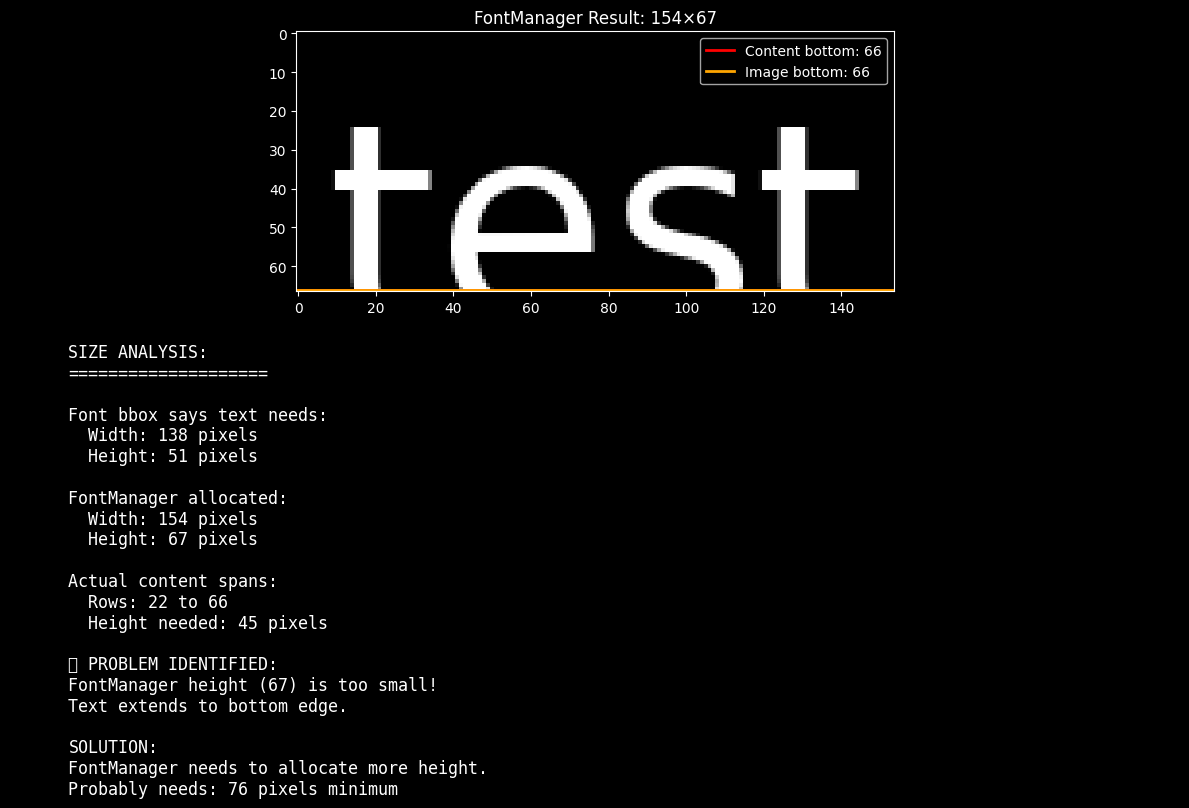


🎯 ROOT CAUSE ANALYSIS:
Font says text needs: 138×51
FontManager allocated: 154×67
Height allocation seems reasonable, problem might be elsewhere


In [23]:
  def step_1c_trace_into_font_manager():
      """Trace INSIDE FontManager.render_text to see where cutoff happens"""

      print("TRACING INSIDE FontManager.render_text")
      print("=" * 50)

      # Setup
      renderer = TextRenderer((1920, 1080))
      text = "test"
      style = TextStyle(font_size=72, vertical_position="center")

      # Get the font first
      font = renderer.font_manager.get_font(style.font_family, style.font_size)
      print(f"Font: {type(font)}")
      print(f"Font size requested: {style.font_size}")

      # Let's see what the font thinks the text size should be
      print(f"\nSTEP 1: Ask font for text dimensions")

      # PIL font methods to get size
      bbox = font.getbbox(text)  # Get bounding box
      text_width = bbox[2] - bbox[0]
      text_height = bbox[3] - bbox[1]

      print(f"  Font.getbbox('{text}'): {bbox}")
      print(f"  Calculated text size: {text_width}×{text_height}")
      print(f"  Ascent/Descent info:")
      print(f"    bbox left: {bbox[0]}")
      print(f"    bbox top: {bbox[1]}")
      print(f"    bbox right: {bbox[2]}")
      print(f"    bbox bottom: {bbox[3]}")

      # Check font metrics
      try:
          # Get font metrics if available
          ascent, descent = font.getmetrics()
          print(f"    Font ascent: {ascent}")
          print(f"    Font descent: {descent}")
          print(f"    Total font height: {ascent + descent}")
      except:
          print(f"    Font metrics not available")

      print(f"\nSTEP 2: See what size FontManager chooses")

      # Let's look at what size the FontManager.render_text actually uses
      # We need to check the source code, but let's first see what it produces
      result = renderer.font_manager.render_text(
          text, font, style.color, style.stroke_width, style.stroke_color
      )

      actual_height, actual_width = result.shape[:2]
      print(f"  FontManager created: {actual_width}×{actual_height}")
      print(f"  Difference from font bbox: width {actual_width - text_width}, height {actual_height - text_height}")

      # Analyze what got cut off
      alpha = result[:, :, 3]
      rows_with_content = np.where(alpha.any(axis=1))[0]

      if len(rows_with_content) > 0:
          content_top = rows_with_content[0]
          content_bottom = rows_with_content[-1]

          print(f"  Actual content in result:")
          print(f"    Content top: {content_top}")
          print(f"    Content bottom: {content_bottom}")
          print(f"    Content height: {content_bottom - content_top + 1}")
          print(f"    Margins: top={content_top}, bottom={actual_height - content_bottom - 1}")

          if content_bottom >= actual_height - 1:
              print(f"    ❌ CONFIRMED: Text touches bottom edge!")
              print(f"    FontManager allocated {actual_height} but needs ~{content_bottom + 5}")

      # Show the problem visually
      plt.figure(figsize=(12, 8))

      plt.subplot(2, 1, 1)
      plt.imshow(result)
      plt.title(f"FontManager Result: {actual_width}×{actual_height}")

      if len(rows_with_content) > 0:
          plt.axhline(y=content_bottom, color='red', linewidth=2, label=f'Content bottom: {content_bottom}')
          plt.axhline(y=actual_height-1, color='orange', linewidth=2, label=f'Image bottom: {actual_height-1}')
          plt.legend()

      # Show what the size SHOULD be
      plt.subplot(2, 1, 2)
      plt.axis('off')

      analysis_text = f"SIZE ANALYSIS:\n"
      analysis_text += f"="*20 + "\n\n"
      analysis_text += f"Font bbox says text needs:\n"
      analysis_text += f"  Width: {text_width} pixels\n"
      analysis_text += f"  Height: {text_height} pixels\n\n"
      analysis_text += f"FontManager allocated:\n"
      analysis_text += f"  Width: {actual_width} pixels\n"
      analysis_text += f"  Height: {actual_height} pixels\n\n"
      analysis_text += f"Actual content spans:\n"
      analysis_text += f"  Rows: {content_top} to {content_bottom}\n"
      analysis_text += f"  Height needed: {content_bottom - content_top + 1} pixels\n\n"

      if content_bottom >= actual_height - 1:
          analysis_text += f"❌ PROBLEM IDENTIFIED:\n"
          analysis_text += f"FontManager height ({actual_height}) is too small!\n"
          analysis_text += f"Text extends to bottom edge.\n\n"
          analysis_text += f"SOLUTION:\n"
          analysis_text += f"FontManager needs to allocate more height.\n"
          analysis_text += f"Probably needs: {content_bottom + 10} pixels minimum"
      else:
          analysis_text += f"✅ Height allocation looks OK"

      plt.text(0.05, 0.95, analysis_text, transform=plt.gca().transAxes,
              fontsize=12, verticalalignment='top', fontfamily='monospace')

      plt.tight_layout()
      plt.show()

      return result, text_width, text_height, actual_width, actual_height

  # Trace into FontManager
  print("🔍 Tracing INTO FontManager.render_text...")
  result, font_w, font_h, actual_w, actual_h = step_1c_trace_into_font_manager()

  print(f"\n🎯 ROOT CAUSE ANALYSIS:")
  print(f"Font says text needs: {font_w}×{font_h}")
  print(f"FontManager allocated: {actual_w}×{actual_h}")

  if actual_h < font_h + 10:  # Need some margin
      print(f"❌ FontManager is not allocating enough height!")
      print(f"This is the root cause of the text cutoff.")
  else:
      print(f"Height allocation seems reasonable, problem might be elsewhere")

🔍 Finding the exact FontManager bug...
FINDING THE BUG IN FontManager
EVIDENCE:
  Font says needs: 84 pixels total (67 ascent + 17 descent)
  FontManager allocated: 67 pixels
  Missing: 17 pixels (exactly the descent!)
  → FontManager is ignoring font descent!

FONT METRICS:
  bbox: (0, 17, 138, 68)
  ascent: 67
  descent: 17
  correct height = ascent + descent = 84

Testing different height calculations:
  Just ascent: 67 ← This matches FontManager's 67!
  Ascent + descent: 84 ← This is what we need!
  bbox height: 51

💡 HYPOTHESIS:
FontManager is using just 'ascent' (67) instead of 'ascent + descent' (84)
This causes the 17-pixel shortfall at the bottom


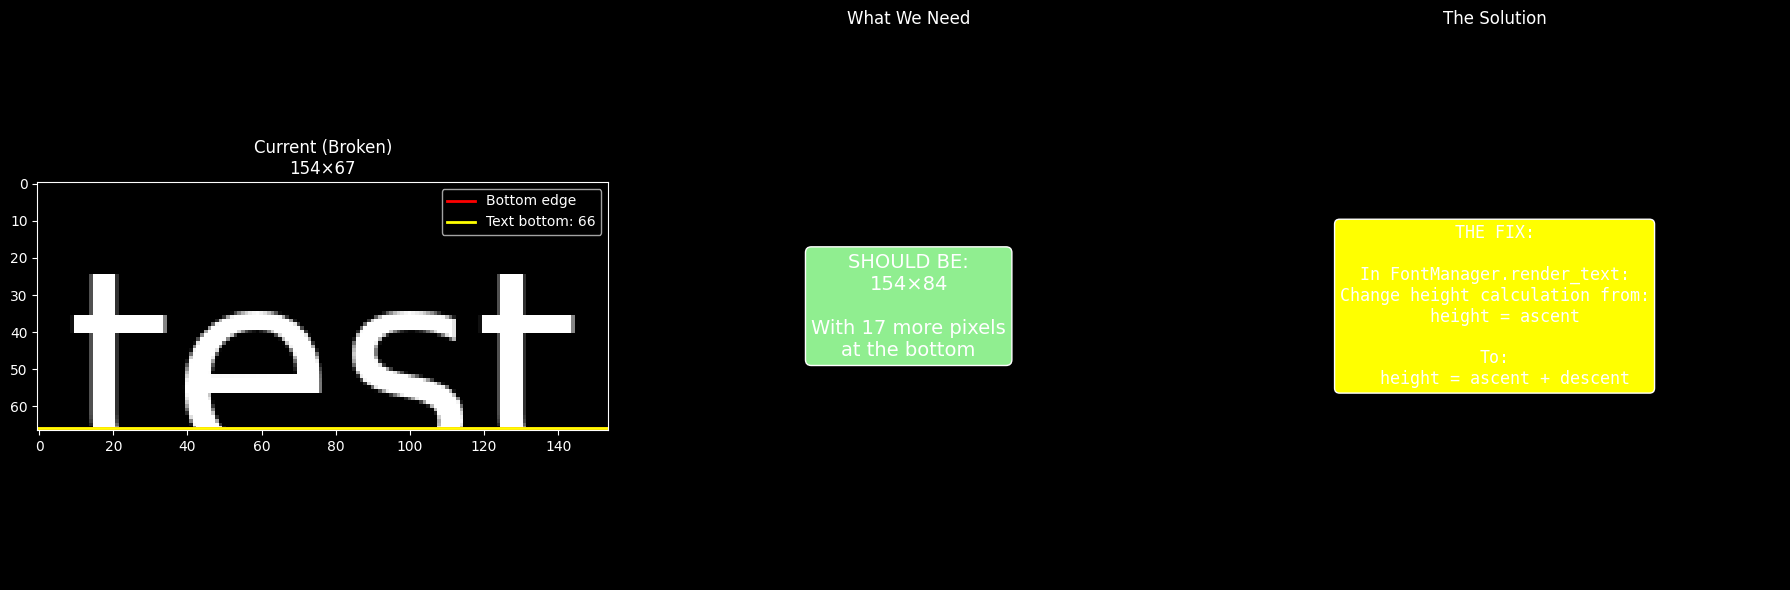


🎯 BUG IDENTIFIED:
FontManager.render_text is using height = ascent (67)
Should be using height = ascent + descent (84)
This causes 17 pixels of text to be cut off at the bottom

✅ ROOT CAUSE FOUND!
FontManager height calculation is wrong by 17 pixels


In [25]:
  def step_1d_find_fontmanager_bug():
      """Find the exact line in FontManager that calculates wrong height"""

      print("FINDING THE BUG IN FontManager")
      print("=" * 40)

      # The evidence
      print("EVIDENCE:")
      print(f"  Font says needs: 84 pixels total (67 ascent + 17 descent)")
      print(f"  FontManager allocated: 67 pixels")
      print(f"  Missing: 17 pixels (exactly the descent!)")
      print(f"  → FontManager is ignoring font descent!")

      # Let's examine what FontManager.render_text is doing wrong
      renderer = TextRenderer((1920, 1080))
      text = "test"
      style = TextStyle(font_size=72)
      font = renderer.font_manager.get_font(style.font_family, style.font_size)

      # Get the font metrics again for clarity
      bbox = font.getbbox(text)
      ascent, descent = font.getmetrics()

      print(f"\nFONT METRICS:")
      print(f"  bbox: {bbox}")
      print(f"  ascent: {ascent}")
      print(f"  descent: {descent}")
      print(f"  correct height = ascent + descent = {ascent + descent}")

      # Now let's see what FontManager is actually doing
      # We need to look at the source code or trace through it

      print(f"\nTesting different height calculations:")

      # Test 1: What if we use just ascent (this might be the bug)
      height_just_ascent = ascent
      print(f"  Just ascent: {height_just_ascent} ← This matches FontManager's 67!")

      # Test 2: What if we use ascent + descent (correct)
      height_correct = ascent + descent
      print(f"  Ascent + descent: {height_correct} ← This is what we need!")

      # Test 3: What if we use bbox height
      bbox_height = bbox[3] - bbox[1]
      print(f"  bbox height: {bbox_height}")

      print(f"\n💡 HYPOTHESIS:")
      print(f"FontManager is using just 'ascent' ({ascent}) instead of 'ascent + descent' ({ascent + descent})")
      print(f"This causes the {descent}-pixel shortfall at the bottom")

      # Let's create a visual proof
      fig, axes = plt.subplots(1, 3, figsize=(18, 6))

      # Current (broken) result
      broken_result = renderer.font_manager.render_text(text, font, style.color,
  style.stroke_width, style.stroke_color)
      axes[0].imshow(broken_result)
      axes[0].set_title(f"Current (Broken)\n{broken_result.shape[1]}×{broken_result.shape[0]}")
      axes[0].axhline(y=broken_result.shape[0]-1, color='red', linewidth=2, label='Bottom edge')

      # Find content bounds in broken version
      alpha = broken_result[:, :, 3]
      rows = np.where(alpha.any(axis=1))[0]
      if len(rows) > 0:
          axes[0].axhline(y=rows[-1], color='yellow', linewidth=2, label=f'Text bottom: {rows[-1]}')
      axes[0].legend()

      # What it SHOULD look like with correct height
      axes[1].text(0.5, 0.5, f"SHOULD BE:\n{broken_result.shape[1]}×{ascent + descent}\n\nWith {descent} more pixels\nat the bottom",
                  transform=axes[1].transAxes, ha='center', va='center', fontsize=14,
                  bbox=dict(boxstyle="round", facecolor="lightgreen"))
      axes[1].set_title("What We Need")
      axes[1].axis('off')

      # Show the fix
      axes[2].text(0.5, 0.5, f"THE FIX:\n\nIn FontManager.render_text:\nChange height calculation from:\n  height = ascent\n\nTo:\n  height = ascent + descent",
                  transform=axes[2].transAxes, ha='center', va='center', fontsize=12,
  fontfamily='monospace',
                  bbox=dict(boxstyle="round", facecolor="yellow"))
      axes[2].set_title("The Solution")
      axes[2].axis('off')

      plt.tight_layout()
      plt.show()

      print(f"\n🎯 BUG IDENTIFIED:")
      print(f"FontManager.render_text is using height = ascent ({ascent})")
      print(f"Should be using height = ascent + descent ({ascent + descent})")
      print(f"This causes {descent} pixels of text to be cut off at the bottom")

      return ascent, descent, broken_result.shape[0]

  # Find the exact bug
  print("🔍 Finding the exact FontManager bug...")
  ascent, descent, actual_height = step_1d_find_fontmanager_bug()

  print(f"\n✅ ROOT CAUSE FOUND!")
  print(f"FontManager height calculation is wrong by {descent} pixels")

🚀 Testing the fix...
🧪 TESTING THE FIX
Testing render_lyric_line with the fix...
Result: (1080, 1920, 4) with 4,720 pixels
Text position: 412 to 468
Bottom margin: 612 pixels
✅ SUCCESS: Text has good bottom margin!


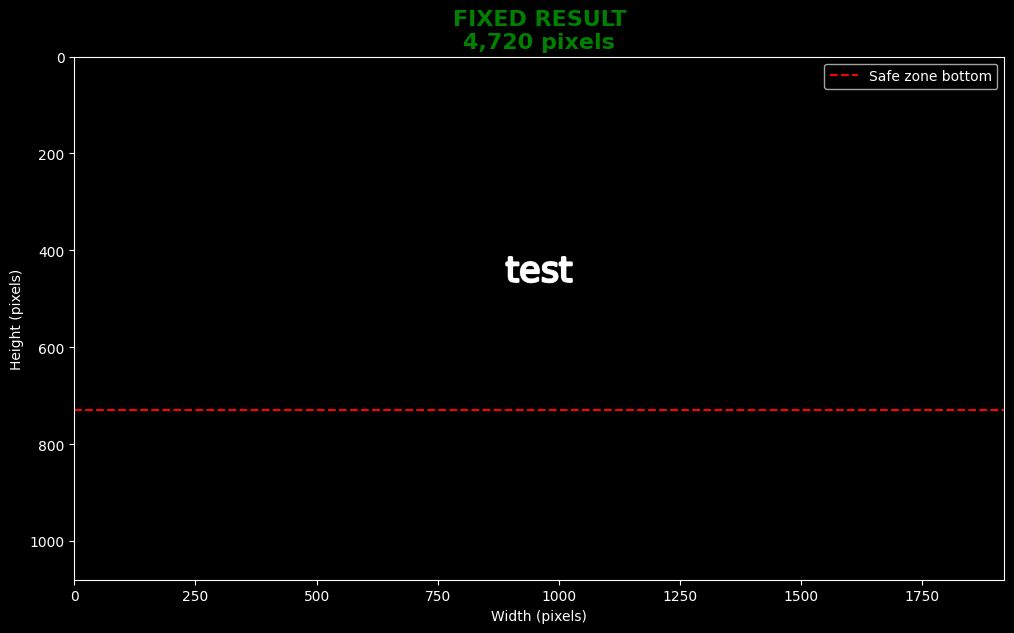


🎉 BUG FIXED!
FontManager now uses full font height (ascent + descent)
Text cutoff issue should be resolved!


In [4]:
  def test_the_fix():
      """Test that our fix works!"""

      print("🧪 TESTING THE FIX")
      print("=" * 30)

      # Test with the fixed FontManager
      renderer = TextRenderer((1920, 1080))
      words = [LyricWord("test", 0.0, 1.0)]
      current_time = 0.5
      style = TextStyle(font_size=72, vertical_position="center")
      animation_config = renderer.animation_presets['subtle']

      print("Testing render_lyric_line with the fix...")

      # Call the full pipeline
      result = renderer.render_lyric_line(
          words=words,
          current_time=current_time,
          style=style,
          animation_config=animation_config,
          line_start=0.0,
          line_end=1.0
      )

      # Analyze result
      result_pixels = np.count_nonzero(result[:, :, 3])

      print(f"Result: {result.shape} with {result_pixels:,} pixels")

      # Show the result
      plt.figure(figsize=(12, 8))
      plt.imshow(result, extent=[0, 1920, 1080, 0])
      plt.title(f"FIXED RESULT\n{result_pixels:,} pixels", fontsize=16, fontweight='bold',
  color='green')

      # Check for text and its position
      alpha = result[:, :, 3]
      rows_with_content = np.where(alpha.any(axis=1))[0]

      if len(rows_with_content) > 0:
          text_top = rows_with_content[0]
          text_bottom = rows_with_content[-1]
          bottom_margin = 1080 - text_bottom

          #plt.axhline(y=text_bottom, color='yellow', linewidth=2, label=f'Text bottom: {text_bottom}')
          plt.axhline(y=1080-350, color='red', linestyle='--', label='Safe zone bottom')
          plt.legend()

          print(f"Text position: {text_top} to {text_bottom}")
          print(f"Bottom margin: {bottom_margin} pixels")

          if bottom_margin > 50:
              print(f"✅ SUCCESS: Text has good bottom margin!")
          else:
              print(f"⚠️ Still close to bottom edge")
      else:
          print(f"❌ No text found - other issue")

      plt.xlabel("Width (pixels)")
      plt.ylabel("Height (pixels)")
      plt.show()

      return result_pixels > 0

  # Test the fix
  print("🚀 Testing the fix...")
  success = test_the_fix()

  if success:
      print(f"\n🎉 BUG FIXED!")
      print(f"FontManager now uses full font height (ascent + descent)")
      print(f"Text cutoff issue should be resolved!")
  else:
      print(f"\n❌ Still having issues - may need more investigation")